#                    Startup Success Navigator

# DATA INSPECTION

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv(r'C:\Users\anuli\OneDrive\Desktop\Startup Success Navigator\Datasets\startup_data.csv')

In [4]:
df.shape

(923, 49)

In [5]:
df.sample(10)

Unnamed: 0 state_code   latitude   longitude    zip_code       id  \
94          387         NY  40.753881  -73.978852       10173  c:23136   
462          14         CA  40.787878  -74.388207       94402  c:10398   
860         528         CA  33.916552 -118.397491    CA 90245  c:30152   
524        1094         TN  36.162230  -86.774353       37201  c:83142   
226         560         CA  39.783730 -100.445882  94043-1107  c:31754   
772          60         IN  39.914281  -86.076478       46250  c:12179   
64          396         MA  42.360253  -71.058291  02111-1720  c:23533   
629          41         NY  40.743403  -73.989086       10010  c:11397   
186         901         IL  41.800255  -88.149362       60563  c:54585   
721         361         CA  37.777678 -122.392110       94107   c:2178   

              city                   Unnamed: 6                  name  labels  \
94        New York                          NaN                 TxVia       1   
462      San Mateo                          NaN             Picateers       0   
860    El Segundo,                          NaN    CHiL Semiconductor       1   
524      Nashville           Nashville TN 37201         RentStuff.com       1   
226  Mountain View  Mountain View CA 94043-1107   MAP Pharmaceuticals       1   
772   Indianapolis                          NaN                Vontoo       0   
64          Boston         Boston MA 02111-1720              CardStar       1   
629       New York                          NaN  B-Side Entertainment       0   
186     Naperville                          NaN               Cartavi       1   
721  San Francisco                          NaN        What They Like       0   

     ... object_id has_VC has_angel has_roundA  has_roundB  has_roundC  \
94   ...   c:23136      0         0          1           1           1   
462  ...   c:10398      0         0          1           1           0   
860  ...   c:30152      1         0          0           1           1   
524  ...   c:83142      0         1          0           0           0   
226  ...   c:31754      0         0          0           0           0   
772  ...   c:12179      1         0          0           1           0   
64   ...   c:23533      0         0          1           0           0   
629  ...   c:11397      0         0          1           1           0   
186  ...   c:54585      0         1          0           0           0   
721  ...    c:2178      0         0          1           0           0   

     has_roundD  avg_participants  is_top500    status  
94            1            4.0000          1  acquired  
462           0            1.0000          1    closed  
860           0            2.3333          1  acquired  
524           0            1.5000          0  acquired  
226           1            6.0000          1  acquired  
772           0            3.0000          0    closed  
64            0            3.0000          1  acquired  
629           0            4.5000          1    closed  
186           0            1.0000          1  acquired  
721           0            2.0000          0    closed  

[10 rows x 49 columns]

In [6]:
atFeatures = []
for i in df.columns:
    atFeatures.append([i,df[i].dtype, df[i].nunique(), df[i].sort_values().drop_duplicates().values])
pd.DataFrame(atFeatures, columns = ['Features','Type', 'Unique Number', 'Values'])

Features     Type  Unique Number  \
0                 Unnamed: 0    int64            923   
1                 state_code   object             35   
2                   latitude  float64            652   
3                  longitude  float64            651   
4                   zip_code   object            382   
5                         id   object            922   
6                       city   object            221   
7                 Unnamed: 6   object            252   
8                       name   object            922   
9                     labels    int64              2   
10                founded_at   object            217   
11                 closed_at   object            202   
12          first_funding_at   object            585   
13           last_funding_at   object            680   
14    age_first_funding_year  float64            634   
15     age_last_funding_year  float64            756   
16  age_first_milestone_year  float64            471   
17   age_last_milestone_year  float64            585   
18             relationships    int64             41   
19            funding_rounds    int64              9   
20         funding_total_usd    int64            505   
21                milestones    int64              8   
22              state_code.1   object             35   
23                     is_CA    int64              2   
24                     is_NY    int64              2   
25                     is_MA    int64              2   
26                     is_TX    int64              2   
27             is_otherstate    int64              2   
28             category_code   object             35   
29               is_software    int64              2   
30                    is_web    int64              2   
31                 is_mobile    int64              2   
32             is_enterprise    int64              2   
33            is_advertising    int64              2   
34             is_gamesvideo    int64              2   
35              is_ecommerce    int64              2   
36                is_biotech    int64              2   
37             is_consulting    int64              2   
38          is_othercategory    int64              2   
39                 object_id   object            922   
40                    has_VC    int64              2   
41                 has_angel    int64              2   
42                has_roundA    int64              2   
43                has_roundB    int64              2   
44                has_roundC    int64              2   
45                has_roundD    int64              2   
46          avg_participants  float64             59   
47                 is_top500    int64              2   
48                    status   object              2   

                                               Values  
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...  
1   [AR, AZ, CA, CO, CT, DC, FL, GA, ID, IL, IN, K...  
2   [25.752358, 26.0524615, 26.106273, 27.951849, ...  
3   [-122.7569561, -122.725662, -122.674456, -122....  
4   [01752-4603, 01862-2000, 02111-1720, 10001, 10...  
5   [c:10054, c:101312, c:10137, c:10153, c:10158,...  
6   [Acton, Addison, Alameda, Albuquerque, Aliso V...  
7   [Acton MA 1720, Addison TX 75001, Alameda CA 9...  
8   [#waywire, 1000memories, 41st Parameter, 5min ...  
9                                              [0, 1]  
10  [1/1/1984, 1/1/1985, 1/1/1992, 1/1/1995, 1/1/1...  
11  [1/1/2001, 1/1/2005, 1/1/2007, 1/1/2008, 1/1/2...  
12  [1/1/2000, 1/1/2001, 1/1/2002, 1/1/2003, 1/1/2...  
13  [1/1/2001, 1/1/2004, 1/1/2005, 1/1/2006, 1/1/2...  
14  [-9.0466, -3.5068, -1.9863, -1.4712, -1.1836, ...  
15  [-9.0466, -1.9863, -1.1836, -0.9178, -0.5014, ...  
16  [-14.1699, -7.0055, -6.0466, -3.7507, -3.0, -2...  
17  [-7.0055, -3.8822, -3.7507, -3.0, -1.9151, -1....  
18  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
19                       [1, 2, 3, 4, 5, 6, 7, 8, 10]  
20  [11000, 12000, 15000, 19000, 20000, 211

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [8]:
df.describe()

Unnamed: 0    latitude   longitude      labels  \
count   923.000000  923.000000  923.000000  923.000000   
mean    572.297941   38.517442 -103.539212    0.646804   
std     333.585431    3.741497   22.394167    0.478222   
min       1.000000   25.752358 -122.756956    0.000000   
25%     283.500000   37.388869 -122.198732    0.000000   
50%     577.000000   37.779281 -118.374037    1.000000   
75%     866.500000   40.730646  -77.214731    1.000000   
max    1153.000000   59.335232   18.057121    1.000000   

       age_first_funding_year  age_last_funding_year  \
count              923.000000             923.000000   
mean                 2.235630               3.931456   
std                  2.510449               2.967910   
min                 -9.046600              -9.046600   
25%                  0.576700               1.669850   
50%                  1.446600               3.528800   
75%                  3.575350               5.560250   
max                 21.895900              21.895900   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count                771.000000               771.000000     923.000000   
mean                   3.055353                 4.754423       7.710726   
std                    2.977057                 3.212107       7.265776   
min                  -14.169900                -7.005500       0.000000   
25%                    1.000000                 2.411000       3.000000   
50%                    2.520500                 4.476700       5.000000   
75%                    4.686300                 6.753400      10.000000   
max                   24.684900                24.684900      63.000000   

       funding_rounds  ...  is_consulting  is_othercategory      has_VC  \
count      923.000000  ...     923.000000        923.000000  923.000000   
mean         2.310943  ...       0.003250          0.322860    0.326111   
std          1.390922  ...       0.056949          0.467823    0.469042   
min          1.000000  ...       0.000000          0.000000    0.000000   
25%          1.000000  ...       0.000000          0.000000    0.000000   
50%          2.000000  ...       0.000000          0.000000    0.000000   
75%          3.000000  ...       0.000000          1.000000    1.000000   
max         10.000000  ...       1.000000          1.000000    1.000000   

        has_angel  has_roundA  has_roundB  has_roundC  has_roundD  \
count  923.000000  923.000000  923.000000  923.000000  923.000000   
mean     0.254605    0.508126    0.392199    0.232936    0.099675   
std      0.435875    0.500205    0.488505    0.422931    0.299729   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       avg_participants   is_top500  
count        923.000000  923.000000  
mean           2.838586    0.809317  
std            1.874601    0.393052  
min            1.000000    0.000000  
25%            1.500000    1.000000  
50%            2.500000    1.000000  
75%            3.800000    1.000000  
max           16.000000    1.000000  

[8 rows x 35 columns]

In [9]:
df.describe(include='object')

state_code zip_code       id           city              Unnamed: 6  \
count         923      923      923            923                     430   
unique         35      382      922            221                     252   
top            CA    94107  c:28482  San Francisco  San Francisco CA 94105   
freq          488       30        2            128                      12   

                   name founded_at closed_at first_funding_at last_funding_at  \
count               923        923       335              923             923   
unique              922        217       202              585             680   
top     Redwood Systems   1/1/2003  6/1/2013         1/1/2008        1/1/2008   
freq                  2         55        25               18              11   

       state_code.1 category_code object_id    status  
count           922           923       923       923  
unique           35            35       922         2  
top              CA      software   c:28482  acquired  
freq            487           153         2       597

In [10]:
null_counts = df.isnull().sum()*100/len(df)
null_columns = null_counts[null_counts > 0]
print("")
print(null_columns)


Unnamed: 6                  53.412784
closed_at                   63.705309
age_first_milestone_year    16.468039
age_last_milestone_year     16.468039
state_code.1                 0.108342
dtype: float64


In [11]:
print("Percentage of missing values in 'closed_at' column: % {:.2f}". format((df.closed_at.isnull().sum())/len(df)*100))
print("Percentage of missing values in 'Unnamed: 6' column: % {:.2f}". format((df["Unnamed: 6"].isnull().sum())/len(df)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((df.age_last_milestone_year.isnull().sum())/len(df)*100))
print("percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((df.age_first_milestone_year.isnull().sum())/len(df)*100))

Percentage of missing values in 'closed_at' column: % 63.71
Percentage of missing values in 'Unnamed: 6' column: % 53.41
Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
percentage of missing values in 'age_first_milestone_year' column : % 16.47


# DATA PREPROCESSING FOR EDA

In [12]:
df.drop(['Unnamed: 0','Unnamed: 6','latitude','longitude','zip_code','id','name','object_id'], axis = 1, inplace = True)

### Drop columns that are unecessary to the analysis:
1) Unnamed: 0 , Unnamed: 6 - No meaning for the variable
2) lattitude, longitude - The location is specified from the city and state variables
3) id, name, object_id, zip_code - Unique variables

In [13]:
print(df['state_code'].equals(df['state_code.1']))

False


In [14]:
check = df.loc[df['state_code'] != df['state_code.1']]
check.style.set_properties(**{'background-color': 'orange'}, subset=['state_code','state_code.1'])

**Check whether the state_code and state_code.1 variables contain the same data for each row**:
 - One row is not equal to each other, because in state_code.1 variable it is a missing value. Therefore we assume the correct column is state_code

In [15]:
state = df['state_code'].value_counts().to_frame()
state['proportion'] = state['count']/sum(state['count'])*100
state

count  proportion
state_code                   
CA            488   52.871073
NY            106   11.484290
MA             83    8.992416
TX             42    4.550379
WA             42    4.550379
CO             19    2.058505
IL             18    1.950163
PA             17    1.841820
VA             13    1.408451
GA             11    1.191766
NC              7    0.758397
OR              7    0.758397
NJ              7    0.758397
MD              7    0.758397
FL              6    0.650054
OH              6    0.650054
MN              5    0.541712
DC              4    0.433369
CT              4    0.433369
TN              3    0.325027
RI              3    0.325027
UT              3    0.325027
MI              3    0.325027
MO              2    0.216685
NH              2    0.216685
KY              2    0.216685
ME              2    0.216685
NV              2    0.216685
IN              2    0.216685
AZ              2    0.216685
WV              1    0.108342
NM              1    0.108342
ID              1    0.108342
AR              1    0.108342
WI              1    0.108342

**Reduce the number of categories** 
- Top 5 categories of the state_code variable covers more than 80% from all the data. Therefore the other categories apart from the top 5 (CA,NY,MA,TX,WA) we can consider them as 'other'

In [16]:
df['State'] = 'other'
df.loc[(df['state_code'] == 'CA'), 'State'] = 'CA'
df.loc[(df['state_code'] == 'NY'), 'State'] = 'NY'
df.loc[(df['state_code'] == 'MA'), 'State'] = 'MA'
df.loc[(df['state_code'] == 'TX'), 'State'] = 'TX'
df.loc[(df['state_code'] == 'WA'), 'State'] = 'WA'

In [17]:
state_count = df['State'].value_counts()
fig = px.bar(x=state_count.index, y=state_count.values, title='State Count')
fig.update_traces(marker_color='lightgreen')
fig.show()

In [18]:
df = df.drop(['state_code','state_code.1','is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate'],axis =1)

In [19]:
category = df['category_code'].value_counts().to_frame()
category['proportion'] = category['count']/sum(category['count'])*100
category

count  proportion
category_code                      
software            153   16.576381
web                 144   15.601300
mobile               79    8.559047
enterprise           73    7.908992
advertising          62    6.717226
games_video          52    5.633803
semiconductor        35    3.791983
network_hosting      34    3.683640
biotech              34    3.683640
hardware             27    2.925244
ecommerce            25    2.708559
public_relations     25    2.708559
cleantech            23    2.491874
security             19    2.058505
analytics            19    2.058505
social               14    1.516793
search               12    1.300108
other                11    1.191766
messaging            11    1.191766
fashion               8    0.866739
travel                8    0.866739
news                  8    0.866739
medical               7    0.758397
photo_video           7    0.758397
music                 6    0.650054
finance               6    0.650054
education             4    0.433369
consulting            3    0.325027
real_estate           3    0.325027
health                3    0.325027
automotive            2    0.216685
manufacturing         2    0.216685
transportation        2    0.216685
hospitality           1    0.108342
sports                1    0.108342

In [20]:
df['category'] = 'other'
df.loc[(df['category_code'] == 'software'), 'category'] = 'software'
df.loc[(df['category_code'] == 'web'), 'category'] = 'web'
df.loc[(df['category_code'] == 'mobile'), 'category'] = 'mobile'
df.loc[(df['category_code'] == 'enterprise'), 'category'] = 'enterprise'
df.loc[(df['category_code'] == 'advertising'), 'category'] = 'advertising'
df.loc[(df['category_code'] == 'games_video'), 'category'] = 'games_video'
df.loc[(df['category_code'] == 'semiconductor'), 'category'] = 'semiconductor'
df.loc[(df['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
df.loc[(df['category_code'] == 'biotech'), 'category'] = 'biotech'
df.loc[(df['category_code'] == 'hardware'), 'category'] = 'hardware'
df.loc[(df['category_code'] == 'ecommerce'), 'category'] = 'ecommerce'
df.loc[(df['category_code'] == 'public_relations'), 'category'] = 'public_relations'

In [21]:
category_count = df['category'].value_counts()
fig = px.bar(x=category_count.index, y=category_count.values, title='Category Counts')
fig.update_traces(marker_color='lightgreen')
fig.show()

In [22]:
category = df['city'].value_counts().to_frame()
category['proportion'] = category['count']/sum(category['count'])*100
category

count  proportion
city                             
San Francisco     128   13.867822
New York           91    9.859155
Mountain View      47    5.092091
Palo Alto          35    3.791983
Santa Clara        27    2.925244
...               ...         ...
Solana Beach        1    0.108342
Bala Cynwyd         1    0.108342
Evanston            1    0.108342
West Hollywood      1    0.108342
Middleton           1    0.108342

[221 rows x 2 columns]

In [23]:
df['City'] = 'other'
df.loc[(df['city'] == 'San Francisco'), 'City'] = 'San Francisco'
df.loc[(df['city'] == 'New York'), 'City'] = 'New York'
df.loc[(df['city'] == 'Mountain View'), 'City'] = 'Mountain View'
df.loc[(df['city'] == 'Palo Alto'), 'City'] = 'Palo Alto'
df.loc[(df['city'] == 'Santa Clara'), 'City'] = 'Santa Clara'

In [24]:
category_count = df['City'].value_counts()
fig = px.bar(x=category_count.index, y=category_count.values, title='City Counts')
fig.update_traces(marker_color='lightgreen')
fig.show()

In [25]:
df =df.drop(['city'], axis = 1)

In [26]:
df = df.drop(['category_code','is_software','is_web','is_mobile','is_enterprise',
              'is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis = 1)

In [27]:
df['status'] = np.where(df['status']=='acquired',1,0)

In [28]:
print(df['labels'].equals(df['status']))

False


#### The labels and status variables contain the same data for each row

In [29]:
df = df.drop(['labels'], axis = 1)

In [30]:
df['founded_at'] = df['founded_at'].apply(pd.to_datetime)
df['founded_year'] = df['founded_at'].dt.strftime('%Y')

In [31]:
df['founded_year'] = df['founded_year'].astype(int)

#### Changed the Founded_at column into a new column Founded_year

In [32]:
df['closed_at'] = df['closed_at'].fillna(0)
df['closed_at'] = df['closed_at'].apply(str)

In [33]:
closed = []
for index, row in df.iterrows():
    if ((row['closed_at'] != '0') and (row['status'] == 1)) == True:
        closed.append(True)

In [34]:
closed.count(True)

9

In [35]:
drop = df.loc[(df['closed_at']!='0') & (df['status'] == 1)]
drop.style.set_properties(**{'background-color': 'lightgreen'}, subset=['closed_at','status'])

### Check the missing values in closed_at variable - The missing values in the closed_at column are due to the fact that th status of the startup is 'acquired' meaning they are not closed. But some acquired startups have a closed date. Therefore those rows should be removed from the dataset.

In [36]:
df = df.drop(drop.index.tolist()).reset_index().drop(['index'],axis = 1)

In [37]:
df = df.drop(['founded_at','closed_at'], axis = 1)

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

var = ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year']

fig = make_subplots(rows=1, cols=4, subplot_titles=var)

for i, col in enumerate(var):
    hist = go.Histogram(x=df[col], marker_color='red')
    fig.add_trace(hist, row=1, col=i+1)

fig.update_layout(showlegend=False, title_text="Distribution of Age Variables")

fig.show()

In [39]:
df['age_first_funding_year'] = np.where(df['age_first_funding_year']<0,0,df['age_first_funding_year'])
df['age_last_funding_year'] = np.where(df['age_last_funding_year']<0,0,df['age_last_funding_year'])
df['age_first_milestone_year'] = np.where(df['age_first_milestone_year']<0,0,df['age_first_milestone_year'])
df['age_last_milestone_year'] = np.where(df['age_last_milestone_year']<0,0,df['age_last_milestone_year'])

### Handling Invalid values in Age first and last funding year, Age first and last milestone year

In [40]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mode()[0])
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].mode()[0])

### Filled missing values with mode

In [41]:
df = df.drop(['first_funding_at','last_funding_at'], axis = 1)

### Already calculated in funding_rounds column

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    914 non-null    float64
 1   age_last_funding_year     914 non-null    float64
 2   age_first_milestone_year  914 non-null    float64
 3   age_last_milestone_year   914 non-null    float64
 4   relationships             914 non-null    int64  
 5   funding_rounds            914 non-null    int64  
 6   funding_total_usd         914 non-null    int64  
 7   milestones                914 non-null    int64  
 8   has_VC                    914 non-null    int64  
 9   has_angel                 914 non-null    int64  
 10  has_roundA                914 non-null    int64  
 11  has_roundB                914 non-null    int64  
 12  has_roundC                914 non-null    int64  
 13  has_roundD                914 non-null    int64  
 14  avg_partic

In [43]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)

In [44]:
df_cat=df.select_dtypes(include='object')
df_cat

State     category           City
0      CA        other          other
1      CA   enterprise          other
2      CA          web          other
3      CA     software          other
4      CA  games_video  San Francisco
..    ...          ...            ...
909    CA  advertising  San Francisco
910    MA        other          other
911    CA      biotech          other
912    CA     software  San Francisco
913    CA        other    Santa Clara

[914 rows x 3 columns]

# EXPLORATORY DATA ANALYSIS (EDA)

In [45]:
df_eda = df.copy()

In [46]:
import plotly.express as px

counts = df_eda['status'].value_counts()
color_sequence = ['#99ff99', '#ffcc99']
fig = px.pie(counts, values=counts.values, names=counts.index, title='Distribution of Status', color_discrete_sequence=color_sequence)
fig.show()


In [47]:
for col in df_eda.select_dtypes('object').columns:
    counts = df_eda[col].value_counts()
    fig = px.pie(
        names=counts.index.get_level_values(0),  
        values=counts.values,
        title=f'Distribution of {col}'
    )
    fig.show()

In [48]:
df_copy = df.copy()
categorical_columns_to_plot = [col for col in df_copy.select_dtypes(include='object')]

num_cols = 3
num_rows = (len(categorical_columns_to_plot) + num_cols - 1) // num_cols

fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=categorical_columns_to_plot)

for i, col in enumerate(categorical_columns_to_plot):
    row = i // num_cols + 1
    col_num = i % num_cols + 1

    counts = df_copy[col].value_counts()
    fig.add_trace(go.Bar(
        x=counts.index,
        y=counts.values,
        text=counts.values,
        textposition='auto',
        name=col),
        row=row, col=col_num)

fig.update_layout(
    title='Bar Charts of Categorical Features with Counts Displayed',
    showlegend=False,
    height=num_rows * 300,
    width=1200,
)

fig.show()

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

categorical_columns_to_plot = df_copy.select_dtypes(include='object').columns

num_cols = 3
num_rows = (len(categorical_columns_to_plot) + num_cols - 1) // num_cols

fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=categorical_columns_to_plot)

for i, col in enumerate(categorical_columns_to_plot):
    row = i // num_cols + 1
    col_num = i % num_cols + 1

    for status_value in df_copy['status'].unique():
        filtered_df = df_copy[df_copy['status'] == status_value]
        counts = filtered_df[col].value_counts()

        fig.add_trace(go.Bar(
            x=counts.index,
            y=counts.values,
            text=counts.values,
            textposition='auto',
            name=f'{col} - {status_value}',
            legendgroup=f'{status_value}',
            marker=dict(color=px.colors.qualitative.D3[df_copy['status'].unique().tolist().index(status_value)])),
            row=row, col=col_num)

    fig.update_xaxes(showticklabels=True, row=row, col=col_num)

fig.update_layout(
    title='Bar Charts of Categorical Features Grouped by status',
    showlegend=True,  
    height=num_rows * 300,
    width=1500,
)

fig.show()

In [50]:
cat = [col for col in df_copy.columns if df[col].dtypes == "object"]
numerical = [col for col in df_copy.columns if df[col].dtypes != "object"]

In [51]:
num_cols = 3
num_rows = (len(numerical) + num_cols - 1) // num_cols

fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numerical)

for i, col in enumerate(numerical):
    row = i // num_cols + 1
    col_num = i % num_cols + 1
    fig.add_trace(go.Histogram(x=df[col], nbinsx=50), row=row, col=col_num)

fig.update_layout(
    title='Histograms of Numerical Features',
    showlegend=False,
    height=num_rows * 300,
    width=1200
)

fig.show()

In [52]:
df_copy.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'State', 'category', 'City',
       'founded_year'],
      dtype='object')

In [53]:
num_cat = df_copy[[ 'funding_rounds',
               'milestones',
               'has_VC',
               'has_angel',
               'has_roundA',
               'has_roundB',
               'has_roundC',
               'has_roundD',
               'is_top500',
               'State']]

num_cols = 3
num_rows = (len(num_cat.columns) + num_cols - 1) // num_cols

fig = make_subplots(
    rows=num_rows, cols=num_cols,
    subplot_titles=[f'{col}' for col in num_cat.columns]
)

for i, col in enumerate(num_cat.columns):  
    temp_fig = px.histogram(
        df_copy,
        x=col,
        color='status',
        barmode='group',
        labels={col: f'Categories of {col}', 'count': 'Count'},color_discrete_sequence=px.colors.qualitative.Set1
    )

    row = i // num_cols + 1
    col_num = i % num_cols + 1

    for trace in temp_fig.data:
        fig.add_trace(trace, row=row, col=col_num)
    fig.update_xaxes(showticklabels=True, row=row, col=col_num)

fig.update_layout(
    height=1500,
    width=1400,
    showlegend=False
)

fig.show()

In [54]:
numerical_df = df_copy.select_dtypes(include=['float64', 'int64'])

for column in numerical_df.columns:
    fig = px.box(numerical_df, y=column, title=f'Box plot of {column}')
    fig.show()

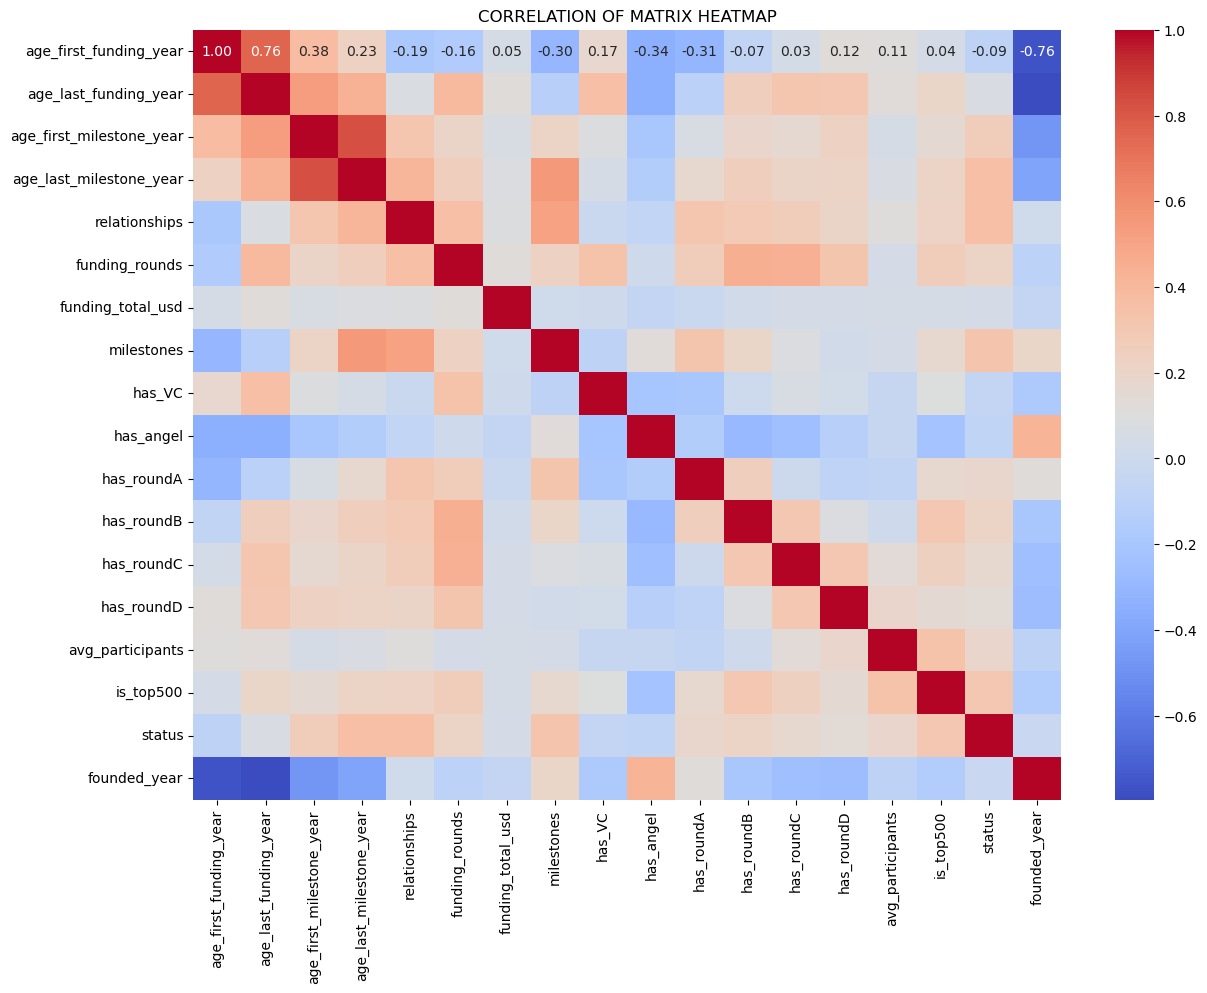

In [55]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(14, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('CORRELATION OF MATRIX HEATMAP')
plt.show()

# PRE PROCESSING FOR MODEL

## Feature Engineering

In [56]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones  has_VC  has_angel  ...  has_roundC  has_roundD  \
0           3       0          1  ...           0           0   
1           1       1          0  ...           1           1   
2           2       0          0  ...           0           0   
3           1       0          0  ...           1           1   
4           1       1          1  ...           0           0   

   avg_participants  is_top500  status  State     category           City  \
0            1.0000          0       1     CA        other          other   
1            4.7500          1       1     CA   enterprise          other   
2            4.0000          1       1     CA          web          other   
3            3.3333          1       1     CA     software          other   
4            1.0000          1       0     CA  games_video  San Francisco   

  founded_year has_RoundABCD  
0         2007             0  
1         2000             1  
2         2009             1  
3         2002             1  
4         2010             0  

[5 rows x 22 columns]

In [57]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones  has_VC  has_angel  ...  has_roundD  avg_participants  \
0           3       0          1  ...           0            1.0000   
1           1       1          0  ...           1            4.7500   
2           2       0          0  ...           0            4.0000   
3           1       0          0  ...           1            3.3333   
4           1       1          1  ...           0            1.0000   

   is_top500  status  State     category           City founded_year  \
0          0       1     CA        other          other         2007   
1          1       1     CA   enterprise          other         2000   
2          1       1     CA          web          other         2009   
3          1       1     CA     software          other         2002   
4          1       0     CA  games_video  San Francisco         2010   

  has_RoundABCD has_Investor  
0             0            1  
1             1            1  
2             1            0  
3             1            0  
4             0            1  

[5 rows x 23 columns]

In [58]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones  has_VC  has_angel  ...  avg_participants  is_top500  status  \
0           3       0          1  ...            1.0000          0       1   
1           1       1          0  ...            4.7500          1       1   
2           2       0          0  ...            4.0000          1       1   
3           1       0          0  ...            3.3333          1       1   
4           1       1          1  ...            1.0000          1       0   

   State     category           City  founded_year has_RoundABCD has_Investor  \
0     CA        other          other          2007             0            1   
1     CA   enterprise          other          2000             1            1   
2     CA          web          other          2009             1            0   
3     CA     software          other          2002             1            0   
4     CA  games_video  San Francisco          2010             0            1   

  has_Seed  
0        1  
1        0  
2        0  
3        0  
4        1  

[5 rows x 24 columns]

In [59]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones  has_VC  has_angel  ...  is_top500  status  State     category  \
0           3       0          1  ...          0       1     CA        other   
1           1       1          0  ...          1       1     CA   enterprise   
2           2       0          0  ...          1       1     CA          web   
3           1       0          0  ...          1       1     CA     software   
4           1       1          1  ...          1       0     CA  games_video   

            City  founded_year  has_RoundABCD has_Investor has_Seed  \
0          other          2007              0            1        1   
1          other          2000              1            1        0   
2          other          2009              1            0        0   
3          other          2002              1            0        0   
4  San Francisco          2010              0            1        1   

  invalid_startup  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 25 columns]

## Encoding

In [60]:
df_cat

State     category           City
0      CA        other          other
1      CA   enterprise          other
2      CA          web          other
3      CA     software          other
4      CA  games_video  San Francisco
..    ...          ...            ...
909    CA  advertising  San Francisco
910    MA        other          other
911    CA      biotech          other
912    CA     software  San Francisco
913    CA        other    Santa Clara

[914 rows x 3 columns]

In [61]:
Nominal = ['State','category','City']

In [62]:
df = pd.get_dummies(df, columns=Nominal)

In [63]:
df

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                    2.2493                 3.0027                    4.6685   
1                    5.1260                 9.9973                    7.0055   
2                    1.0329                 1.0329                    1.4575   
3                    3.1315                 5.3151                    6.0027   
4                    0.0000                 1.6685                    0.0384   
..                      ...                    ...                       ...   
909                  0.5178                 0.5178                    0.5808   
910                  7.2521                 9.2274                    6.0027   
911                  8.4959                 8.4959                    9.0055   
912                  0.7589                 2.8329                    0.7589   
913                  3.1205                 3.1205                    4.0027   

     age_last_milestone_year  relationships  funding_rounds  \
0                     6.7041              3               3   
1                     7.0055              9               4   
2                     2.2055              5               1   
3                     6.0027              5               3   
4                     0.0384              2               2   
..                       ...            ...             ...   
909                   4.5260              9               1   
910                   6.0027              1               3   
911                   9.0055              5               1   
912                   3.8356             12               2   
913                   4.0027              4               1   

     funding_total_usd  milestones  has_VC  has_angel  ...  \
0               375000           3       0          1  ...   
1             40100000           1       1          0  ...   
2              2600000           2       0          0  ...   
3             40000000           1       0          0  ...   
4              1300000           1       1          1  ...   
..                 ...         ...     ...        ...  ...   
909            1100000           2       0          0  ...   
910           52000000           1       1          0  ...   
911           44000000           1       0          0  ...   
912           15500000           2       0          0  ...   
913           20000000           1       0          0  ...   

     category_public_relations  category_semiconductor  category_software  \
0                        False                   False              False   
1                        False                   False              False   
2                        False                   False              False   
3                        False                   False               True   
4                        False                   False              False   
..                         ...                     ...                ...   
909                      False                   False              False   
910                      False                   False              False   
911                      False                   False              False   
912                      False                   False               True   
913                      False                   False              False   

     category_web  City_Mountain View  City_New York  City_Palo Alto  \
0           False               False          False           False   
1           False               False          False           False   
2            True               False          False           False   
3           False               False          False           False   
4           False               False          False           False   
..            ...                 ...            ...             ...   
909         False               False          False           False   
910         False               False    

In [64]:
data1 =df.copy()
data2 =df.copy()
data3 =df.copy()
data4 =df.copy()
data5 =df.copy()

# MODELLING

### DATA 1 -> Handling Outliers with Box-Cox

In [65]:
data1.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'founded_year',
       'has_RoundABCD', 'has_Investor', 'has_Seed', 'invalid_startup',
       'State_CA', 'State_MA', 'State_NY', 'State_TX', 'State_WA',
       'State_other', 'category_advertising', 'category_biotech',
       'category_ecommerce', 'category_enterprise', 'category_games_video',
       'category_hardware', 'category_mobile', 'category_network_hosting',
       'category_other', 'category_public_relations', 'category_semiconductor',
       'category_software', 'category_web', 'City_Mountain View',
       'City_New York', 'City_Palo Alto', 'City_San Francisco',
       'City_Santa Clara', 'City_other'],
      dtype='object')

In [66]:
columns = [
    'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
    'age_last_milestone_year', 'relationships', 'funding_rounds',
    'funding_total_usd', 'milestones', 'avg_participants', 'founded_year'
]

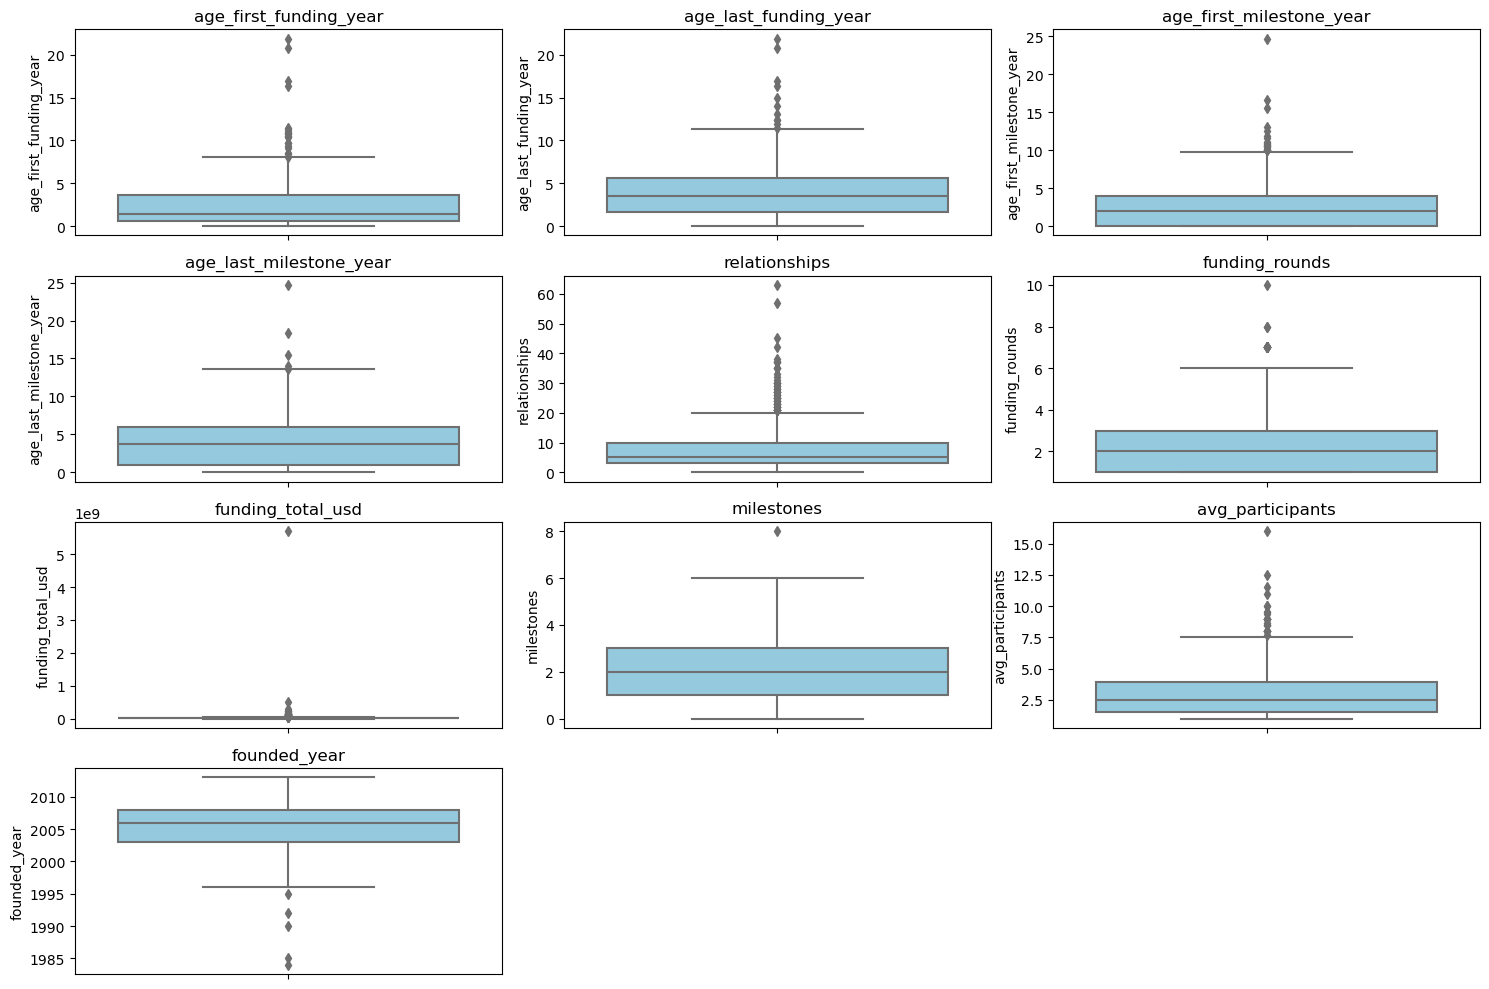

In [67]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data1[col],color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [68]:
from scipy.stats import boxcox
for col in columns:
    data1[col] = data1[col].apply(lambda x: x + 1 if x <= 0 else x)
    data1[col], _ = boxcox(data1[col])

data1.head()

c:\Users\anuli\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning:

overflow encountered in multiply

c:\Users\anuli\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning:

overflow encountered in reduce



age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                0.893401               1.376249                  1.735125   
1                1.994506               3.749843                  2.263512   
2                0.032494               0.032578                  0.387659   
3                1.310174               2.364039                  2.058555   
4                0.000000               0.567227                 -2.573566   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                 2.586859       1.142827        0.976761          39.298771   
1                 2.666397       2.378860        1.196116          86.275840   
2                 0.895577       1.705508        0.000000          54.871615   
3                 2.391674       1.705508        0.976761          86.240869   
4                -2.057435       0.710577        0.643236          48.768219   

   milestones  has_VC  has_angel  ...  category_public_relations  \
0    0.875141       0          1  ...                      False   
1    0.000000       1          0  ...                      False   
2    0.599197       0          0  ...                      False   
3    0.000000       0          0  ...                      False   
4    0.000000       1          1  ...                      False   

   category_semiconductor  category_software  category_web  \
0                   False              False         False   
1                   False              False         False   
2                   False              False          True   
3                   False               True         False   
4                   False              False         False   

   City_Mountain View  City_New York  City_Palo Alto  City_San Francisco  \
0               False          False           False               False   
1               False          False           False               False   
2               False          False           False               False   
3               False          False           False               False   
4               False          False           False                True   

   City_Santa Clara  City_other  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False       False  

[5 rows x 47 columns]

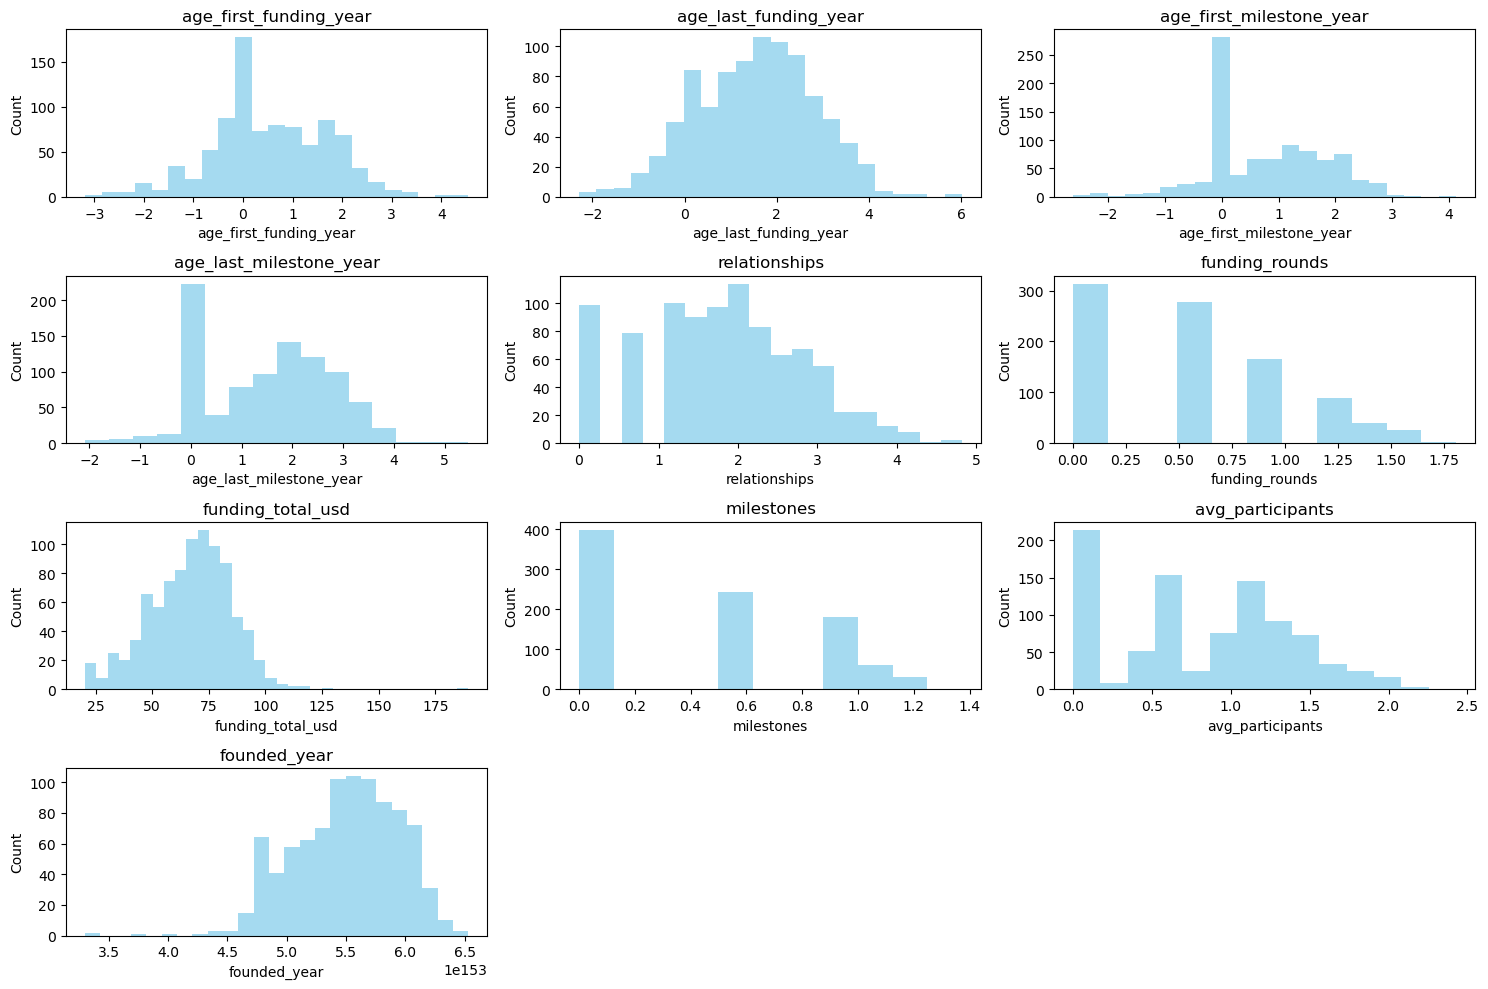

In [69]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x=data1[col],color="skyblue",edgecolor="None")
    plt.title(col)

plt.tight_layout()
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
X = data1.drop('status', axis=1)
y = data1['status']

In [71]:
scalers = [
    MinMaxScaler(),
    StandardScaler(),
    RobustScaler()
]

In [72]:
!pip install xgboost
import xgboost as xgb

In [73]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {}),
    ('KNN', KNeighborsClassifier(), {}),
    ('SVM (Linear)', SVC(kernel='linear'), {
        'C': [0.1, 0.5, 1]
    }),
    ('SVM (RBF)', SVC(kernel='rbf'), {
        'C': [0.1, 0.5, 1],
        'gamma': ['scale', 'auto']
    }),
    ('SVM (Poly)', SVC(kernel='poly'), {
        'C': [0.1, 0.5, 1],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 80, 100],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
        }),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 80, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }),
    ('AdaBoost', AdaBoostClassifier(), {
        'n_estimators': [50, 80, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': [50, 80, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
]

In [74]:
def summarize_metrics(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df

In [75]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    This function takes a model and a parameter grid, performs hyperparameter tuning using gridsearch.
    and returns the best esimator
    """
    # Fitting the data with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ # Best model

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # Evaluation 
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return best_model

In [76]:
results_df = None

Running model: Logistic Regression with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7934
Test Accuracy: 0.7855


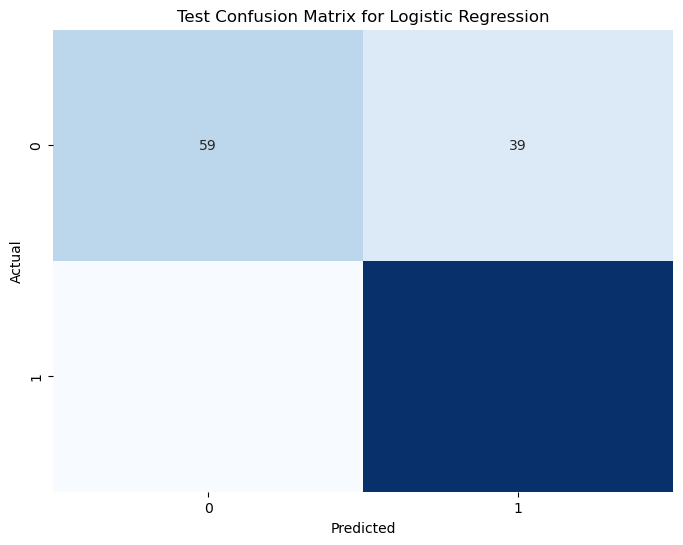



Classification Report for Logistic Regression on Test Set
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        98
           1       0.80      0.89      0.84       177

    accuracy                           0.79       275
   macro avg       0.77      0.74      0.75       275
weighted avg       0.78      0.79      0.78       275



Running model: KNN with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7731
Test Accuracy: 0.6800


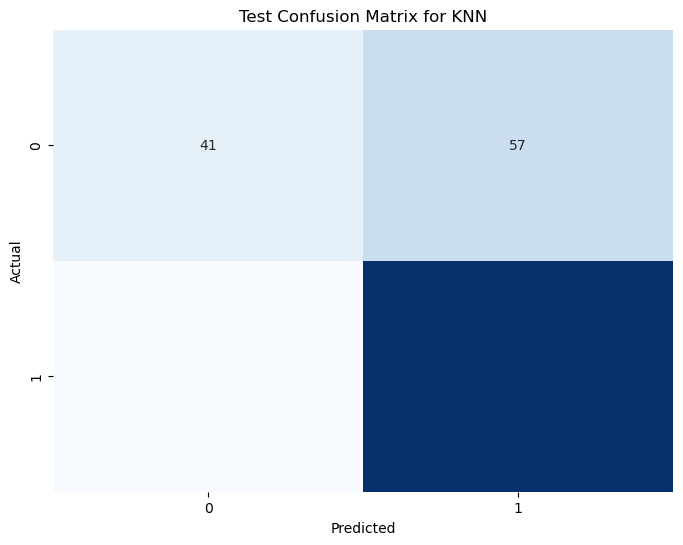



Classification Report for KNN on Test Set
              precision    recall  f1-score   support

           0       0.57      0.42      0.48        98
           1       0.72      0.82      0.77       177

    accuracy                           0.68       275
   macro avg       0.64      0.62      0.63       275
weighted avg       0.67      0.68      0.67       275



Running model: SVM (Linear) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1}
Training Accuracy: 0.7856
Test Accuracy: 0.7927


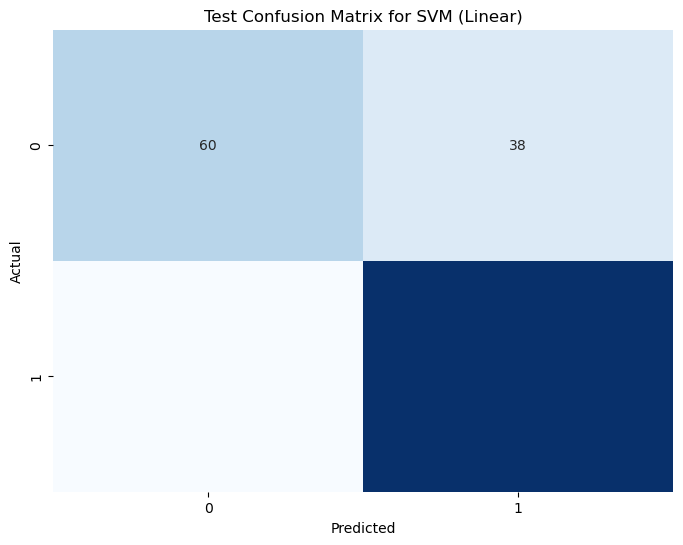



Classification Report for SVM (Linear) on Test Set
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        98
           1       0.81      0.89      0.85       177

    accuracy                           0.79       275
   macro avg       0.78      0.75      0.76       275
weighted avg       0.79      0.79      0.79       275



Running model: SVM (RBF) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.8122
Test Accuracy: 0.7709


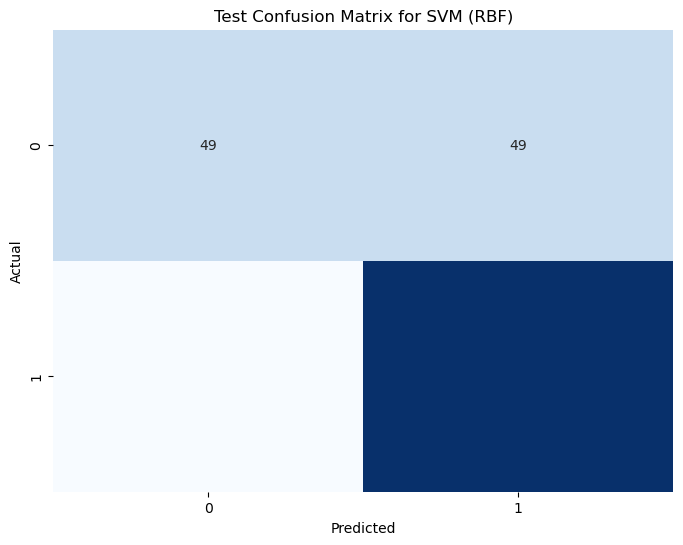



Classification Report for SVM (RBF) on Test Set
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        98
           1       0.77      0.92      0.84       177

    accuracy                           0.77       275
   macro avg       0.77      0.71      0.72       275
weighted avg       0.77      0.77      0.76       275



Running model: SVM (Poly) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale'}
Training Accuracy: 0.8216
Test Accuracy: 0.7818


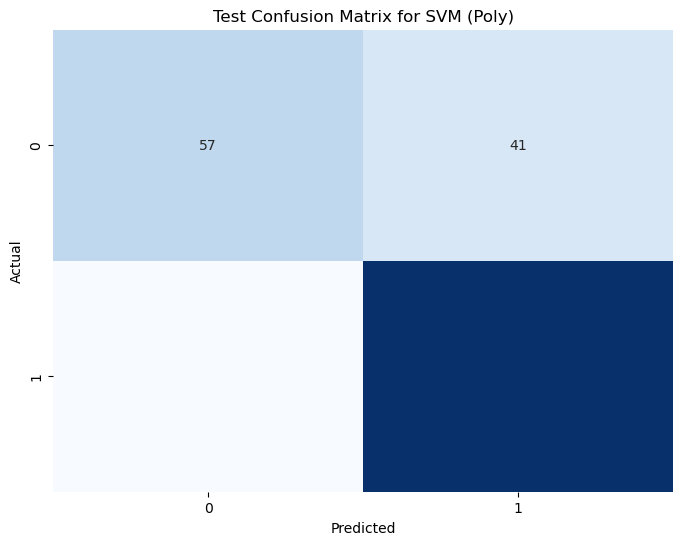



Classification Report for SVM (Poly) on Test Set
              precision    recall  f1-score   support

           0       0.75      0.58      0.66        98
           1       0.79      0.89      0.84       177

    accuracy                           0.78       275
   macro avg       0.77      0.74      0.75       275
weighted avg       0.78      0.78      0.77       275



Running model: Random Forest with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 80}
Training Accuracy: 0.9296
Test Accuracy: 0.8291


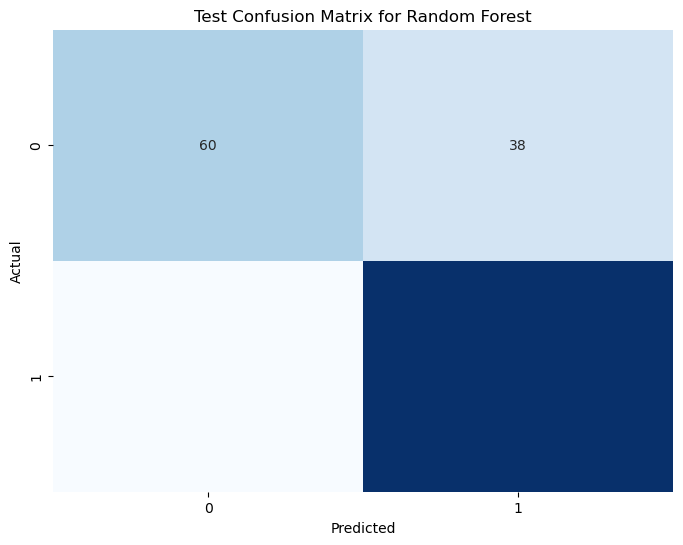



Classification Report for Random Forest on Test Set
              precision    recall  f1-score   support

           0       0.87      0.61      0.72        98
           1       0.82      0.95      0.88       177

    accuracy                           0.83       275
   macro avg       0.84      0.78      0.80       275
weighted avg       0.83      0.83      0.82       275



Running model: Decision Tree with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Training Accuracy: 0.9108
Test Accuracy: 0.7636


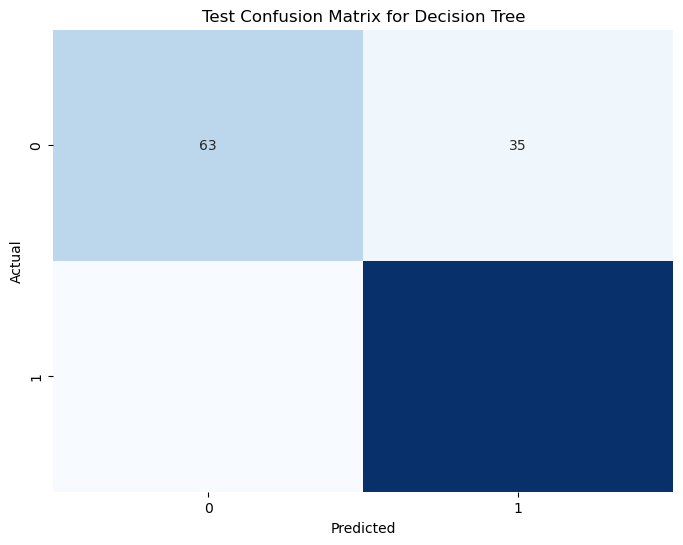



Classification Report for Decision Tree on Test Set
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        98
           1       0.81      0.83      0.82       177

    accuracy                           0.76       275
   macro avg       0.74      0.74      0.74       275
weighted avg       0.76      0.76      0.76       275



Running model: XGBoost with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Training Accuracy: 0.8545
Test Accuracy: 0.8364


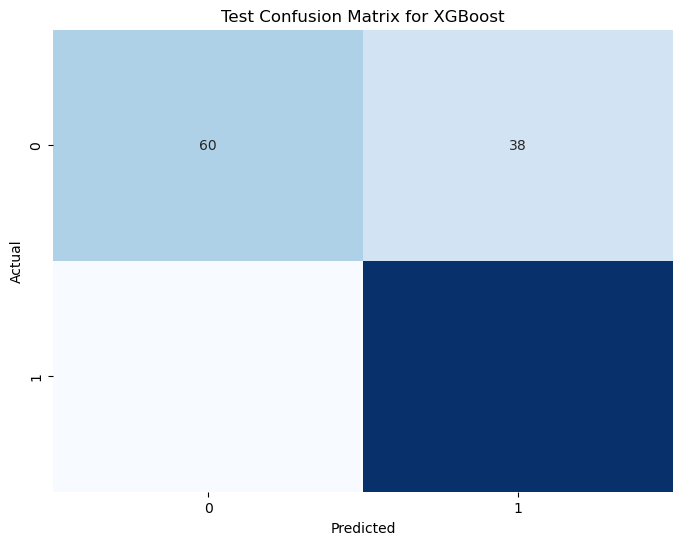



Classification Report for XGBoost on Test Set
              precision    recall  f1-score   support

           0       0.90      0.61      0.73        98
           1       0.82      0.96      0.88       177

    accuracy                           0.84       275
   macro avg       0.86      0.79      0.81       275
weighted avg       0.85      0.84      0.83       275



Running model: AdaBoost with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8138
Test Accuracy: 0.8255


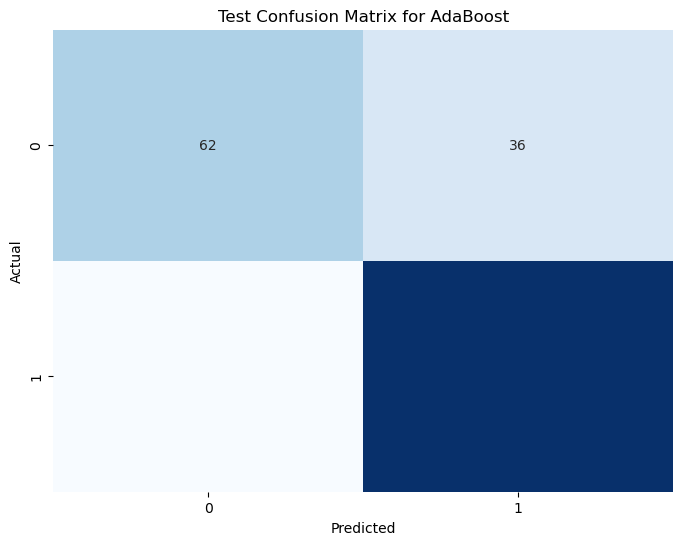



Classification Report for AdaBoost on Test Set
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        98
           1       0.82      0.93      0.87       177

    accuracy                           0.83       275
   macro avg       0.83      0.78      0.80       275
weighted avg       0.83      0.83      0.82       275



Running model: Gradient Boosting with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Training Accuracy: 0.9640
Test Accuracy: 0.7964


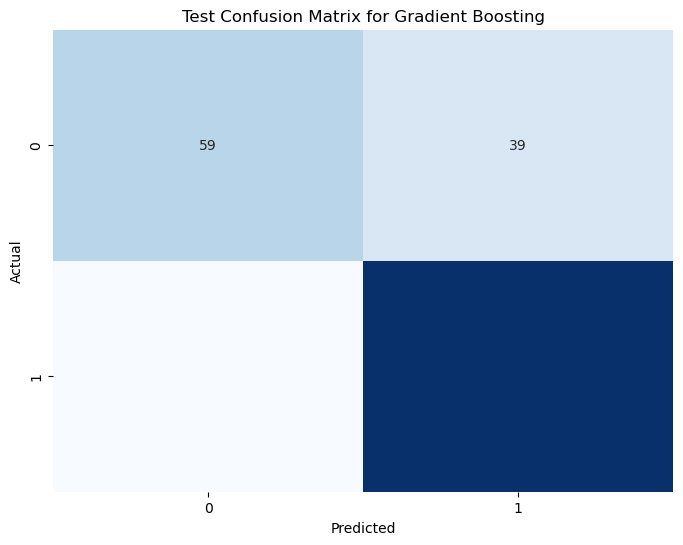



Classification Report for Gradient Boosting on Test Set
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        98
           1       0.80      0.90      0.85       177

    accuracy                           0.80       275
   macro avg       0.79      0.75      0.76       275
weighted avg       0.79      0.80      0.79       275



Running model: Logistic Regression with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.8044
Test Accuracy: 0.7782


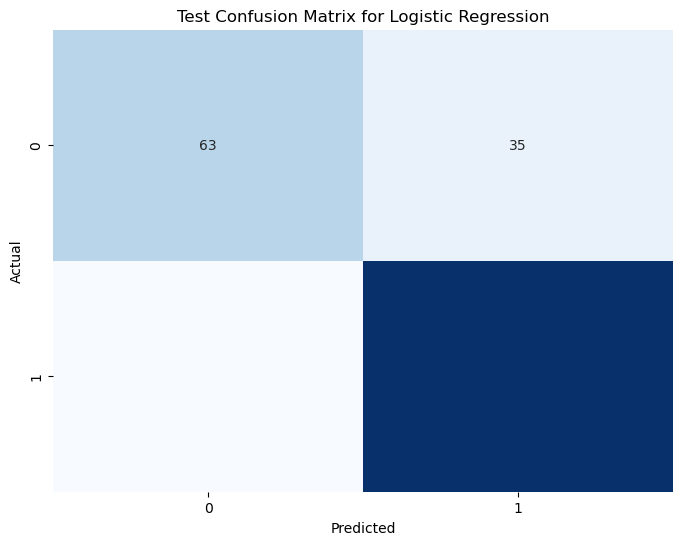



Classification Report for Logistic Regression on Test Set
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        98
           1       0.81      0.85      0.83       177

    accuracy                           0.78       275
   macro avg       0.76      0.75      0.75       275
weighted avg       0.77      0.78      0.78       275



Running model: KNN with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7762
Test Accuracy: 0.7309


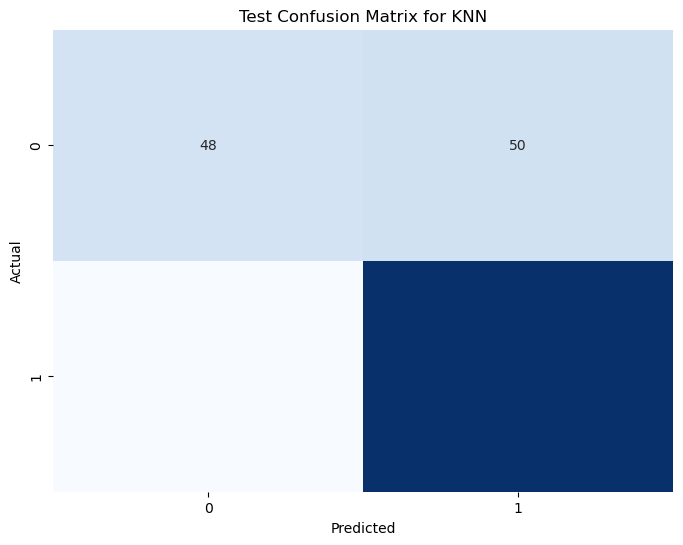



Classification Report for KNN on Test Set
              precision    recall  f1-score   support

           0       0.67      0.49      0.56        98
           1       0.75      0.86      0.81       177

    accuracy                           0.73       275
   macro avg       0.71      0.68      0.68       275
weighted avg       0.72      0.73      0.72       275



Running model: SVM (Linear) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 0.5}
Training Accuracy: 0.7997
Test Accuracy: 0.7745


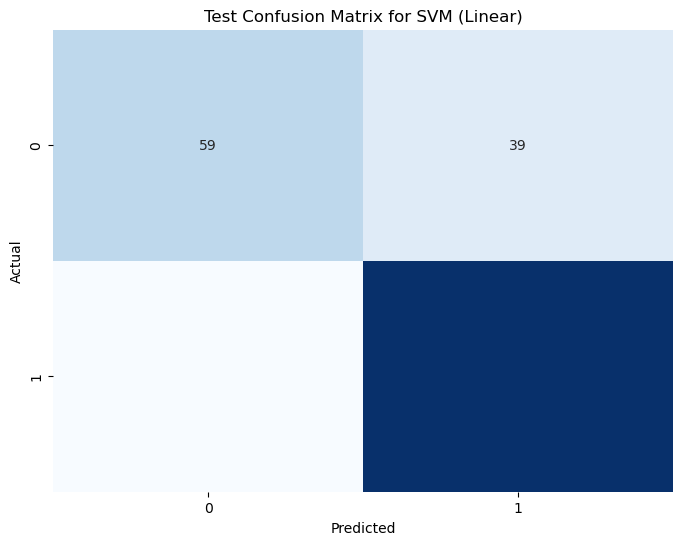



Classification Report for SVM (Linear) on Test Set
              precision    recall  f1-score   support

           0       0.72      0.60      0.66        98
           1       0.80      0.87      0.83       177

    accuracy                           0.77       275
   macro avg       0.76      0.74      0.74       275
weighted avg       0.77      0.77      0.77       275



Running model: SVM (RBF) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.8623
Test Accuracy: 0.7673


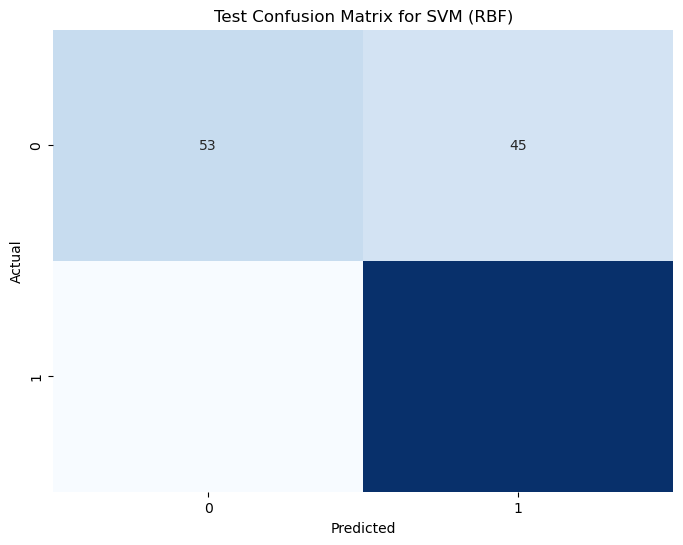



Classification Report for SVM (RBF) on Test Set
              precision    recall  f1-score   support

           0       0.74      0.54      0.62        98
           1       0.78      0.89      0.83       177

    accuracy                           0.77       275
   macro avg       0.76      0.72      0.73       275
weighted avg       0.76      0.77      0.76       275



Running model: SVM (Poly) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale'}
Training Accuracy: 0.8075
Test Accuracy: 0.7200


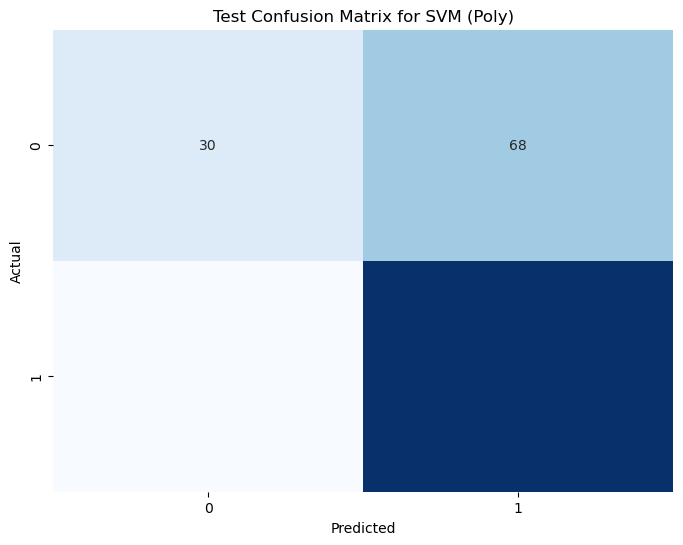



Classification Report for SVM (Poly) on Test Set
              precision    recall  f1-score   support

           0       0.77      0.31      0.44        98
           1       0.71      0.95      0.81       177

    accuracy                           0.72       275
   macro avg       0.74      0.63      0.63       275
weighted avg       0.73      0.72      0.68       275



Running model: Random Forest with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.8983
Test Accuracy: 0.8291


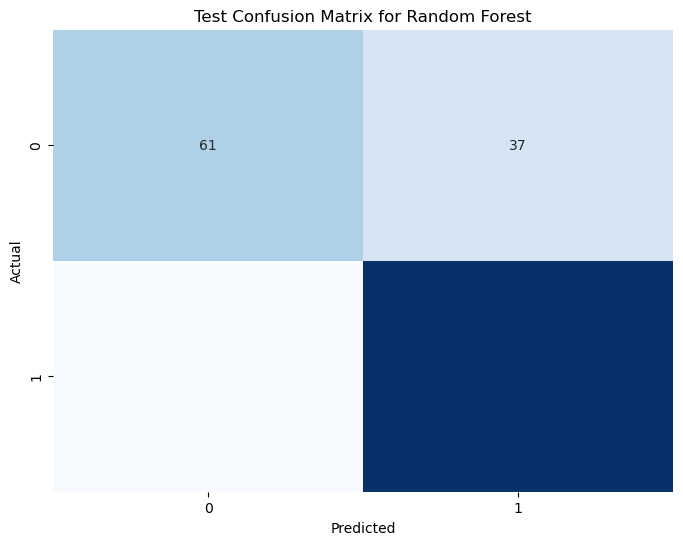



Classification Report for Random Forest on Test Set
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        98
           1       0.82      0.94      0.88       177

    accuracy                           0.83       275
   macro avg       0.84      0.78      0.80       275
weighted avg       0.83      0.83      0.82       275



Running model: Decision Tree with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
Training Accuracy: 0.8936
Test Accuracy: 0.7491


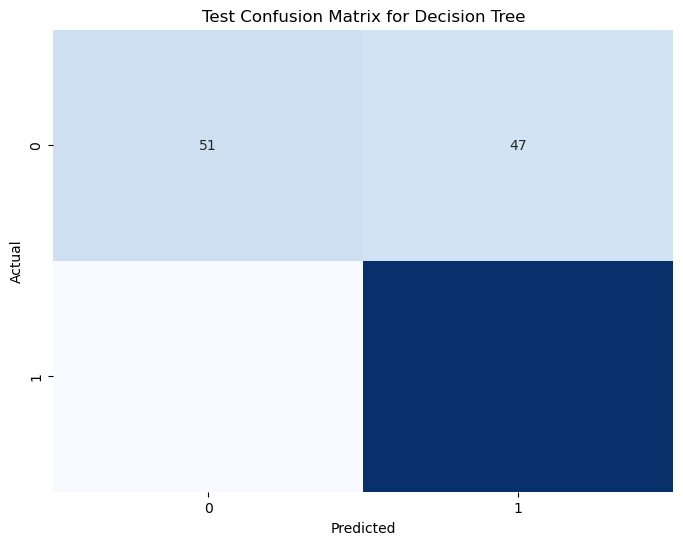



Classification Report for Decision Tree on Test Set
              precision    recall  f1-score   support

           0       0.70      0.52      0.60        98
           1       0.77      0.88      0.82       177

    accuracy                           0.75       275
   macro avg       0.73      0.70      0.71       275
weighted avg       0.74      0.75      0.74       275



Running model: XGBoost with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Training Accuracy: 0.8545
Test Accuracy: 0.8364


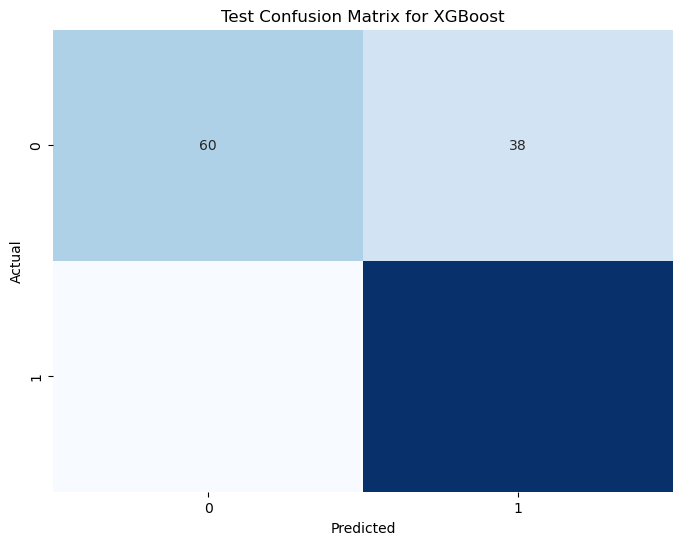



Classification Report for XGBoost on Test Set
              precision    recall  f1-score   support

           0       0.90      0.61      0.73        98
           1       0.82      0.96      0.88       177

    accuracy                           0.84       275
   macro avg       0.86      0.79      0.81       275
weighted avg       0.85      0.84      0.83       275



Running model: AdaBoost with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8138
Test Accuracy: 0.8255


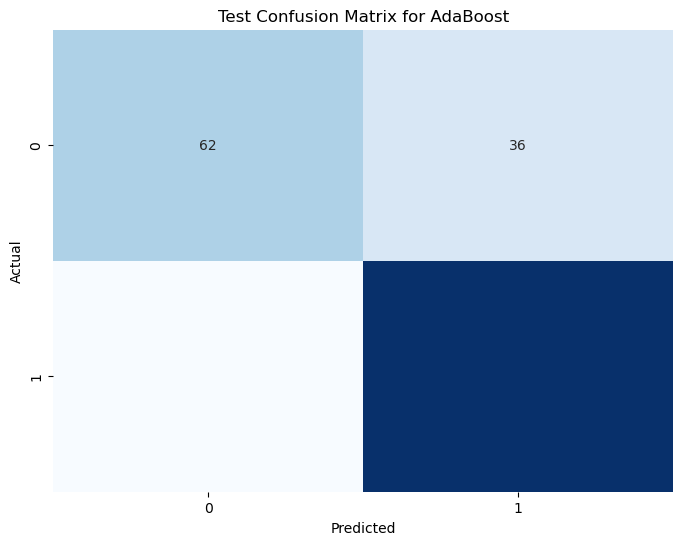



Classification Report for AdaBoost on Test Set
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        98
           1       0.82      0.93      0.87       177

    accuracy                           0.83       275
   macro avg       0.83      0.78      0.80       275
weighted avg       0.83      0.83      0.82       275



Running model: Gradient Boosting with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Training Accuracy: 1.0000
Test Accuracy: 0.7927


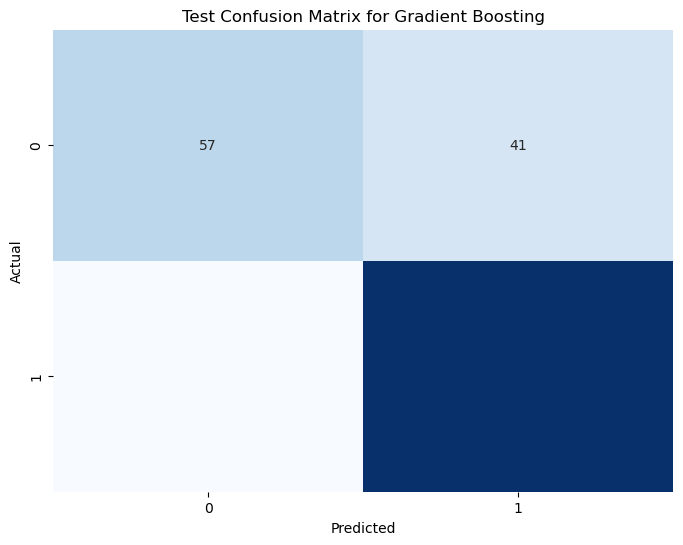



Classification Report for Gradient Boosting on Test Set
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        98
           1       0.80      0.91      0.85       177

    accuracy                           0.79       275
   macro avg       0.79      0.75      0.76       275
weighted avg       0.79      0.79      0.78       275



Running model: Logistic Regression with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7919
Test Accuracy: 0.7855


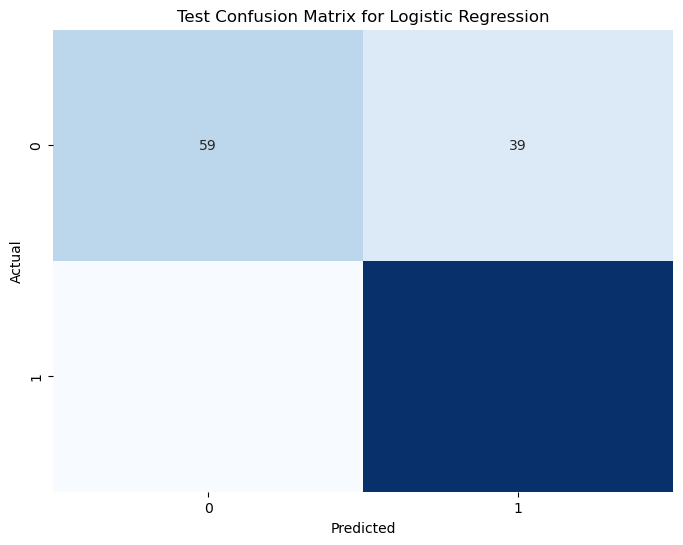



Classification Report for Logistic Regression on Test Set
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        98
           1       0.80      0.89      0.84       177

    accuracy                           0.79       275
   macro avg       0.77      0.74      0.75       275
weighted avg       0.78      0.79      0.78       275



Running model: KNN with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.8059
Test Accuracy: 0.7491


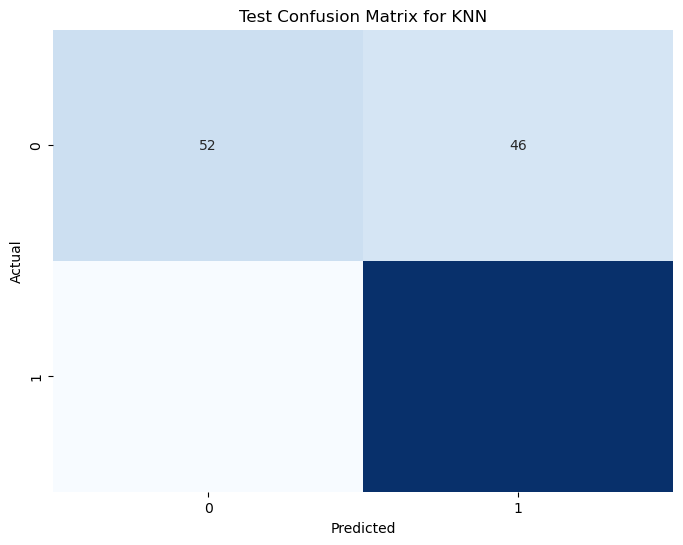



Classification Report for KNN on Test Set
              precision    recall  f1-score   support

           0       0.69      0.53      0.60        98
           1       0.77      0.87      0.82       177

    accuracy                           0.75       275
   macro avg       0.73      0.70      0.71       275
weighted avg       0.74      0.75      0.74       275



Running model: SVM (Linear) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 0.5}
Training Accuracy: 0.7966
Test Accuracy: 0.7818


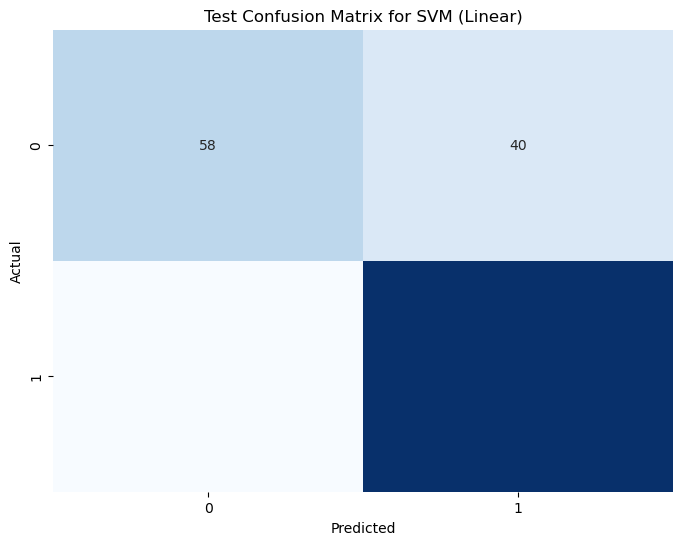



Classification Report for SVM (Linear) on Test Set
              precision    recall  f1-score   support

           0       0.74      0.59      0.66        98
           1       0.80      0.89      0.84       177

    accuracy                           0.78       275
   macro avg       0.77      0.74      0.75       275
weighted avg       0.78      0.78      0.78       275



Running model: SVM (RBF) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.8435
Test Accuracy: 0.7964


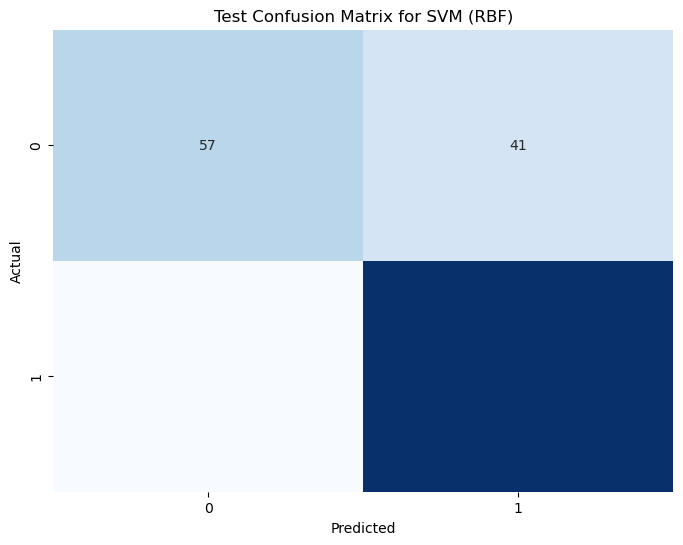



Classification Report for SVM (RBF) on Test Set
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        98
           1       0.80      0.92      0.85       177

    accuracy                           0.80       275
   macro avg       0.79      0.75      0.76       275
weighted avg       0.80      0.80      0.79       275



Running model: SVM (Poly) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 0.5, 'degree': 2, 'gamma': 'scale'}
Training Accuracy: 0.7966
Test Accuracy: 0.7927


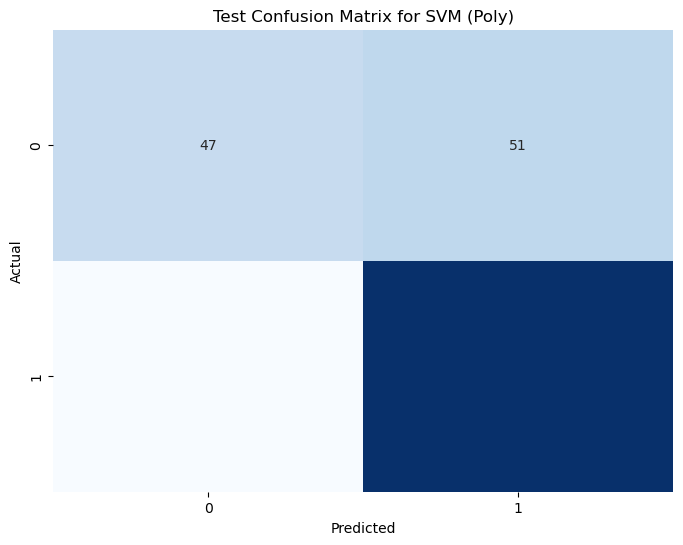



Classification Report for SVM (Poly) on Test Set
              precision    recall  f1-score   support

           0       0.89      0.48      0.62        98
           1       0.77      0.97      0.86       177

    accuracy                           0.79       275
   macro avg       0.83      0.72      0.74       275
weighted avg       0.81      0.79      0.77       275



Running model: Random Forest with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8364


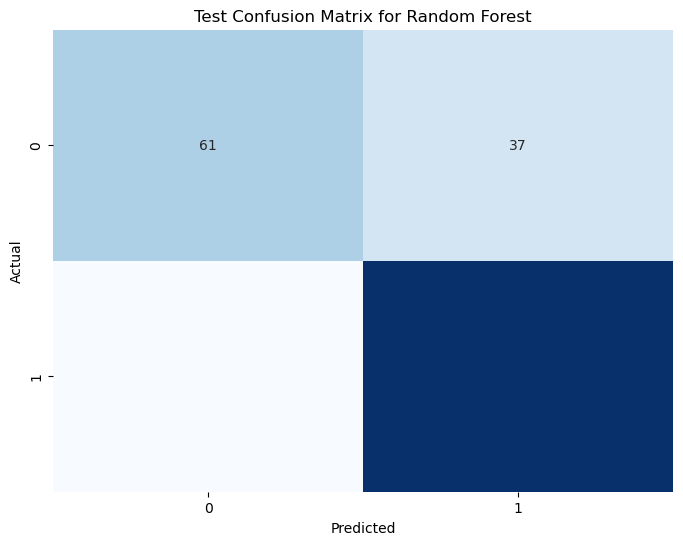



Classification Report for Random Forest on Test Set
              precision    recall  f1-score   support

           0       0.88      0.62      0.73        98
           1       0.82      0.95      0.88       177

    accuracy                           0.84       275
   macro avg       0.85      0.79      0.81       275
weighted avg       0.84      0.84      0.83       275



Running model: Decision Tree with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Training Accuracy: 0.8795
Test Accuracy: 0.7455


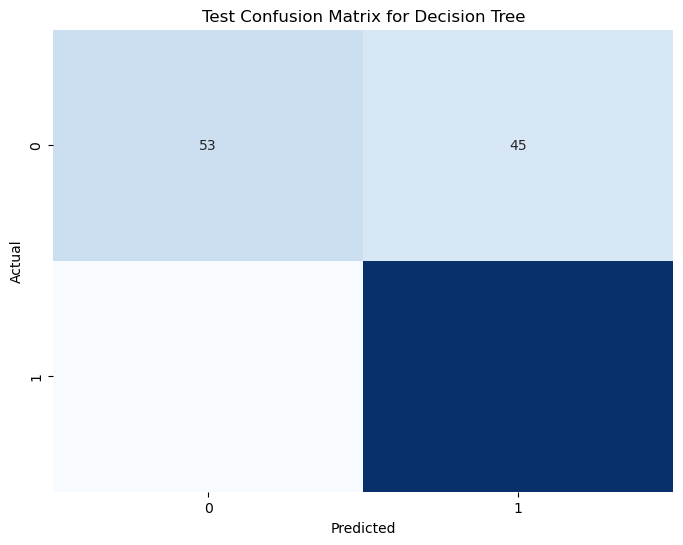



Classification Report for Decision Tree on Test Set
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        98
           1       0.77      0.86      0.81       177

    accuracy                           0.75       275
   macro avg       0.73      0.70      0.71       275
weighted avg       0.74      0.75      0.74       275



Running model: XGBoost with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Training Accuracy: 0.8545
Test Accuracy: 0.8364


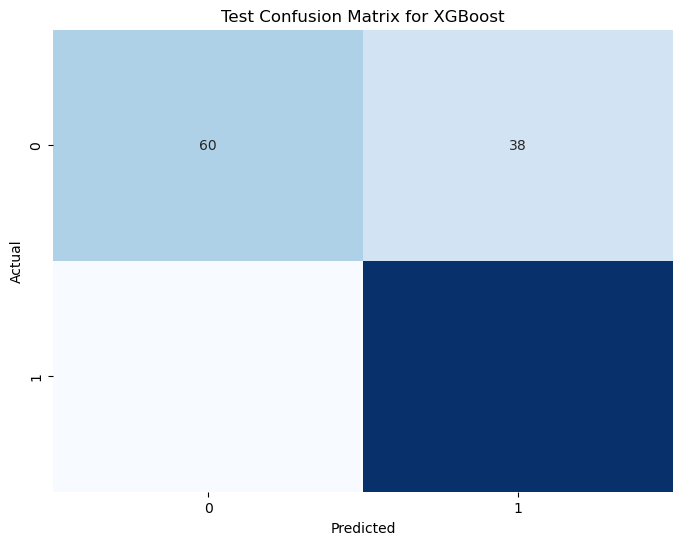



Classification Report for XGBoost on Test Set
              precision    recall  f1-score   support

           0       0.90      0.61      0.73        98
           1       0.82      0.96      0.88       177

    accuracy                           0.84       275
   macro avg       0.86      0.79      0.81       275
weighted avg       0.85      0.84      0.83       275



Running model: AdaBoost with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8138
Test Accuracy: 0.8255


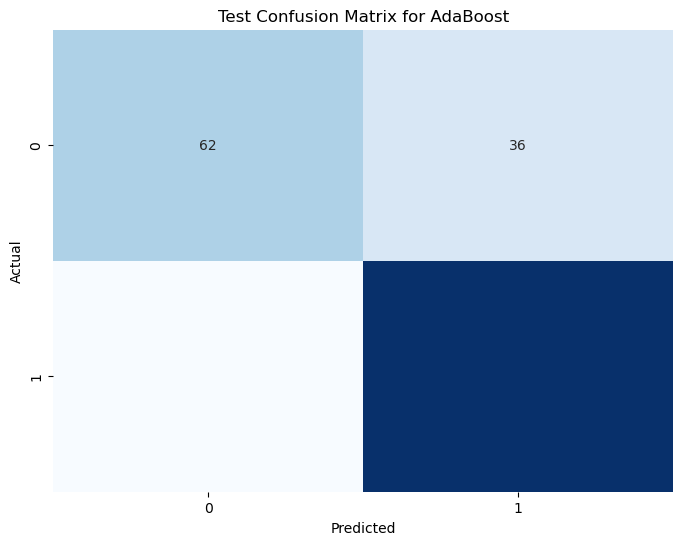



Classification Report for AdaBoost on Test Set
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        98
           1       0.82      0.93      0.87       177

    accuracy                           0.83       275
   macro avg       0.83      0.78      0.80       275
weighted avg       0.83      0.83      0.82       275



Running model: Gradient Boosting with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Training Accuracy: 0.9640
Test Accuracy: 0.7927


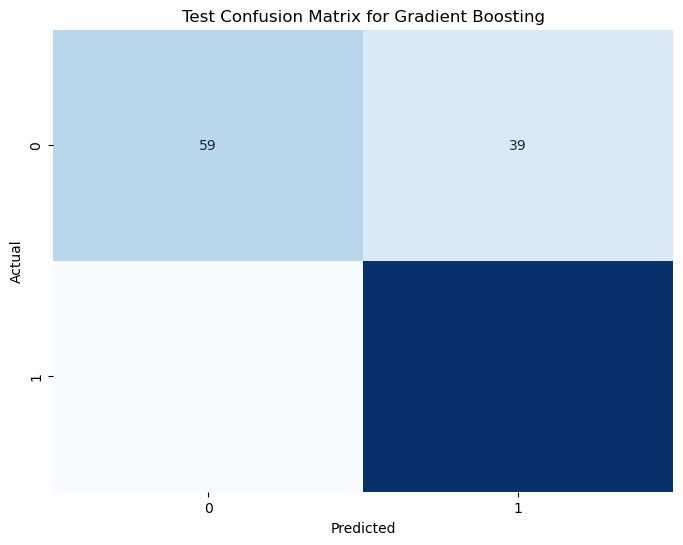



Classification Report for Gradient Boosting on Test Set
              precision    recall  f1-score   support

           0       0.77      0.60      0.67        98
           1       0.80      0.90      0.85       177

    accuracy                           0.79       275
   macro avg       0.78      0.75      0.76       275
weighted avg       0.79      0.79      0.79       275





In [77]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    X_scaled = imputer.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

    for model_name, model, param_grid in models:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyperparameter Tuning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train, y_train, X_test, y_test)

        # Predict using best model
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics(
            model_name,
            y_train, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")

        # ======== Print Classification Report ==============
        print("\n=======================================================\n")
        print(f"Classification Report for {model_name} on Test Set")
        print(classification_report(y_test, y_test_pred))

        print("\n=======================================================\n")

In [78]:
results_df

Model  Scaling Method  Train Accuracy  Test Accuracy  \
0   Logistic Regression    MinMaxScaler            0.79           0.79   
1                   KNN    MinMaxScaler            0.77           0.68   
2          SVM (Linear)    MinMaxScaler            0.79           0.79   
3             SVM (RBF)    MinMaxScaler            0.81           0.77   
4            SVM (Poly)    MinMaxScaler            0.82           0.78   
5         Random Forest    MinMaxScaler            0.93           0.83   
6         Decision Tree    MinMaxScaler            0.91           0.76   
7               XGBoost    MinMaxScaler            0.85           0.84   
8              AdaBoost    MinMaxScaler            0.81           0.83   
9     Gradient Boosting    MinMaxScaler            0.96           0.80   
10  Logistic Regression  StandardScaler            0.80           0.78   
11                  KNN  StandardScaler            0.78           0.73   
12         SVM (Linear)  StandardScaler            0.80           0.77   
13            SVM (RBF)  StandardScaler            0.86           0.77   
14           SVM (Poly)  StandardScaler            0.81           0.72   
15        Random Forest  StandardScaler            0.90           0.83   
16        Decision Tree  StandardScaler            0.89           0.75   
17              XGBoost  StandardScaler            0.85           0.84   
18             AdaBoost  StandardScaler            0.81           0.83   
19    Gradient Boosting  StandardScaler            1.00           0.79   
20  Logistic Regression    RobustScaler            0.79           0.79   
21                  KNN    RobustScaler            0.81           0.75   
22         SVM (Linear)    RobustScaler            0.80           0.78   
23            SVM (RBF)    RobustScaler            0.84           0.80   
24           SVM (Poly)    RobustScaler            0.80           0.79   
25        Random Forest    RobustScaler            1.00           0.84   
26        Decision Tree    RobustScaler            0.88           0.75   
27              XGBoost    RobustScaler            0.85           0.84   
28             AdaBoost    RobustScaler            0.81           0.83   
29    Gradient Boosting    RobustScaler            0.96           0.79   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.79            0.77          0.75         0.74   
1              0.76            0.64          0.72         0.62   
2              0.78            0.78          0.74         0.75   
3              0.83            0.77          0.76         0.71   
4              0.82            0.77          0.78         0.74   
5              0.95            0.84          0.90         0.78   
6              0.91            0.74          0.89         0.74   
7              0.87            0.86          0.81         0.79   
8              0.82            0.83          0.77         0.78   
9              0.97            0.79          0.95         0.75   
10             0.80            0.76          0.77         0.75   
11             0.76            0.71          0.73         0.68   
12             0.79            0.76          0.76         0.74   
13             0.87            0.76          0.82         0.72   
14             0.86            0.74          0.74         0.63   
15             0.92            0.84          0.86         0.78   
16             0.91            0.73          0.86         0.70   
17             0.87            0.86          0.81         0.79   
18             0.82            0.83          0.77         0.78   
19             1.00            0.79          1.00         0.75   
20             0.78            0.77          0.75         0.74   
21             0.81            0.73          0.76         0.70   
22             0.79            0.77          0.75         0.74   
23             0.86            0.79          0.80         0.75   
24             0.83            0.83          0.73         0.72   
25     

In [79]:
accuracy_scores = [0.85, 0.84, 0.85, 0.84]
model_names = ['XGBoost MinMaxScaler', 'XGBoost MinMaxScaler', 'XGBoost RobustScaler', 'XGBoost RobustScaler']
dataset_type = ['Train', 'Test', 'Train', 'Test']
vis = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Dataset Type': dataset_type})
fig = px.bar(vis, x='Model', y='Accuracy', color='Dataset Type', barmode='group', text='Accuracy')
fig.show()

### DATA 2 -> Without Over Sampling

In [80]:
from sklearn.model_selection import train_test_split
X = data2.drop('status', axis=1)
y = data2['status']

In [81]:
scalers = [
    MinMaxScaler(),
    StandardScaler(),
    RobustScaler()
]

In [82]:
!pip install xgboost
import xgboost as xgb

In [83]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {}),
    ('KNN', KNeighborsClassifier(), {}),
    ('SVM (Linear)', SVC(kernel='linear'), {
        'C': [0.1, 1, 10]
    }),
    ('SVM (RBF)', SVC(kernel='rbf'), {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }),
    ('SVM (Poly)', SVC(kernel='poly'), {
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
        }),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }),
    ('AdaBoost', AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
]

In [84]:
def summarize_metrics(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])
    
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df


In [85]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    This function takes a model and a parameter grid, performs hyperparameter tuning using gridsearch.
    and returns the best esimator
    """
    # Fitting the data with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ # Best model

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # ============== Evaluation ===============
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return best_model

In [86]:
results_df = None

Running model: Logistic Regression with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7731
Test Accuracy: 0.7745


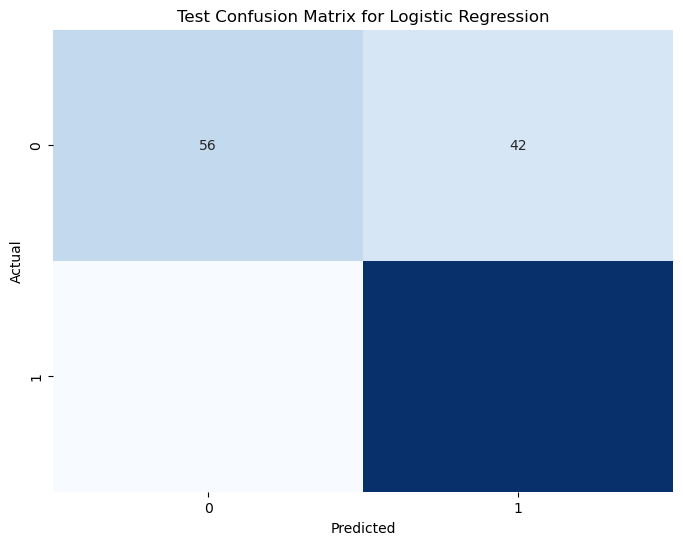



Running model: KNN with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7621
Test Accuracy: 0.6582


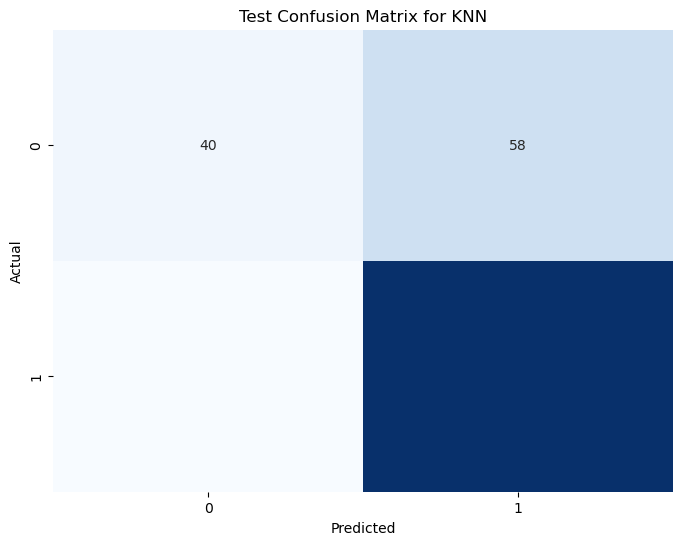



Running model: SVM (Linear) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1}
Training Accuracy: 0.7762
Test Accuracy: 0.7564


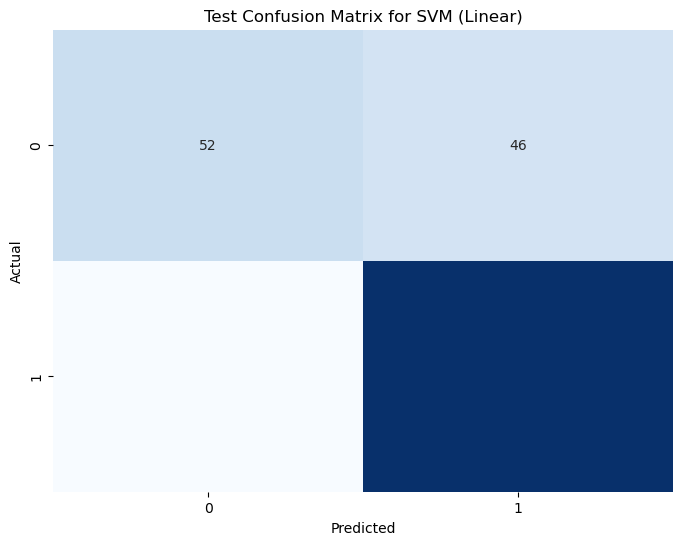



Running model: SVM (RBF) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 10, 'gamma': 'auto'}
Training Accuracy: 0.7809
Test Accuracy: 0.7455


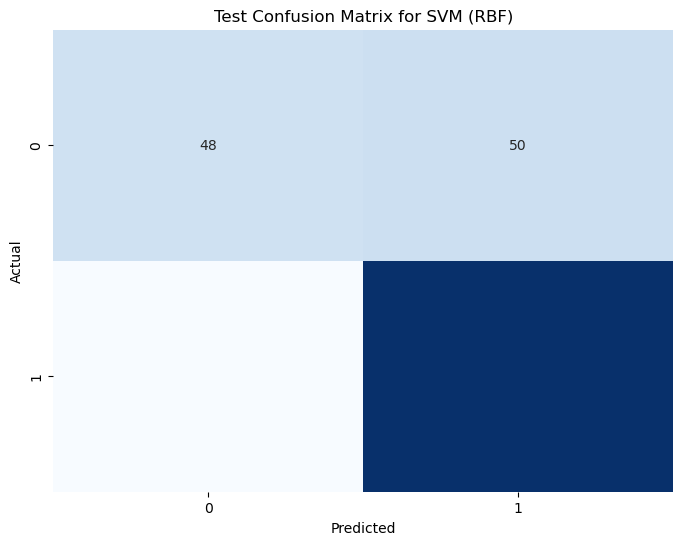



Running model: SVM (Poly) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale'}
Training Accuracy: 0.7840
Test Accuracy: 0.7273


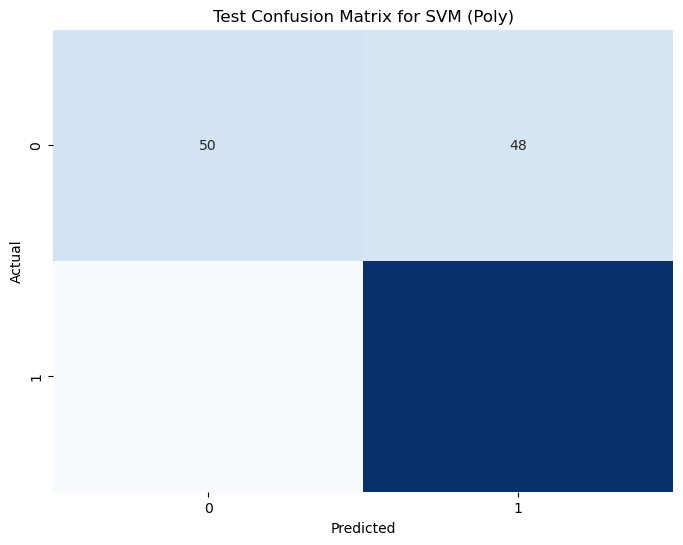



Running model: Random Forest with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Training Accuracy: 0.9233
Test Accuracy: 0.8218


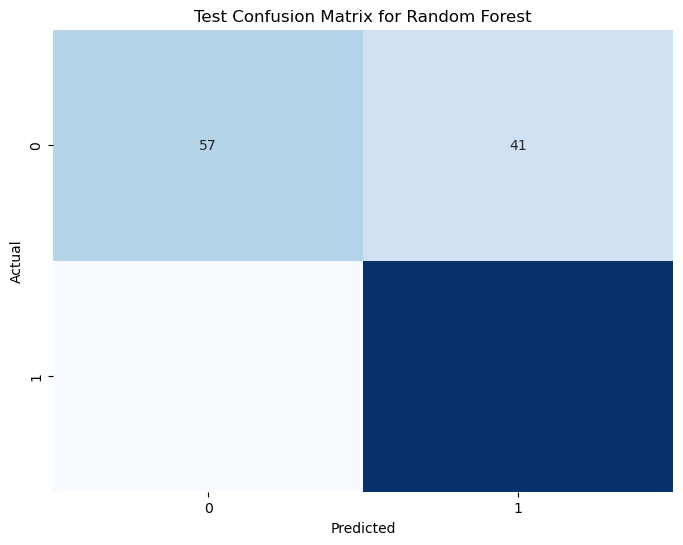



Running model: Decision Tree with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Training Accuracy: 0.9264
Test Accuracy: 0.7455


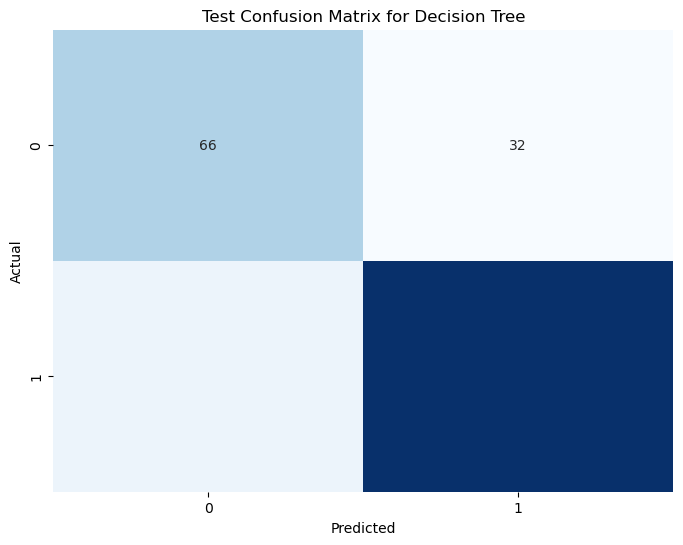



Running model: XGBoost with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training Accuracy: 0.8936
Test Accuracy: 0.8109


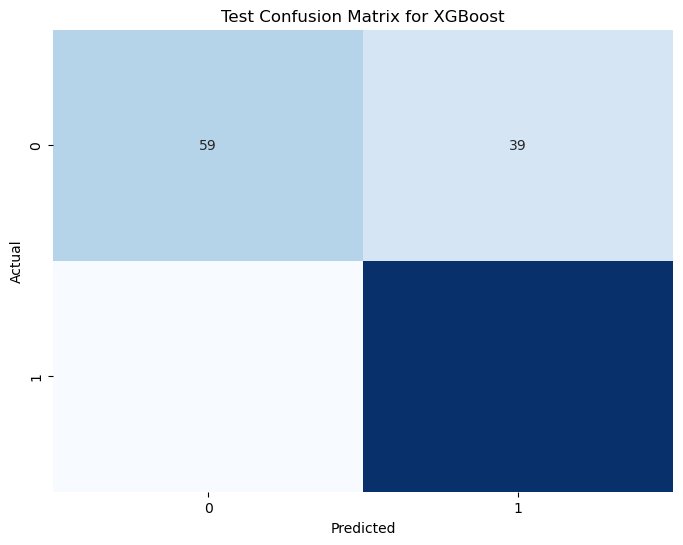



Running model: AdaBoost with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8122
Test Accuracy: 0.8255


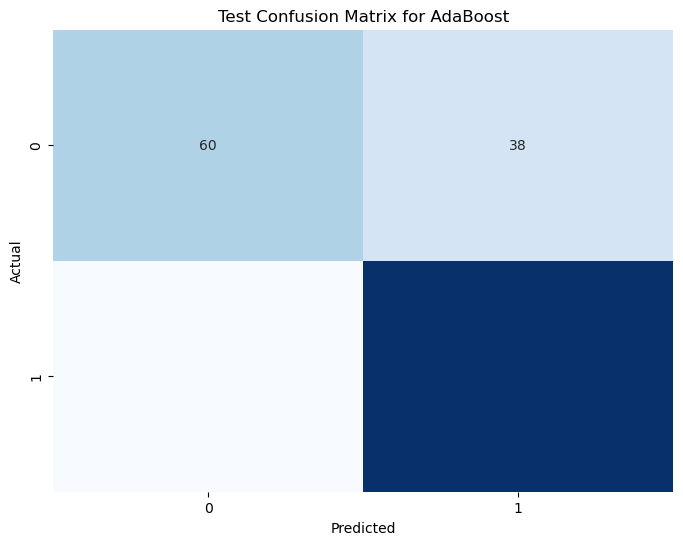



Running model: Gradient Boosting with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Training Accuracy: 0.9640
Test Accuracy: 0.8073


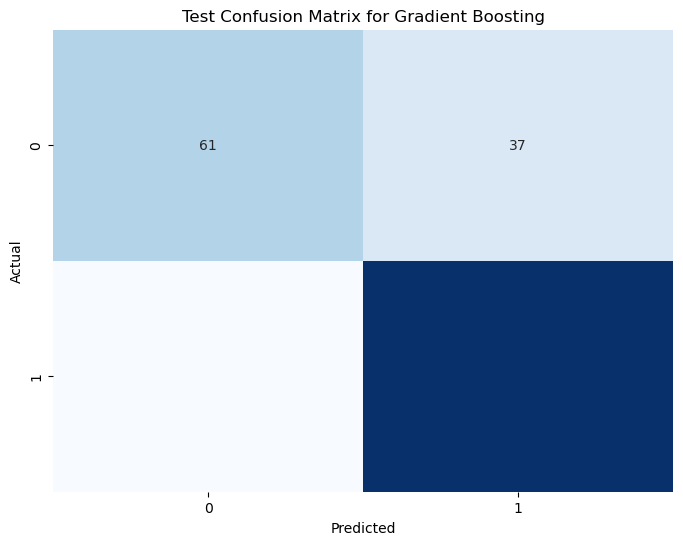



Running model: Logistic Regression with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7825
Test Accuracy: 0.7636


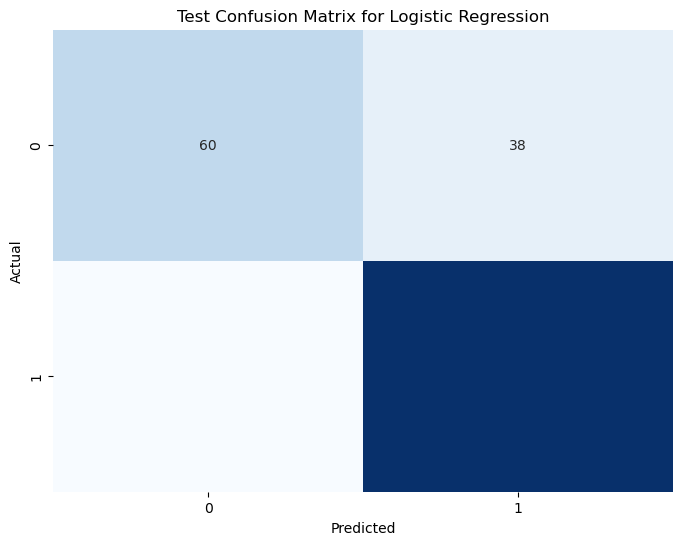



Running model: KNN with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7668
Test Accuracy: 0.6655


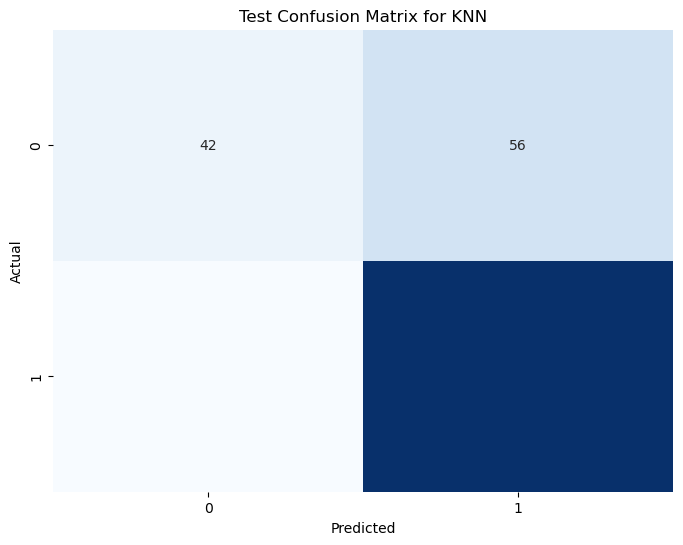



Running model: SVM (Linear) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 0.1}
Training Accuracy: 0.7793
Test Accuracy: 0.7455


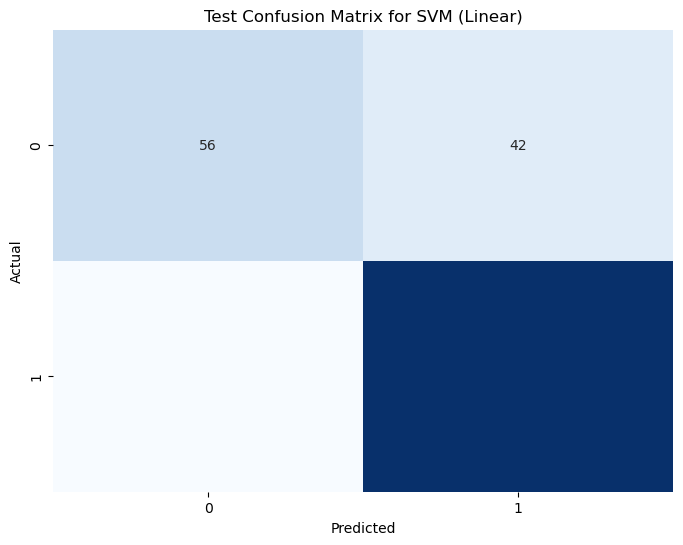



Running model: SVM (RBF) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.8498
Test Accuracy: 0.7491


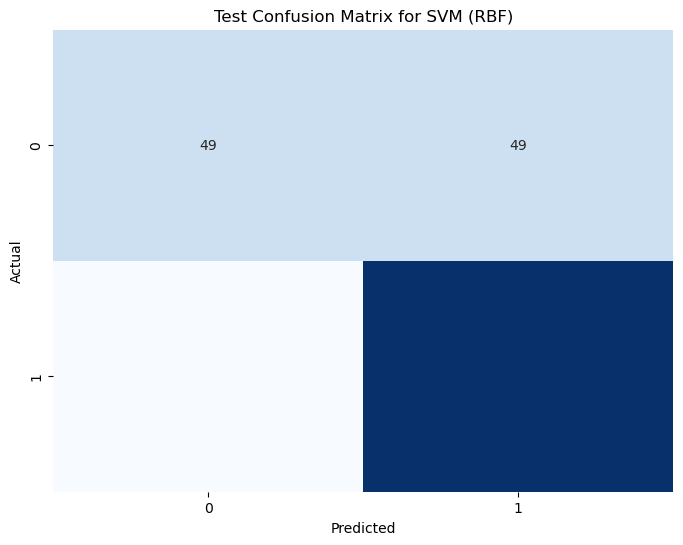



Running model: SVM (Poly) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'auto'}
Training Accuracy: 0.8153
Test Accuracy: 0.6727


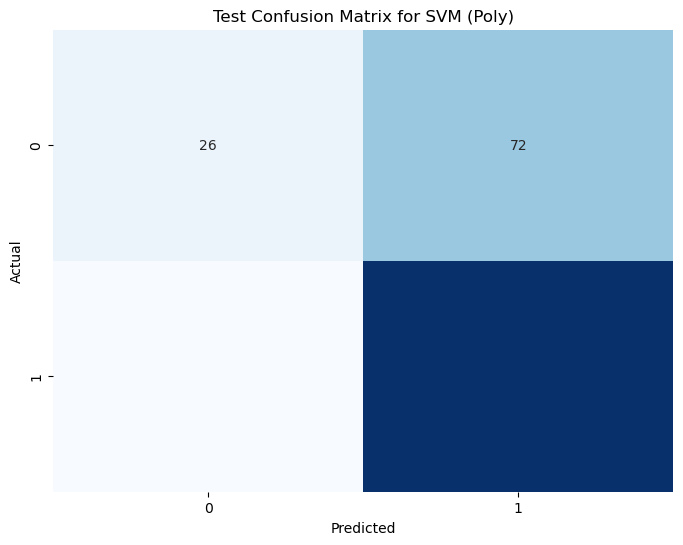



Running model: Random Forest with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8291


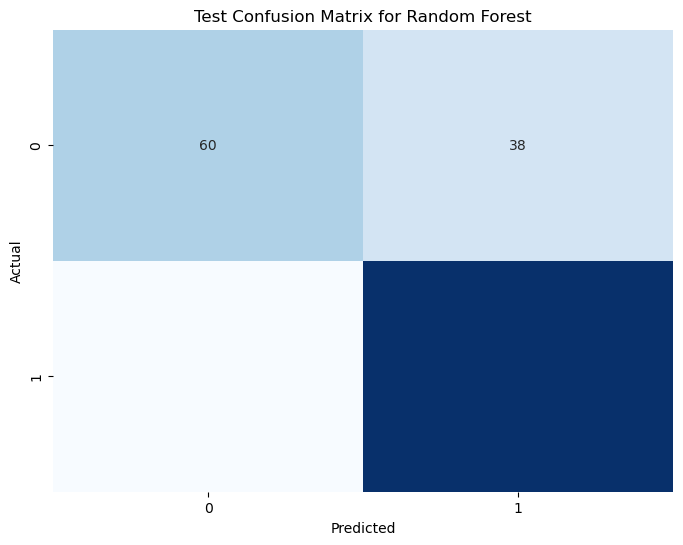



Running model: Decision Tree with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Training Accuracy: 0.8951
Test Accuracy: 0.7236


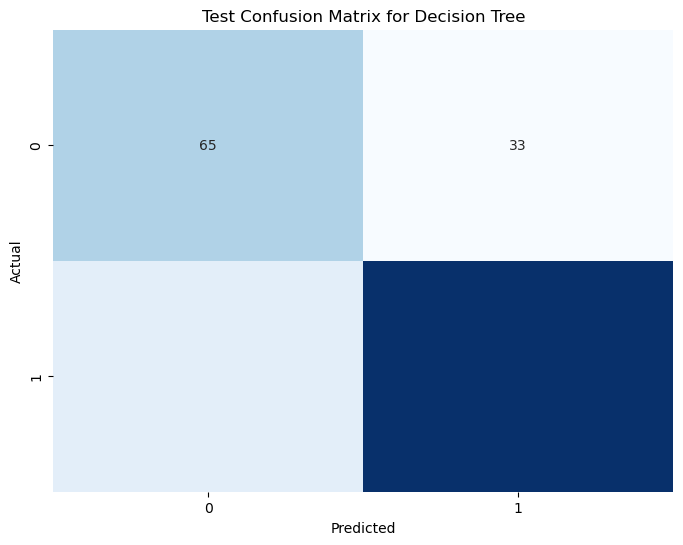



Running model: XGBoost with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training Accuracy: 0.8936
Test Accuracy: 0.8109


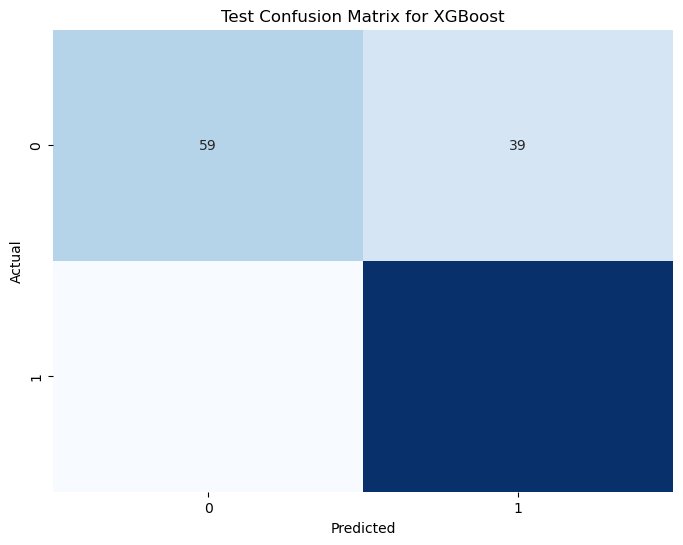



Running model: AdaBoost with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8122
Test Accuracy: 0.8255


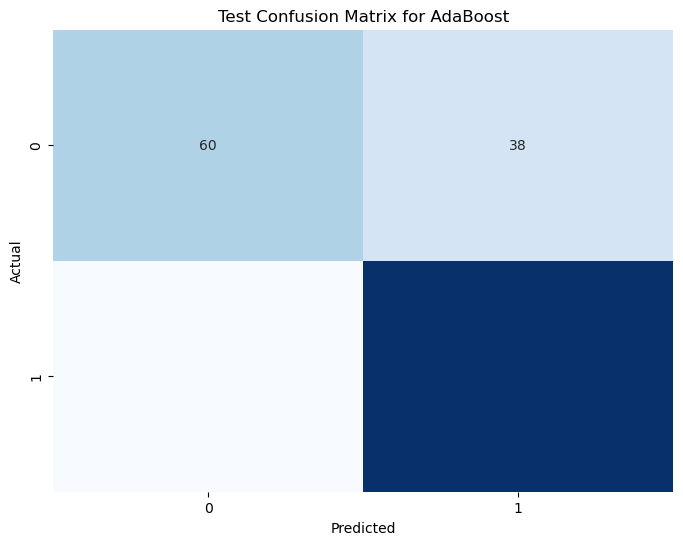



Running model: Gradient Boosting with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Training Accuracy: 0.9640
Test Accuracy: 0.8073


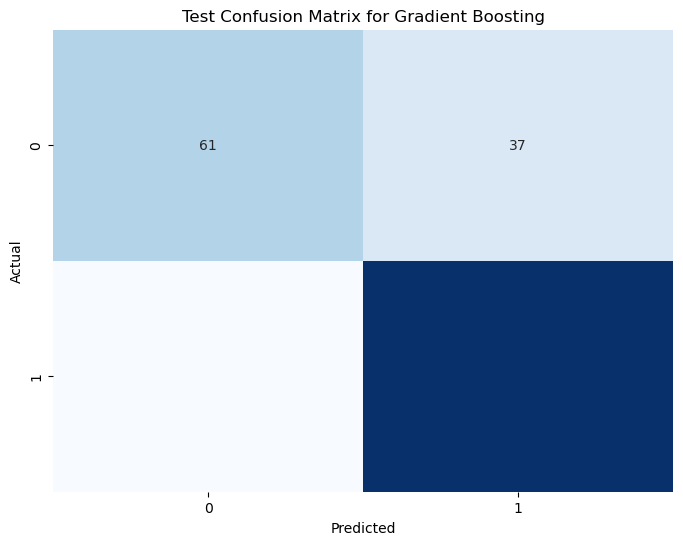



Running model: Logistic Regression with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7700
Test Accuracy: 0.7709


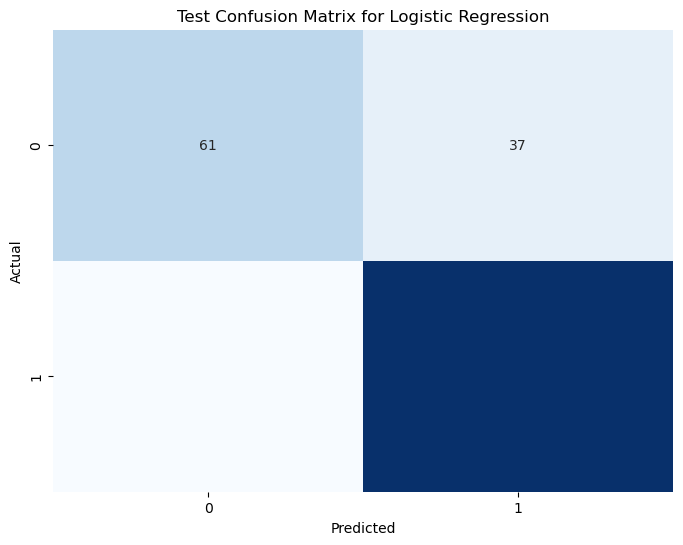



Running model: KNN with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7966
Test Accuracy: 0.7564


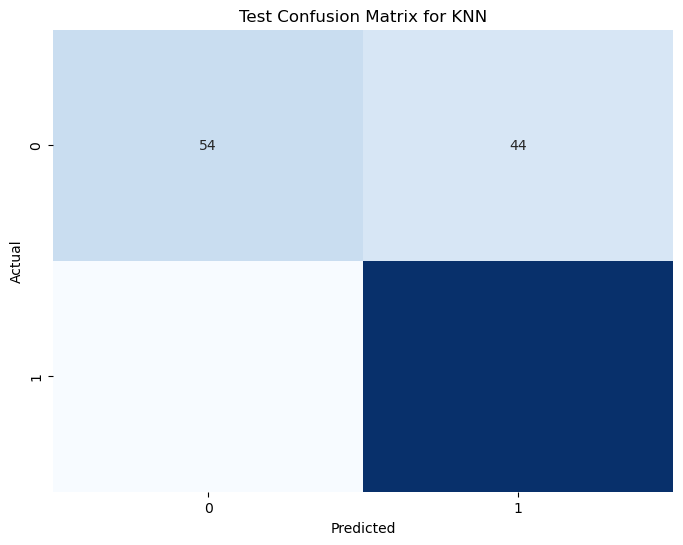



Running model: SVM (Linear) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 0.1}
Training Accuracy: 0.7700
Test Accuracy: 0.7673


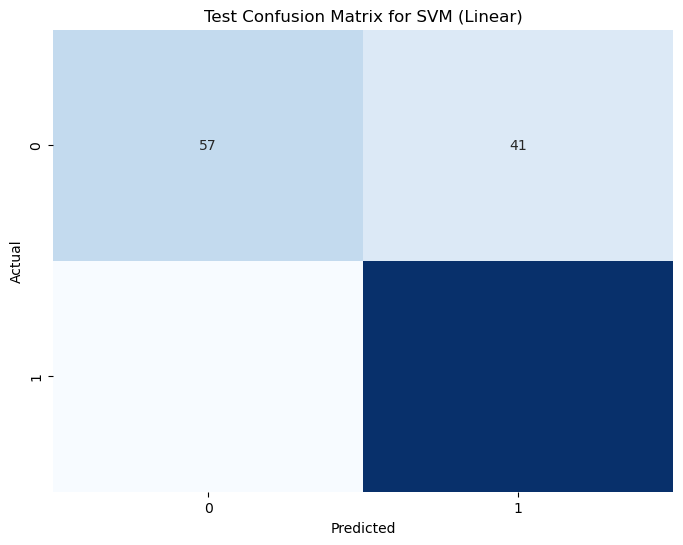



Running model: SVM (RBF) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.7825
Test Accuracy: 0.7745


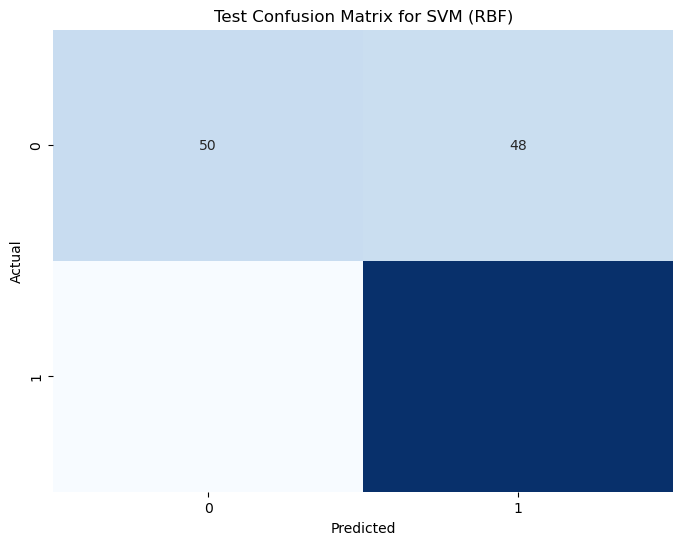



Running model: SVM (Poly) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'auto'}
Training Accuracy: 0.8106
Test Accuracy: 0.7745


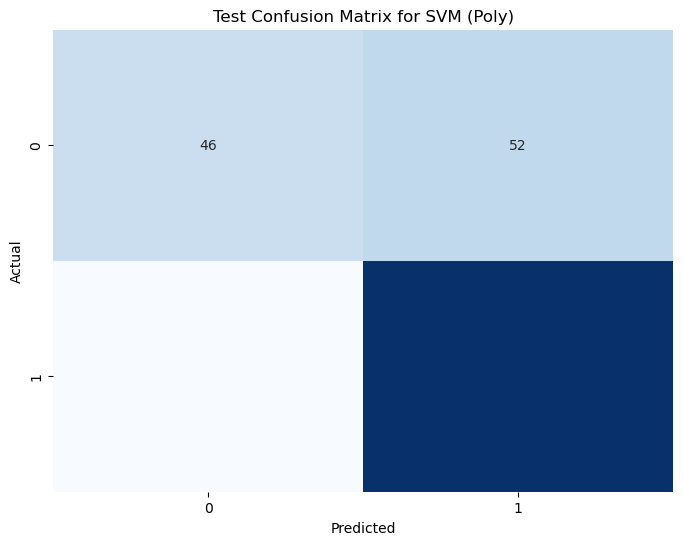



Running model: Random Forest with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.8145


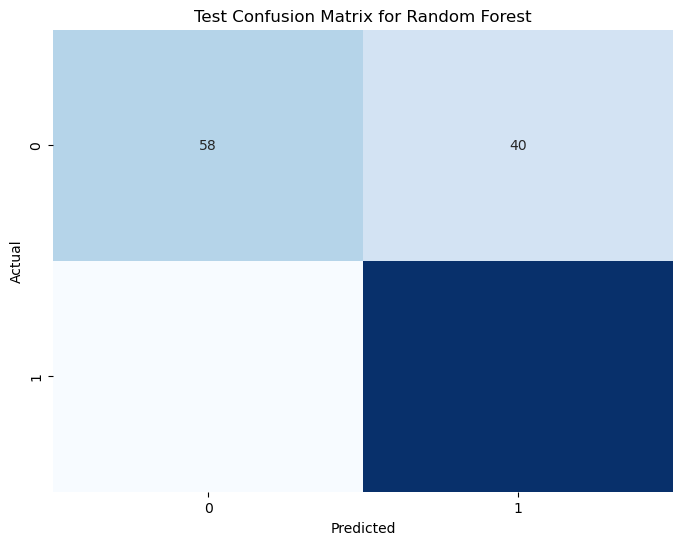



Running model: Decision Tree with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Training Accuracy: 0.8983
Test Accuracy: 0.7745


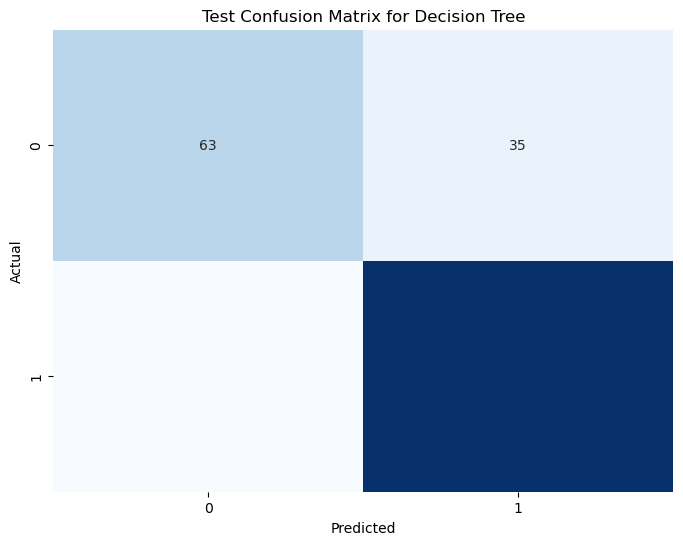



Running model: XGBoost with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training Accuracy: 0.8936
Test Accuracy: 0.8109


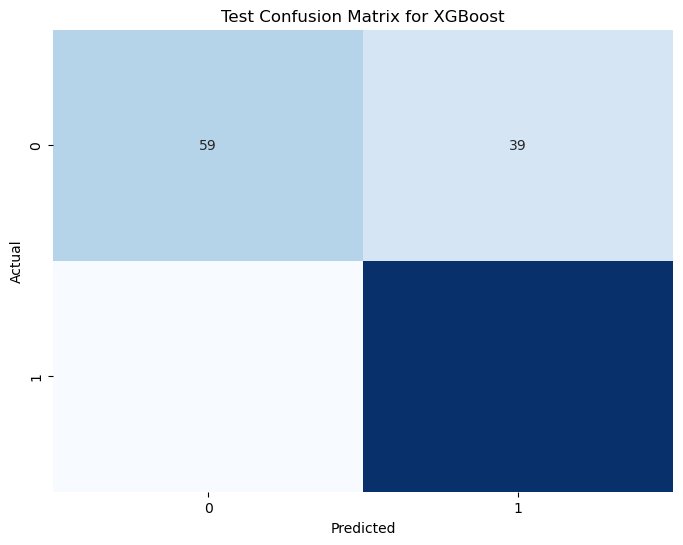



Running model: AdaBoost with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8122
Test Accuracy: 0.8255


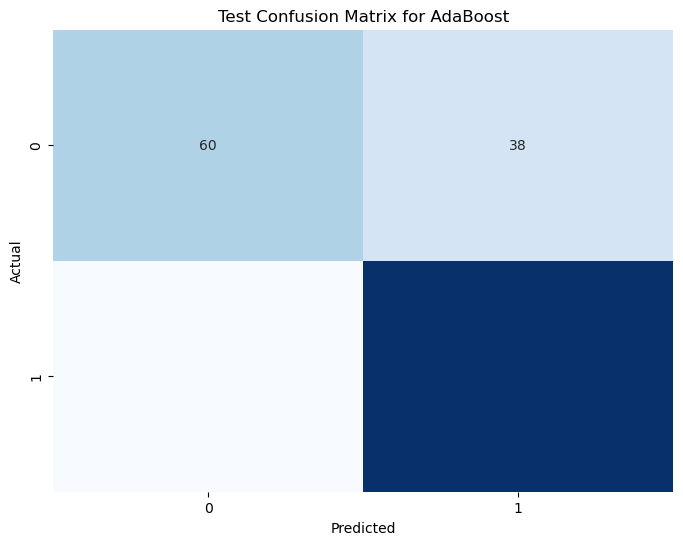



Running model: Gradient Boosting with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Training Accuracy: 0.9984
Test Accuracy: 0.8109


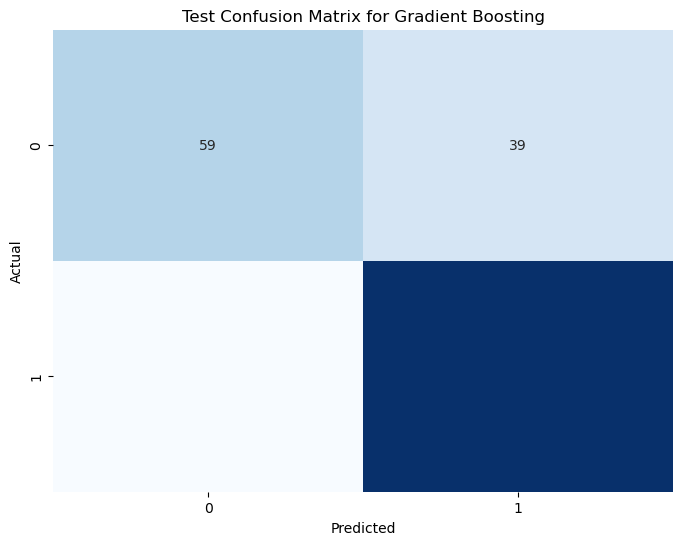

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    X_scaled = imputer.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

    for model_name, model, param_grid in models:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyperparameter Tuning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train, y_train, X_test, y_test)

        # Predict using best model
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics(
            model_name,
            y_train, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

In [88]:
results_df

Model  Scaling Method  Train Accuracy  Test Accuracy  \
0   Logistic Regression    MinMaxScaler            0.77           0.77   
1                   KNN    MinMaxScaler            0.76           0.66   
2          SVM (Linear)    MinMaxScaler            0.78           0.76   
3             SVM (RBF)    MinMaxScaler            0.78           0.75   
4            SVM (Poly)    MinMaxScaler            0.78           0.73   
5         Random Forest    MinMaxScaler            0.92           0.82   
6         Decision Tree    MinMaxScaler            0.93           0.75   
7               XGBoost    MinMaxScaler            0.89           0.81   
8              AdaBoost    MinMaxScaler            0.81           0.83   
9     Gradient Boosting    MinMaxScaler            0.96           0.81   
10  Logistic Regression  StandardScaler            0.78           0.76   
11                  KNN  StandardScaler            0.77           0.67   
12         SVM (Linear)  StandardScaler            0.78           0.75   
13            SVM (RBF)  StandardScaler            0.85           0.75   
14           SVM (Poly)  StandardScaler            0.82           0.67   
15        Random Forest  StandardScaler            1.00           0.83   
16        Decision Tree  StandardScaler            0.90           0.72   
17              XGBoost  StandardScaler            0.89           0.81   
18             AdaBoost  StandardScaler            0.81           0.83   
19    Gradient Boosting  StandardScaler            0.96           0.81   
20  Logistic Regression    RobustScaler            0.77           0.77   
21                  KNN    RobustScaler            0.80           0.76   
22         SVM (Linear)    RobustScaler            0.77           0.77   
23            SVM (RBF)    RobustScaler            0.78           0.77   
24           SVM (Poly)    RobustScaler            0.81           0.77   
25        Random Forest    RobustScaler            1.00           0.81   
26        Decision Tree    RobustScaler            0.90           0.77   
27              XGBoost    RobustScaler            0.89           0.81   
28             AdaBoost    RobustScaler            0.81           0.83   
29    Gradient Boosting    RobustScaler            1.00           0.81   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.76            0.76          0.73         0.73   
1              0.75            0.62          0.71         0.60   
2              0.77            0.74          0.73         0.71   
3              0.78            0.73          0.73         0.69   
4              0.78            0.70          0.74         0.68   
5              0.94            0.84          0.90         0.77   
6              0.92            0.72          0.92         0.73   
7              0.91            0.81          0.86         0.76   
8              0.82            0.84          0.77         0.78   
9              0.97            0.80          0.95         0.77   
10             0.77            0.74          0.74         0.73   
11             0.75            0.63          0.73         0.61   
12             0.77            0.72          0.73         0.71   
13             0.86            0.74          0.81         0.69   
14             0.85            0.64          0.75         0.58   
15             1.00            0.84          1.00         0.78   
16             0.89            0.70          0.88         0.71   
17             0.91            0.81          0.86         0.76   
18             0.82            0.84          0.77         0.78   
19             0.97            0.80          0.95         0.77   
20             0.75            0.75          0.73         0.74   
21             0.79            0.74          0.75         0.71   
22             0.76            0.75          0.73         0.73   
23             0.79            0.78          0.72         0.72   
24             0.84            0.79          0.75         0.71   
25     

In [89]:
import pandas as pd
import plotly.express as px

# Creating a DataFrame with the performance metrics of the models
data = {
    'Model': [
        'Random Forest MinMaxScaler', 'Random Forest StandardScaler', 'Random Forest RobustScaler',
        'SVM (RBF) MinMaxScaler', 'SVM (RBF) StandardScaler', 'SVM (RBF) RobustScaler',
        'AdaBoost MinMaxScaler', 'AdaBoost StandardScaler', 'AdaBoost RobustScaler'
    ],
    'Scaling Method': [
        'MinMaxScaler', 'StandardScaler', 'RobustScaler',
        'MinMaxScaler', 'StandardScaler', 'RobustScaler',
        'MinMaxScaler', 'StandardScaler', 'RobustScaler'
    ],
    'Train Accuracy': [0.92, 0.92, 0.92, 0.78, 0.85, 0.78, 0.81, 0.81, 0.81],
    'Test Accuracy': [0.83, 0.80, 0.83, 0.75, 0.75, 0.77, 0.83, 0.83, 0.83],
    'Train Precision': [0.93, 0.94, 0.93, 0.78, 0.86, 0.79, 0.82, 0.82, 0.82],
    'Test Precision': [0.84, 0.81, 0.85, 0.73, 0.74, 0.78, 0.84, 0.84, 0.84],
    'Train Recall': [0.89, 0.89, 0.89, 0.73, 0.81, 0.72, 0.77, 0.77, 0.77],
    'Test Recall': [0.78, 0.75, 0.78, 0.69, 0.69, 0.72, 0.78, 0.78, 0.78],
    'Train F1-Score': [0.91, 0.91, 0.91, 0.74, 0.83, 0.74, 0.78, 0.78, 0.78],
    'Test F1-Score': [0.80, 0.77, 0.80, 0.70, 0.70, 0.73, 0.79, 0.79, 0.79]
}

df = pd.DataFrame(data)

# Creating a bar plot to compare Test Accuracy, Precision, Recall, and F1-Score
fig = px.bar(df, x='Model', y=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
             title='Comparison of Models',
             labels={'value': 'Score', 'variable': 'Metric'},
             barmode='group', text='value')

fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Score',
    legend_title='Metric',
    title_x=0.5,
    title_y=0.95
)

fig.show()

In [90]:
accuracy_scores = [0.81, 0.83, 0.81, 0.83]
model_names = ['AdaBoost MinMaxScaler', 'AdaBoost MinMaxScaler', 'AdaBoost RobustScaler', 'AdaBoost RobustScaler']
dataset_type = ['Train', 'Test', 'Train', 'Test']
vis = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Dataset Type': dataset_type})
fig = px.bar(vis, x='Model', y='Accuracy', color='Dataset Type', barmode='group', text='Accuracy')
fig.show()

### DATA 3 -> Smote

In [91]:
from sklearn.model_selection import train_test_split
X = data3.drop('status', axis=1)
y = data3['status']

In [92]:
scalers = [
    MinMaxScaler(),
    StandardScaler(),
    RobustScaler()
]

In [93]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {}),
    ('KNN', KNeighborsClassifier(), {}),
    ('SVM (Linear)', SVC(kernel='linear'), {
        'C': [0.1, 1, 10]
    }),
    ('SVM (RBF)', SVC(kernel='rbf'), {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }),
    ('SVM (Poly)', SVC(kernel='poly'), {
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }),
    ('AdaBoost', AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
]

In [94]:
def summarize_metrics(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df

In [95]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    This function takes a model and a parameter grid, performs hyperparameter tuning using gridsearch.
    and returns the best esimator
    """
    # Fitting the data with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ # Best model

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # ============== Evaluation ===============
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return best_model

In [96]:
results_df = None

Running model: Logistic Regression with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7798
Test Accuracy: 0.7491


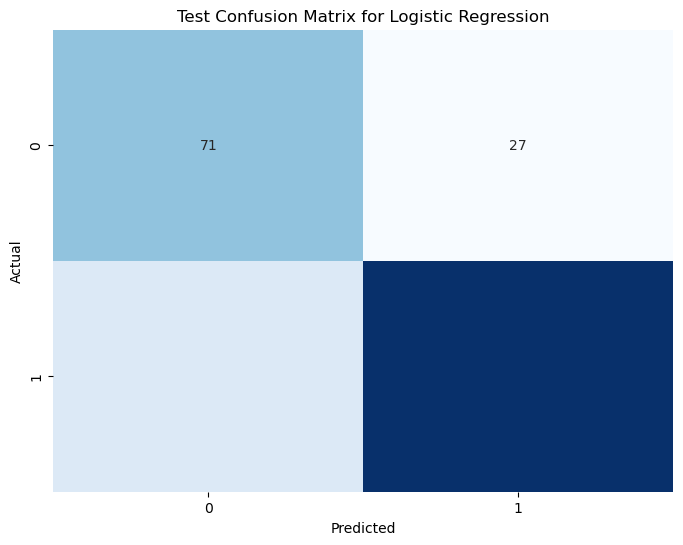



Running model: KNN with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7871
Test Accuracy: 0.5927


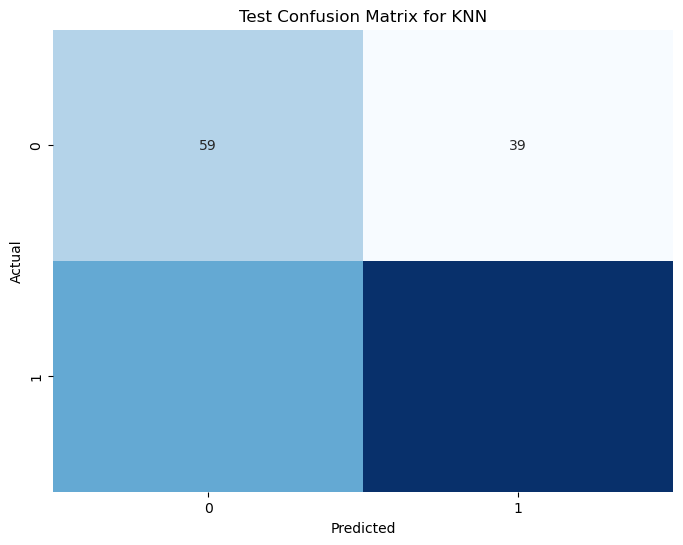



Running model: SVM (Linear) with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 1}
Training Accuracy: 0.7725
Test Accuracy: 0.7636


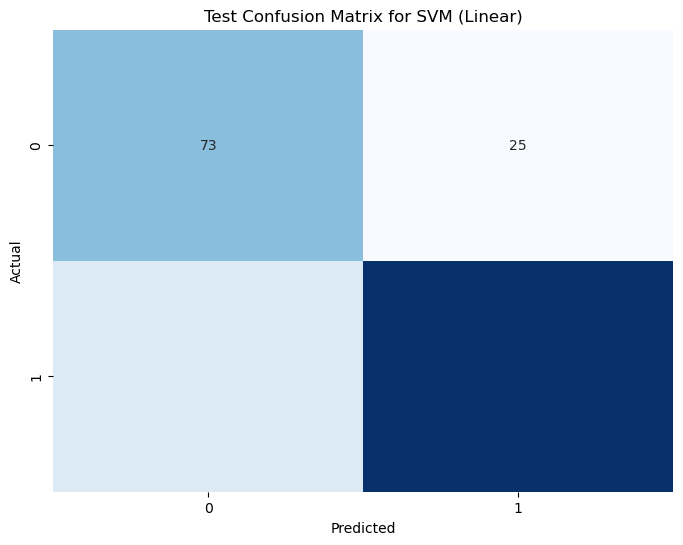



Running model: SVM (RBF) with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'gamma': 'scale'}
Training Accuracy: 0.9440
Test Accuracy: 0.6836


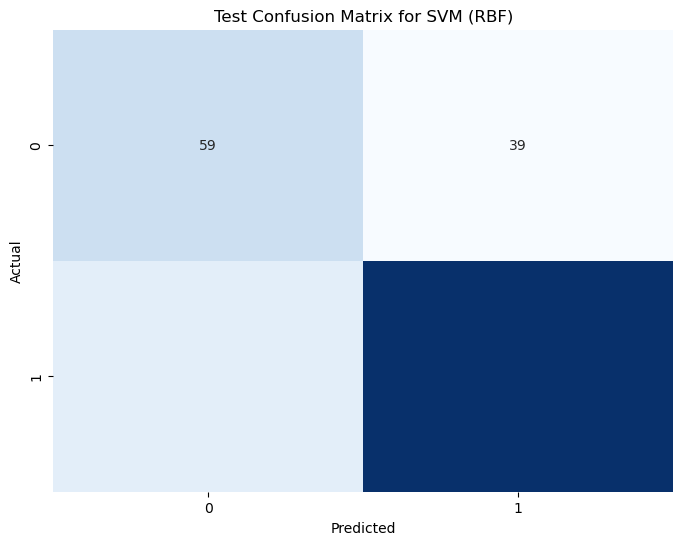



Running model: SVM (Poly) with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale'}
Training Accuracy: 0.9513
Test Accuracy: 0.6764


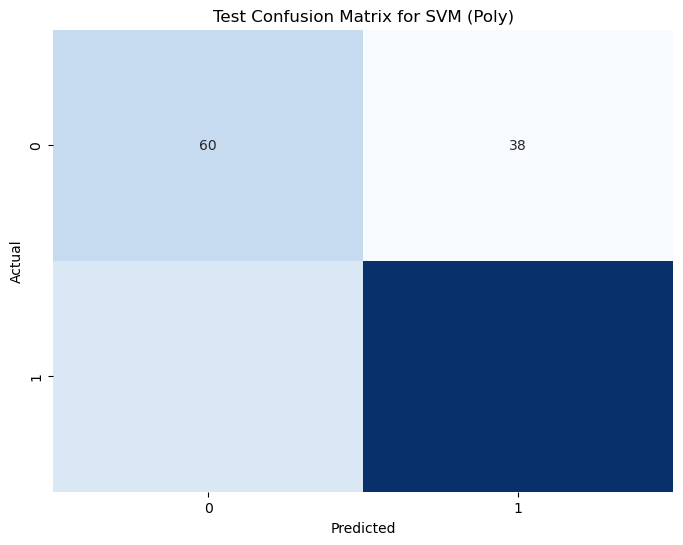



Running model: Random Forest with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8182


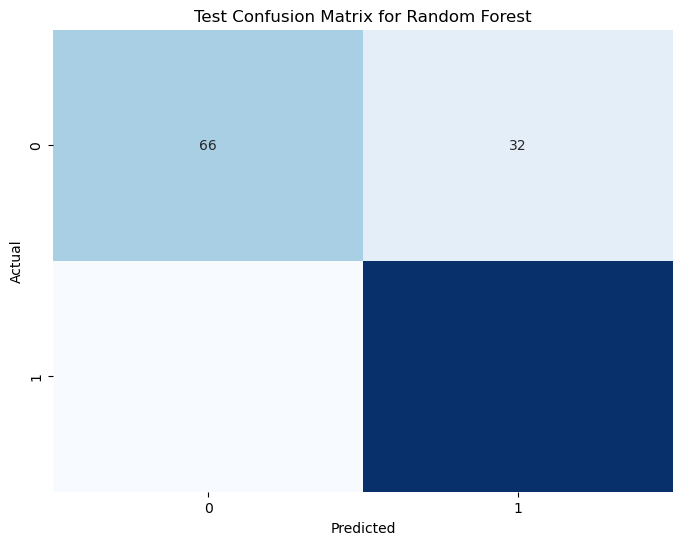



Running model: Decision Tree with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Training Accuracy: 1.0000
Test Accuracy: 0.7018


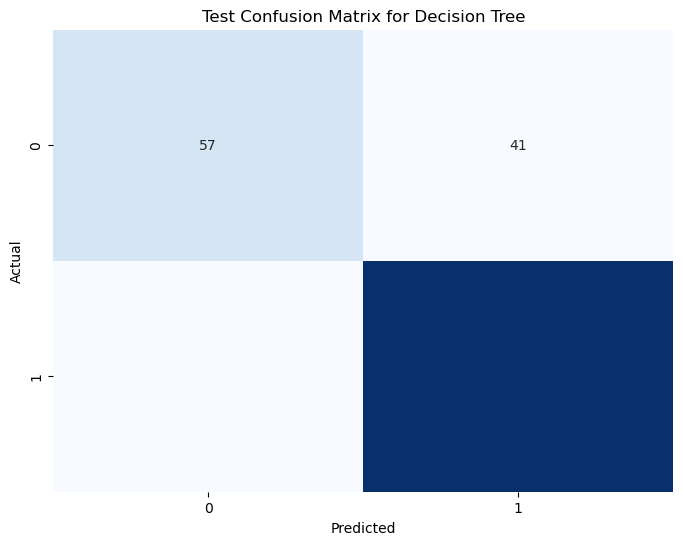



Running model: XGBoost with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8145


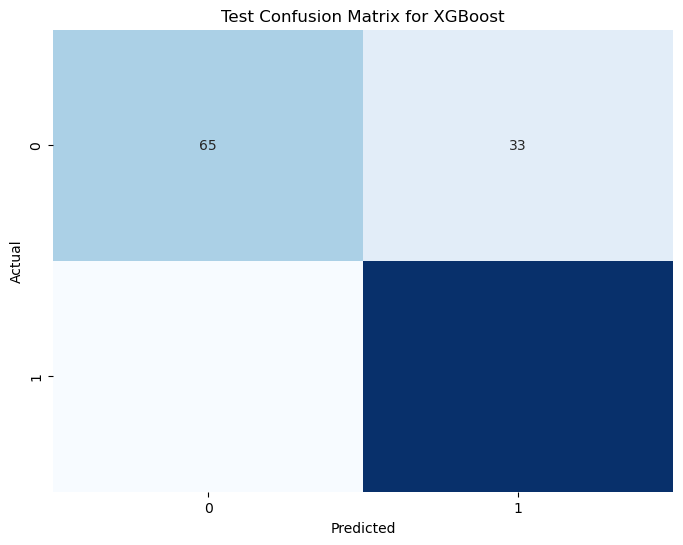



Running model: AdaBoost with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Training Accuracy: 0.8017
Test Accuracy: 0.7964


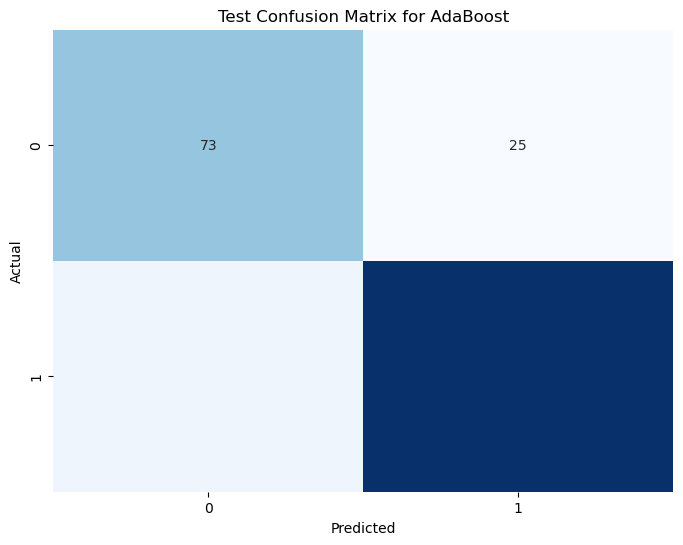



Running model: Gradient Boosting with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.7964


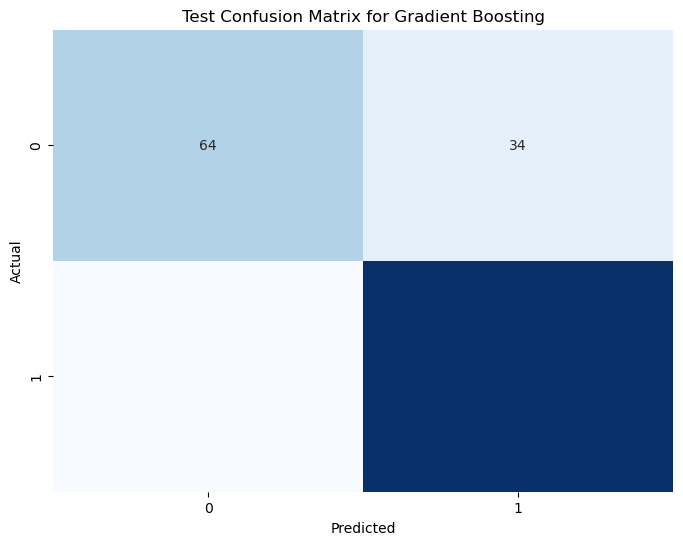



Running model: Logistic Regression with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7883
Test Accuracy: 0.7491


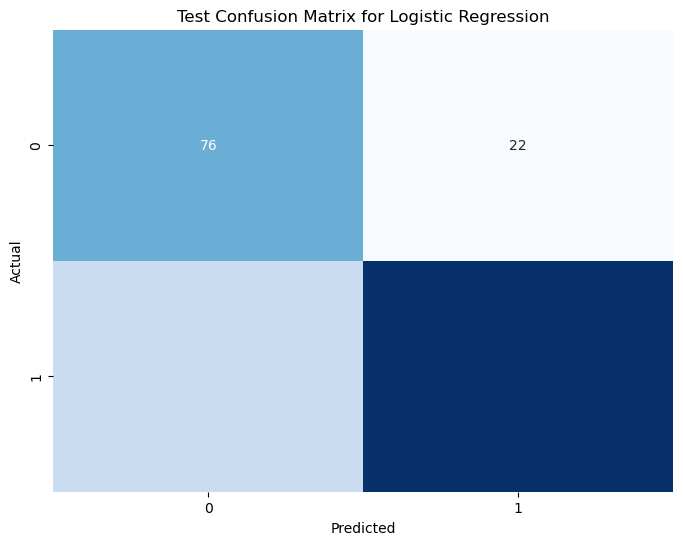



Running model: KNN with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.8127
Test Accuracy: 0.6109


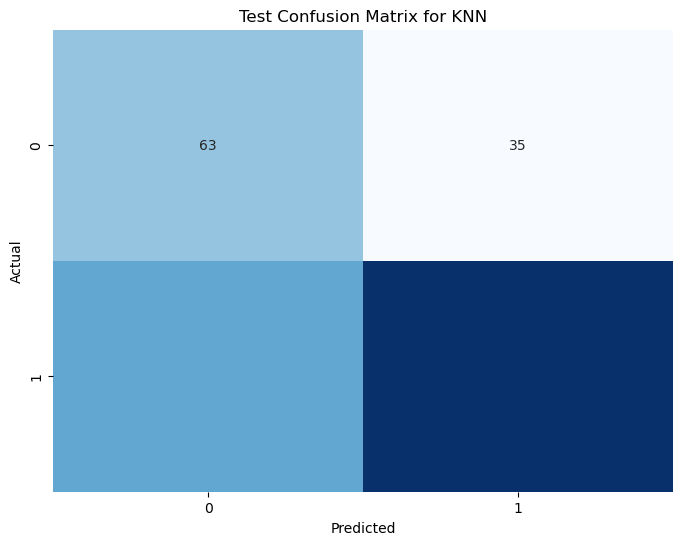



Running model: SVM (Linear) with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 1}
Training Accuracy: 0.7859
Test Accuracy: 0.7455


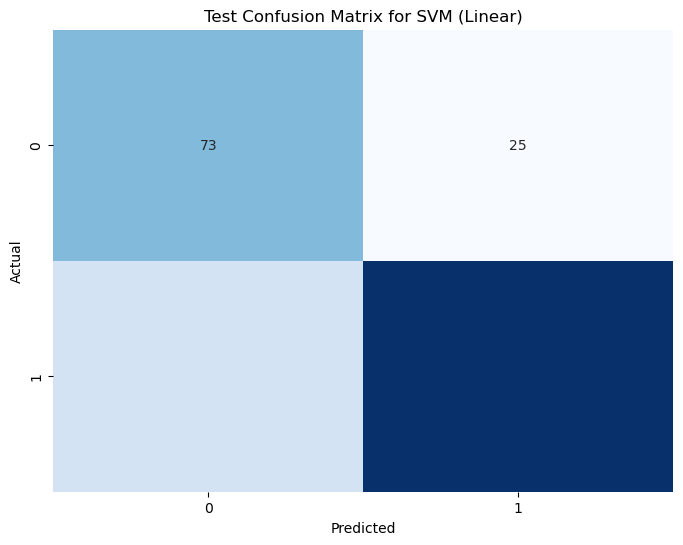



Running model: SVM (RBF) with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'gamma': 'scale'}
Training Accuracy: 0.9769
Test Accuracy: 0.7418


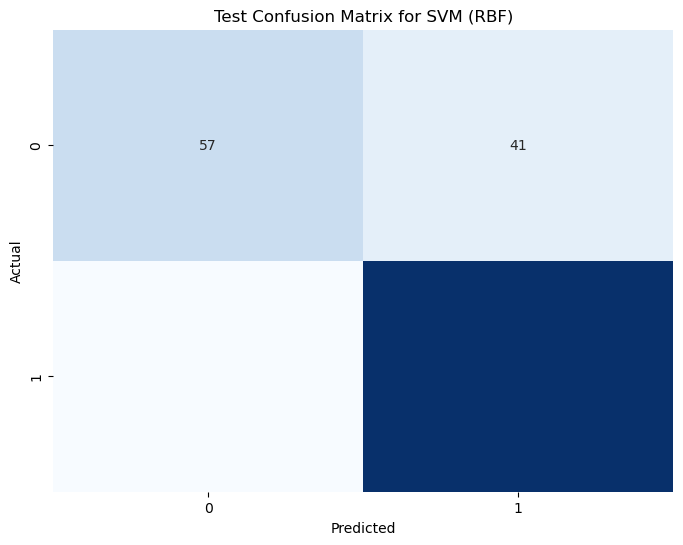



Running model: SVM (Poly) with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'auto'}
Training Accuracy: 0.9757
Test Accuracy: 0.7127


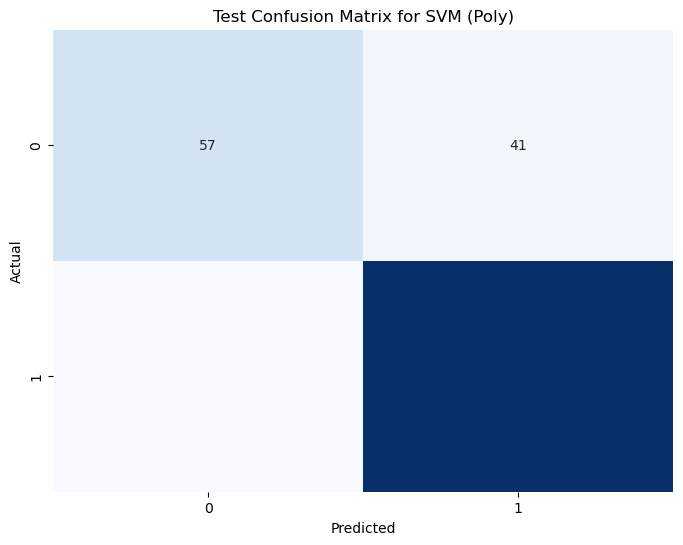



Running model: Random Forest with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.8364


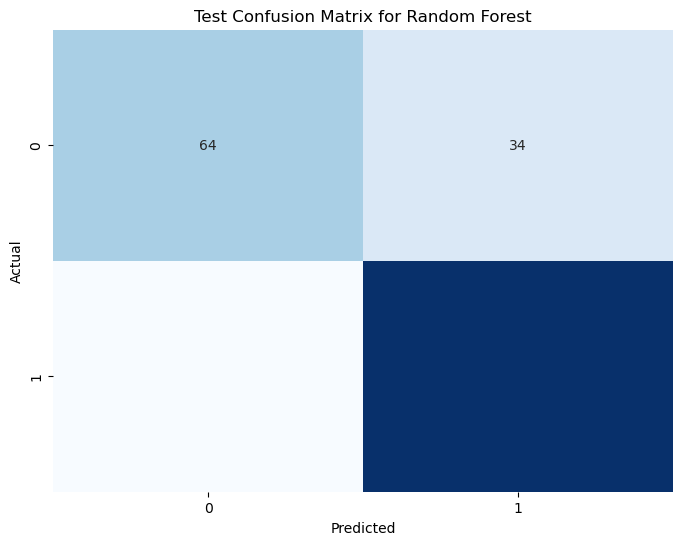



Running model: Decision Tree with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Training Accuracy: 0.9623
Test Accuracy: 0.6945


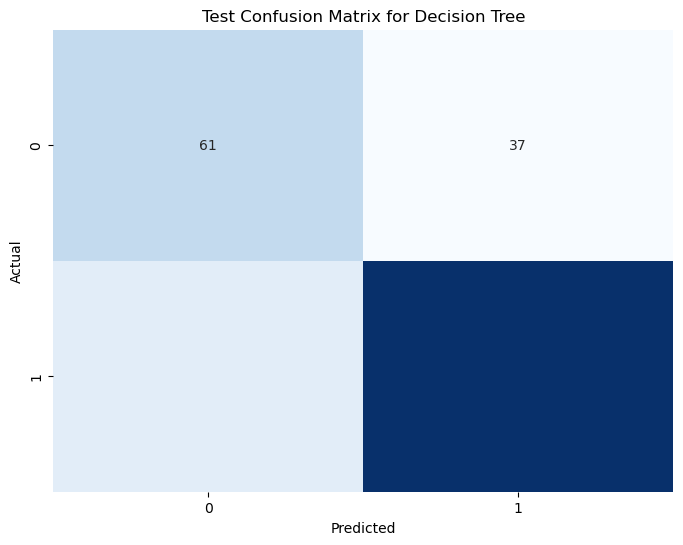



Running model: XGBoost with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8218


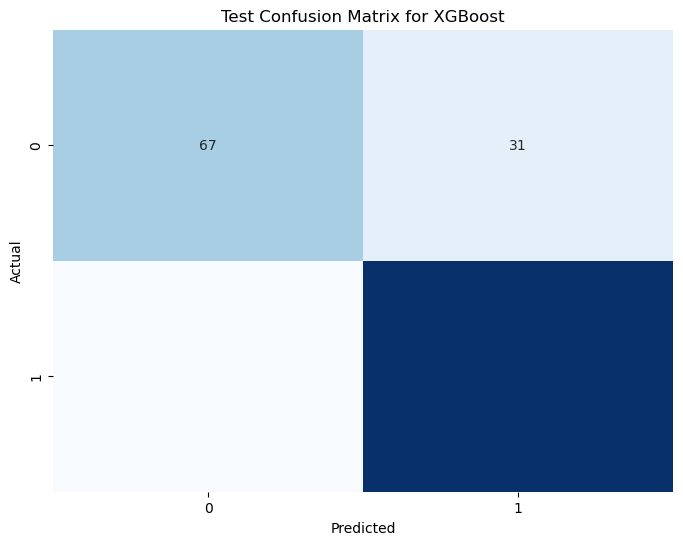



Running model: AdaBoost with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Training Accuracy: 0.8090
Test Accuracy: 0.8000


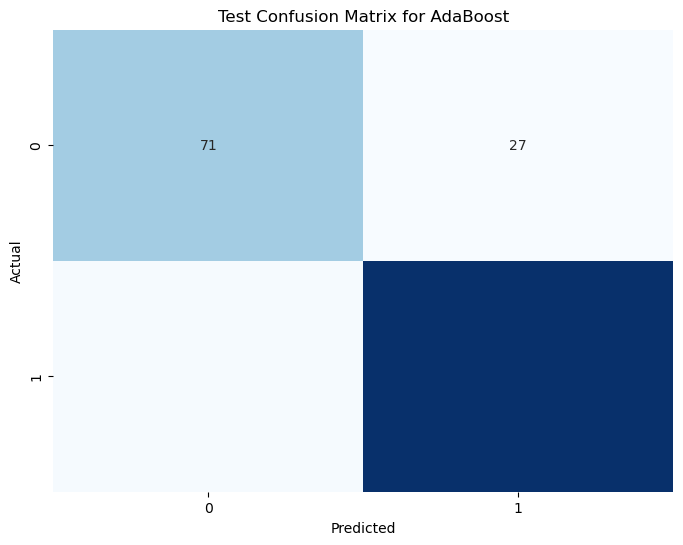



Running model: Gradient Boosting with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.8036


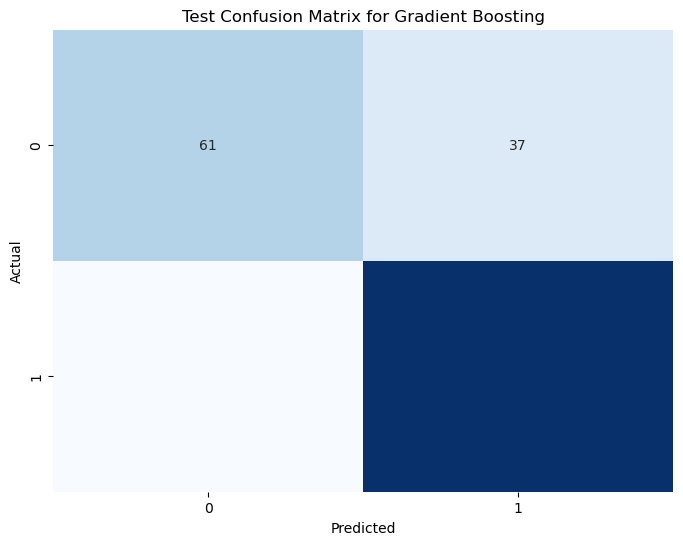



Running model: Logistic Regression with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7713
Test Accuracy: 0.7527


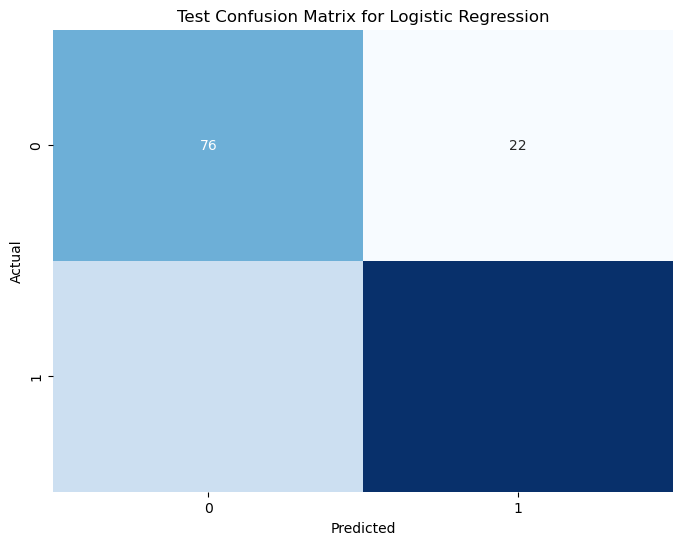



Running model: KNN with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.8187
Test Accuracy: 0.6691


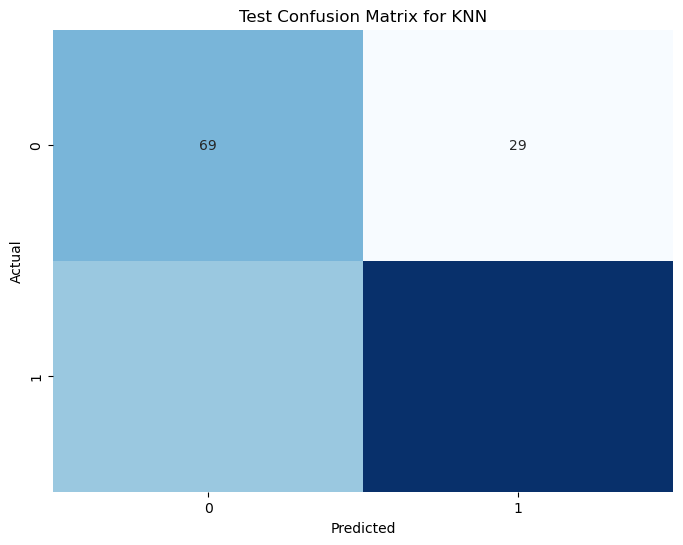



Running model: SVM (Linear) with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10}
Training Accuracy: 0.7786
Test Accuracy: 0.7527


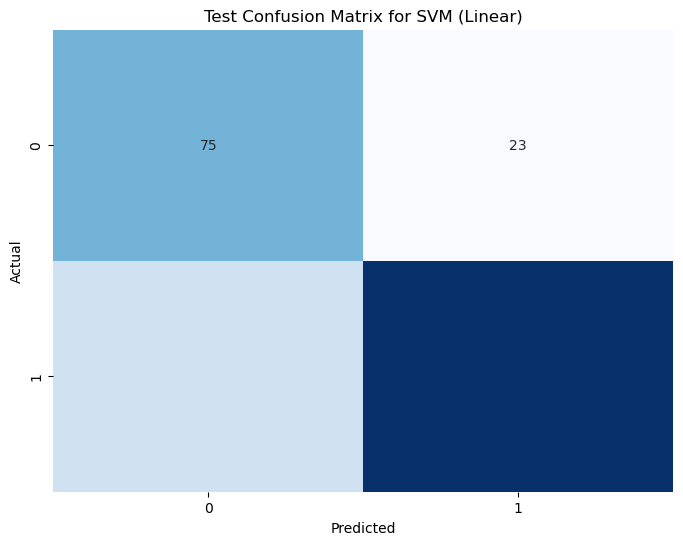



Running model: SVM (RBF) with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'gamma': 'scale'}
Training Accuracy: 0.8163
Test Accuracy: 0.7527


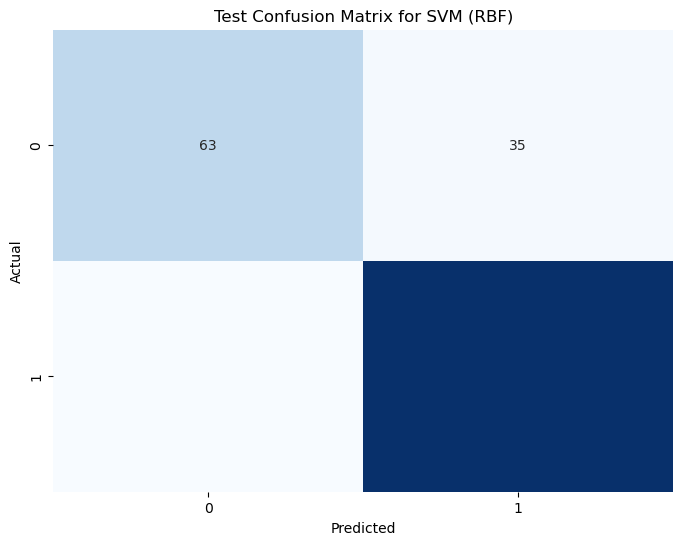



Running model: SVM (Poly) with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'auto'}
Training Accuracy: 0.8187
Test Accuracy: 0.7600


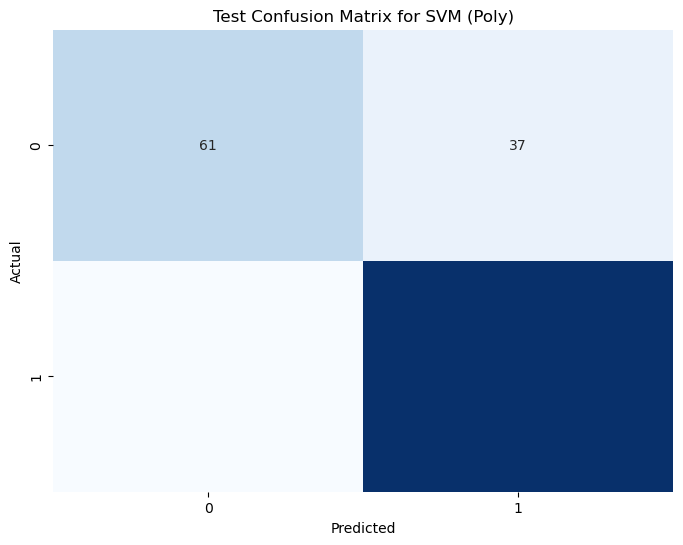



Running model: Random Forest with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Training Accuracy: 1.0000
Test Accuracy: 0.8073


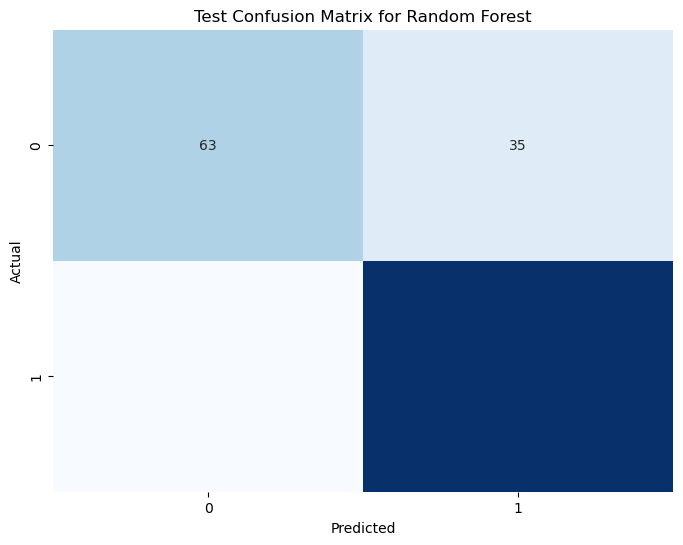



Running model: Decision Tree with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}
Training Accuracy: 1.0000
Test Accuracy: 0.7564


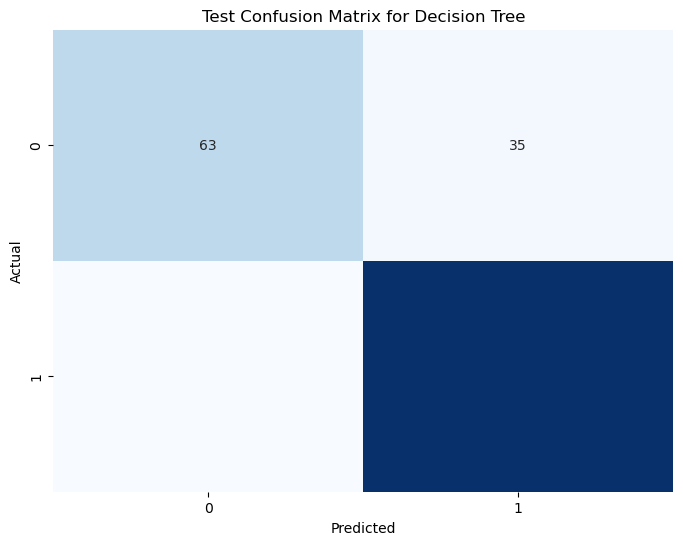



Running model: XGBoost with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8109


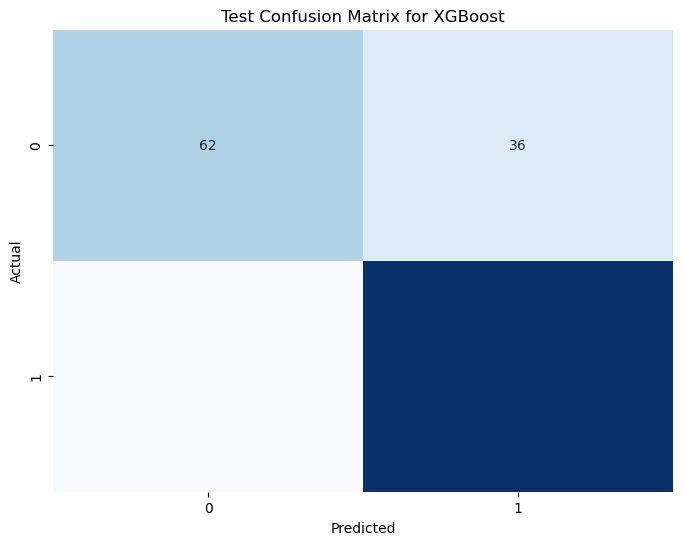



Running model: AdaBoost with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Training Accuracy: 0.8552
Test Accuracy: 0.7745


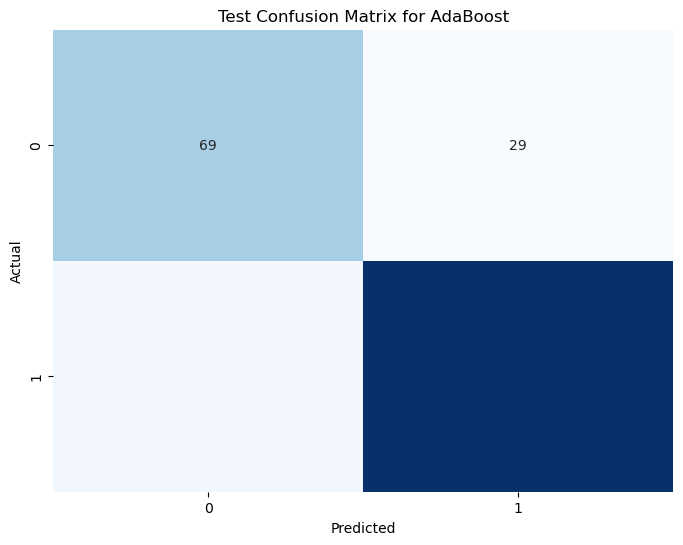



Running model: Gradient Boosting with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.8182


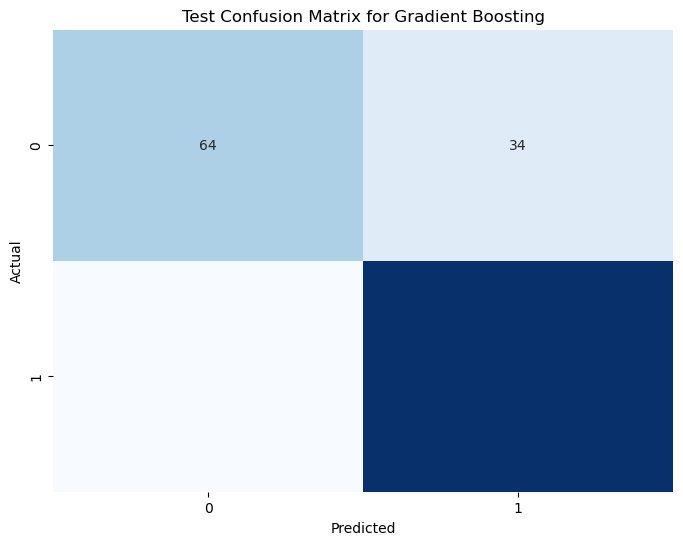

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    X_scaled = imputer.fit_transform(X_scaled)

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Fit and resample your training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    for model_name, model, param_grid in models:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyper Paramater Tunning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train_resampled, y_train_resampled, X_test, y_test)
        # Predict using best model
        y_train_pred = best_model.predict(X_train_resampled)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics(
            model_name,
            y_train_resampled, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

In [98]:
results_df

Model  Scaling Method  Train Accuracy  Test Accuracy  \
0   Logistic Regression    MinMaxScaler            0.78           0.75   
1                   KNN    MinMaxScaler            0.79           0.59   
2          SVM (Linear)    MinMaxScaler            0.77           0.76   
3             SVM (RBF)    MinMaxScaler            0.94           0.68   
4            SVM (Poly)    MinMaxScaler            0.95           0.68   
5         Random Forest    MinMaxScaler            1.00           0.82   
6         Decision Tree    MinMaxScaler            1.00           0.70   
7               XGBoost    MinMaxScaler            1.00           0.81   
8              AdaBoost    MinMaxScaler            0.80           0.80   
9     Gradient Boosting    MinMaxScaler            1.00           0.80   
10  Logistic Regression  StandardScaler            0.79           0.75   
11                  KNN  StandardScaler            0.81           0.61   
12         SVM (Linear)  StandardScaler            0.79           0.75   
13            SVM (RBF)  StandardScaler            0.98           0.74   
14           SVM (Poly)  StandardScaler            0.98           0.71   
15        Random Forest  StandardScaler            1.00           0.84   
16        Decision Tree  StandardScaler            0.96           0.69   
17              XGBoost  StandardScaler            1.00           0.82   
18             AdaBoost  StandardScaler            0.81           0.80   
19    Gradient Boosting  StandardScaler            1.00           0.80   
20  Logistic Regression    RobustScaler            0.77           0.75   
21                  KNN    RobustScaler            0.82           0.67   
22         SVM (Linear)    RobustScaler            0.78           0.75   
23            SVM (RBF)    RobustScaler            0.82           0.75   
24           SVM (Poly)    RobustScaler            0.82           0.76   
25        Random Forest    RobustScaler            1.00           0.81   
26        Decision Tree    RobustScaler            1.00           0.76   
27              XGBoost    RobustScaler            1.00           0.81   
28             AdaBoost    RobustScaler            0.86           0.77   
29    Gradient Boosting    RobustScaler            1.00           0.82   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.78            0.73          0.78         0.74   
1              0.79            0.59          0.79         0.59   
2              0.77            0.75          0.77         0.76   
3              0.94            0.66          0.94         0.67   
4              0.95            0.65          0.95         0.66   
5              1.00            0.81          1.00         0.79   
6              1.00            0.67          1.00         0.67   
7              1.00            0.81          1.00         0.78   
8              0.80            0.78          0.80         0.78   
9              1.00            0.78          1.00         0.76   
10             0.79            0.74          0.79         0.75   
11             0.82            0.61          0.81         0.62   
12             0.79            0.73          0.79         0.75   
13             0.98            0.72          0.98         0.71   
14             0.98            0.69          0.98         0.68   
15             1.00            0.84          1.00         0.80   
16             0.96            0.67          0.96         0.68   
17             1.00            0.81          1.00         0.79   
18             0.81            0.78          0.81         0.78   
19             1.00            0.80          1.00         0.76   
20             0.77            0.74          0.77         0.76   
21             0.83            0.66          0.82         0.68   
22             0.78            0.74          0.78         0.76   
23             0.82            0.73          0.82         0.73   
24             0.82            0.74          0.82         0.73   
25     

In [99]:
import pandas as pd
import plotly.express as px

# Creating a DataFrame with the performance metrics of the models
data = {
    'Model': [
        'Random Forest MinMaxScaler', 'Random Forest StandardScaler', 'Random Forest RobustScaler',
        'SVM (RBF) MinMaxScaler', 'SVM (RBF) StandardScaler', 'SVM (RBF) RobustScaler',
        'AdaBoost MinMaxScaler', 'AdaBoost StandardScaler', 'AdaBoost RobustScaler'
    ],
    'Scaling Method': [
        'MinMaxScaler', 'StandardScaler', 'RobustScaler',
        'MinMaxScaler', 'StandardScaler', 'RobustScaler',
        'MinMaxScaler', 'StandardScaler', 'RobustScaler'
    ],
    'Train Accuracy': [1.00, 1.00, 1.00, 0.94, 0.98, 0.99, 0.80, 0.81, 0.86],
    'Test Accuracy': [0.82, 0.83, 0.84, 0.68, 0.74, 0.75, 0.80, 0.80, 0.77],
    'Train Precision': [1.00, 1.00, 1.00, 0.94, 0.98, 0.99, 0.80, 0.81, 0.86],
    'Test Precision': [0.81, 0.82, 0.83, 0.66, 0.72, 0.73, 0.78, 0.79, 0.75],
    'Train Recall': [1.00, 1.00, 1.00, 0.94, 0.98, 0.99, 0.80, 0.81, 0.86],
    'Test Recall': [0.79, 0.79, 0.80, 0.67, 0.71, 0.73, 0.78, 0.78, 0.76],
    'Train F1-Score': [1.00, 1.00, 1.00, 0.94, 0.98, 0.99, 0.80, 0.81, 0.86],
    'Test F1-Score': [0.80, 0.80, 0.82, 0.66, 0.71, 0.74, 0.78, 0.78, 0.76]
}

df = pd.DataFrame(data)

# Creating a bar plot to compare Test Accuracy, Precision, Recall, and F1-Score
fig = px.bar(df, x='Model', y=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
             title='Comparison of Models',
             labels={'value': 'Score', 'variable': 'Metric'},
             barmode='group', text='value')

fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Score',
    legend_title='Metric',
    title_x=0.5,
    title_y=0.95
)

fig.show()

In [100]:
accuracy_scores = [0.80, 0.80, 0.82, 0.77]
model_names = ['AdaBoost MinMaxScaler', 'AdaBoost MinMaxScaler', 'SVM (Poly) RobustScaler', 'SVM (Poly) RobustScaler']
dataset_type = ['Train', 'Test', 'Train', 'Test']
vis = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Dataset Type': dataset_type})
fig = px.bar(vis, x='Model', y='Accuracy', color='Dataset Type', barmode='group', text='Accuracy')
fig.show()

### DATA 4 -> Handling Outliers with Box-Cox, then SMOTE

In [101]:
columns = [
    'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year',
    'age_last_milestone_year', 'relationships', 'funding_rounds',
    'funding_total_usd', 'milestones', 'avg_participants', 'founded_year'
]

In [102]:
from scipy.stats import boxcox
for col in columns:
    data4[col] = data4[col].apply(lambda x: x + 1 if x <= 0 else x)
    data4[col], _ = boxcox(data4[col])

data4.head()

c:\Users\anuli\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning:

overflow encountered in multiply

c:\Users\anuli\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning:

overflow encountered in reduce



age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                0.893401               1.376249                  1.735125   
1                1.994506               3.749843                  2.263512   
2                0.032494               0.032578                  0.387659   
3                1.310174               2.364039                  2.058555   
4                0.000000               0.567227                 -2.573566   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                 2.586859       1.142827        0.976761          39.298771   
1                 2.666397       2.378860        1.196116          86.275840   
2                 0.895577       1.705508        0.000000          54.871615   
3                 2.391674       1.705508        0.976761          86.240869   
4                -2.057435       0.710577        0.643236          48.768219   

   milestones  has_VC  has_angel  ...  category_public_relations  \
0    0.875141       0          1  ...                      False   
1    0.000000       1          0  ...                      False   
2    0.599197       0          0  ...                      False   
3    0.000000       0          0  ...                      False   
4    0.000000       1          1  ...                      False   

   category_semiconductor  category_software  category_web  \
0                   False              False         False   
1                   False              False         False   
2                   False              False          True   
3                   False               True         False   
4                   False              False         False   

   City_Mountain View  City_New York  City_Palo Alto  City_San Francisco  \
0               False          False           False               False   
1               False          False           False               False   
2               False          False           False               False   
3               False          False           False               False   
4               False          False           False                True   

   City_Santa Clara  City_other  
0             False        True  
1             False        True  
2             False        True  
3             False        True  
4             False       False  

[5 rows x 47 columns]

In [103]:
from sklearn.model_selection import train_test_split
X = data4.drop('status', axis=1)
y = data4['status']

In [104]:
scalers = [
    MinMaxScaler(),
    StandardScaler(),
    RobustScaler()
]

In [105]:
!pip install xgboost
import xgboost as xgb # Import the xgboost library

In [106]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {}),
    ('KNN', KNeighborsClassifier(), {}),
    ('SVM (Linear)', SVC(kernel='linear'), {
        'C': [0.1, 1, 10]
    }),
    ('SVM (RBF)', SVC(kernel='rbf'), {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }),
    ('SVM (Poly)', SVC(kernel='poly'), {
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }),
    ('AdaBoost', AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
]

In [107]:
def summarize_metrics(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    # Determine the name of the scaler
    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')


    # Generating classification reports
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])

    # Append to existing DataFrame or return new DataFrame
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df


In [108]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    This function takes a model and a parameter grid, performs hyperparameter tuning using gridsearch.
    and returns the best esimator
    """
    # Fitting the data with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ # Best model

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # ============== Evaluation ===============
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return best_model

In [109]:
results_df = None

Running model: Logistic Regression with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7895
Test Accuracy: 0.7600


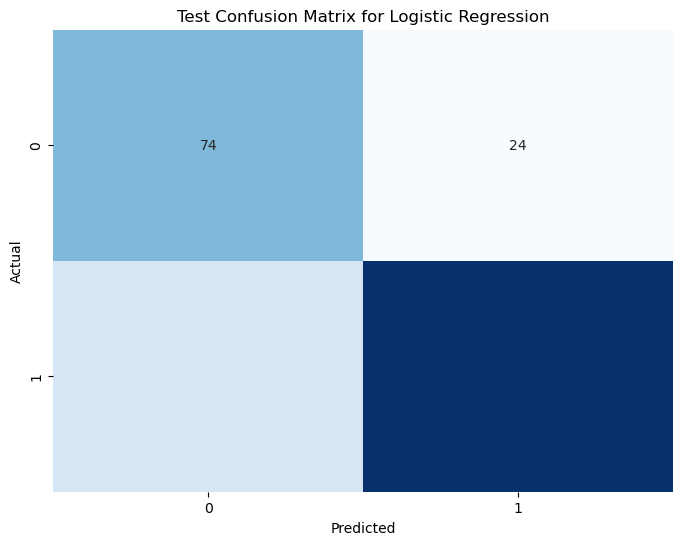



Running model: KNN with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.8127
Test Accuracy: 0.6327


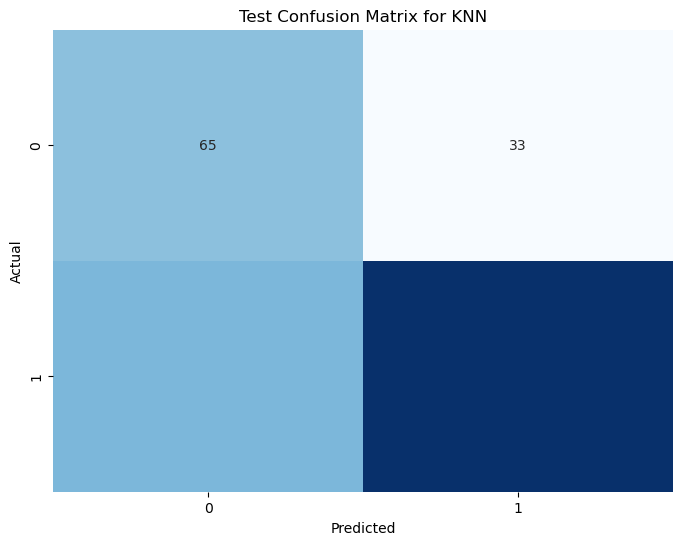



Running model: SVM (Linear) with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 0.1}
Training Accuracy: 0.7689
Test Accuracy: 0.7709


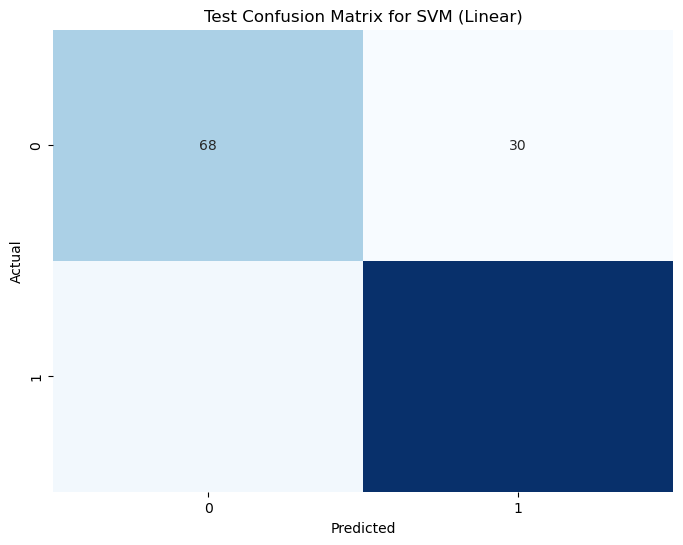



Running model: SVM (RBF) with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'gamma': 'scale'}
Training Accuracy: 0.9599
Test Accuracy: 0.7127


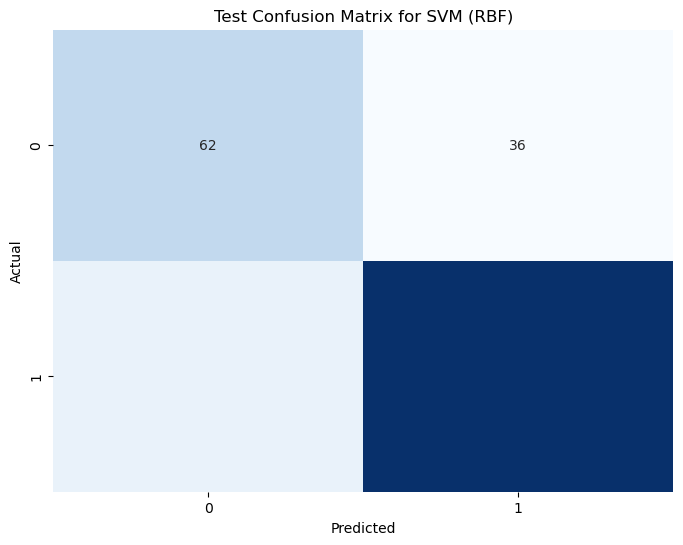



Running model: SVM (Poly) with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale'}
Training Accuracy: 0.9708
Test Accuracy: 0.7018


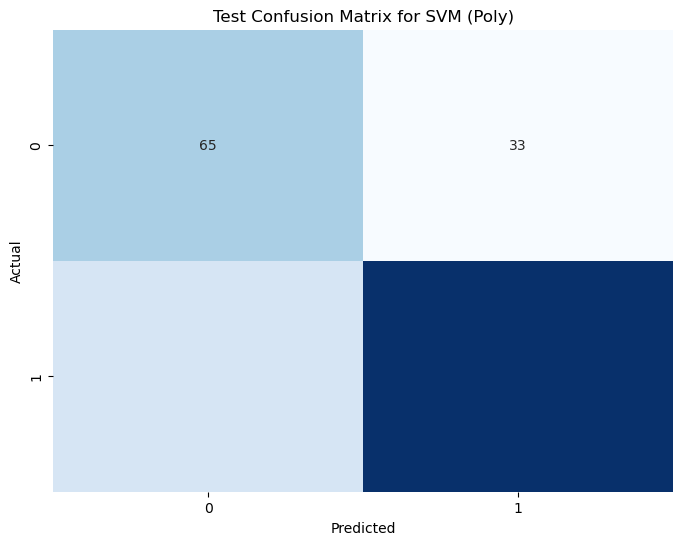



Running model: Random Forest with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.8436


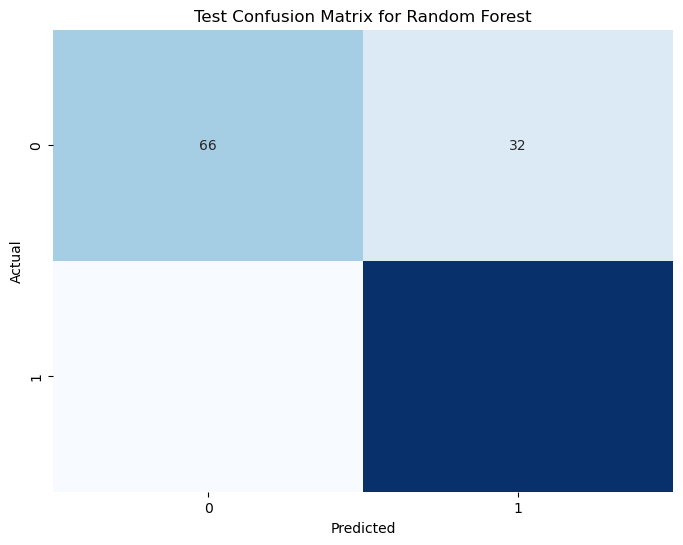



Running model: Decision Tree with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 5}
Training Accuracy: 0.9769
Test Accuracy: 0.7236


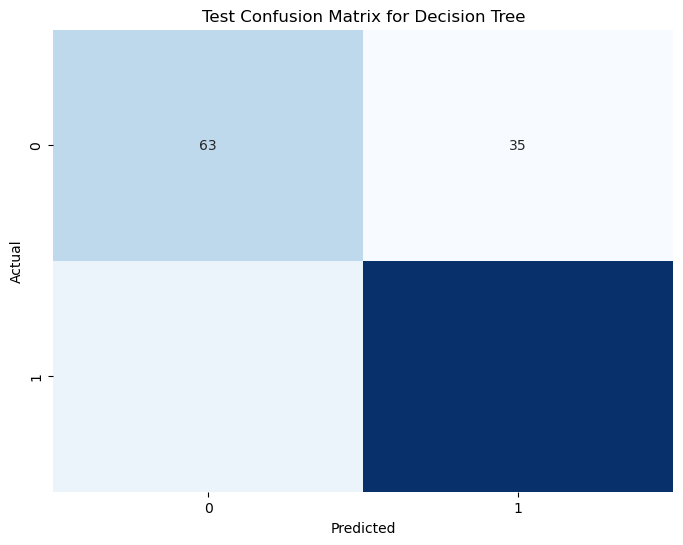



Running model: XGBoost with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 50}
Training Accuracy: 0.9964
Test Accuracy: 0.7709


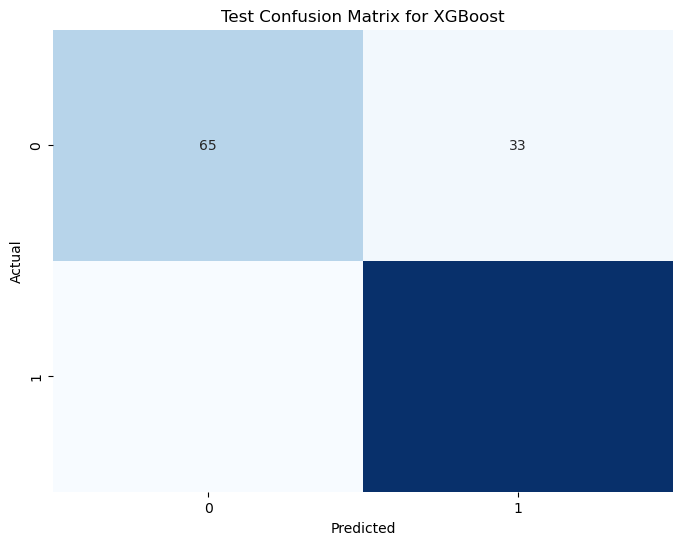



Running model: AdaBoost with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Training Accuracy: 0.8370
Test Accuracy: 0.7600


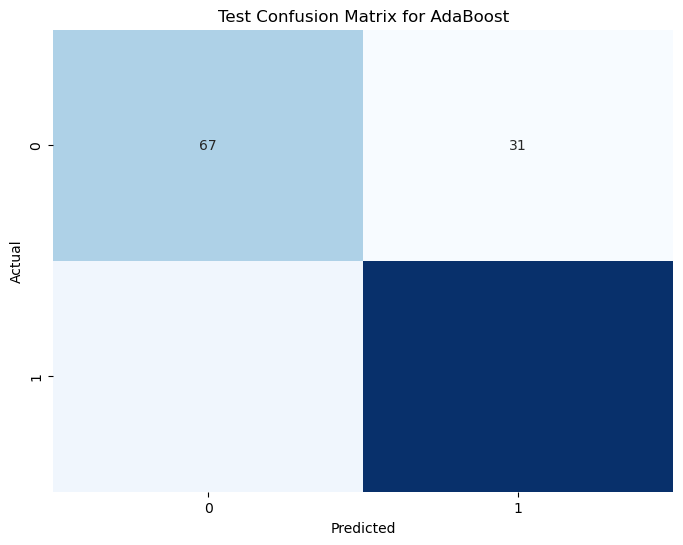



Running model: Gradient Boosting with MinMaxScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8291


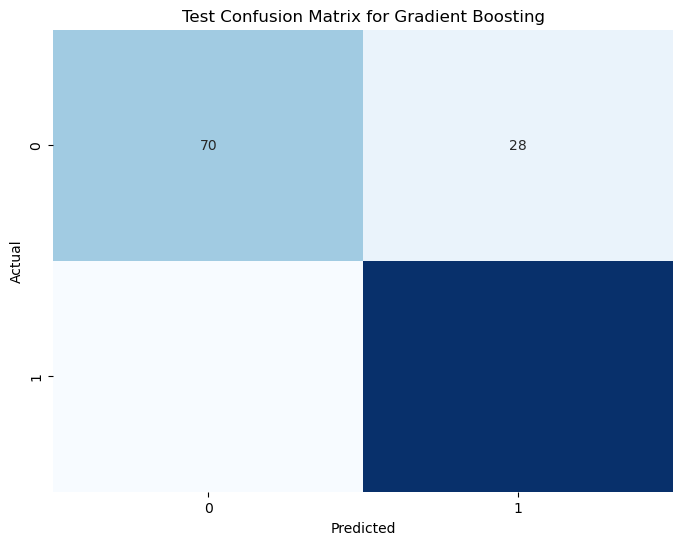



Running model: Logistic Regression with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7944
Test Accuracy: 0.7636


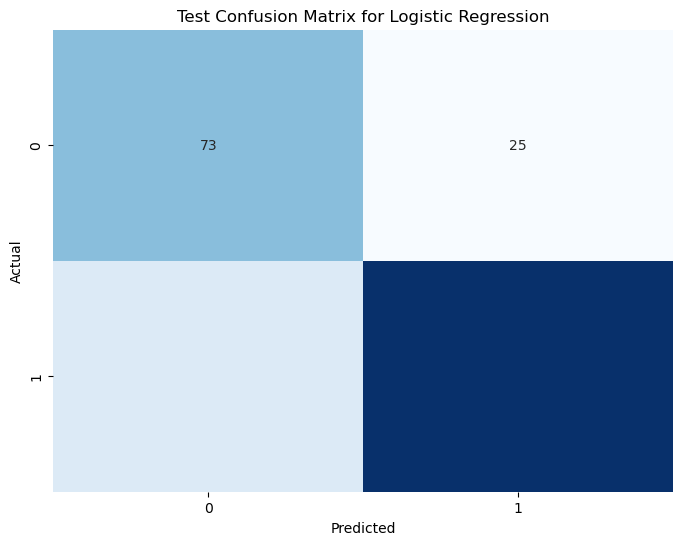



Running model: KNN with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7956
Test Accuracy: 0.6327


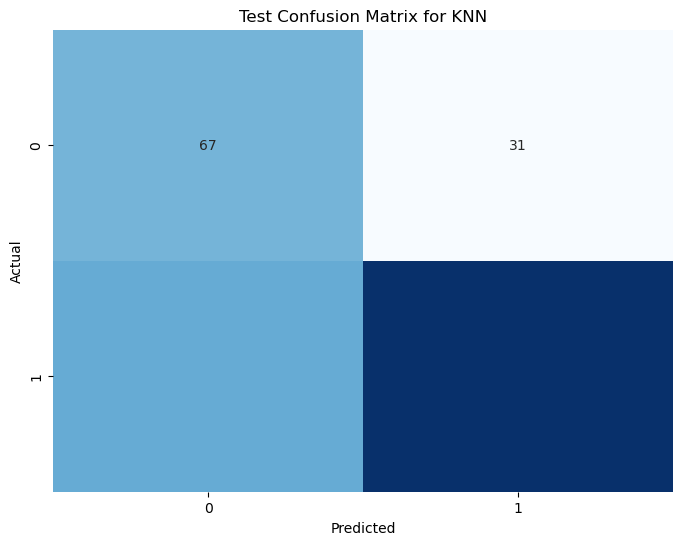



Running model: SVM (Linear) with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 1}
Training Accuracy: 0.7749
Test Accuracy: 0.7491


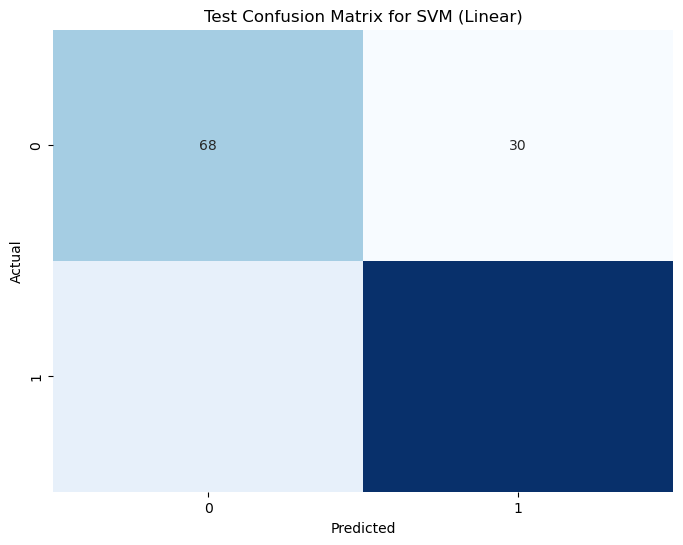



Running model: SVM (RBF) with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'gamma': 'scale'}
Training Accuracy: 0.9878
Test Accuracy: 0.7673


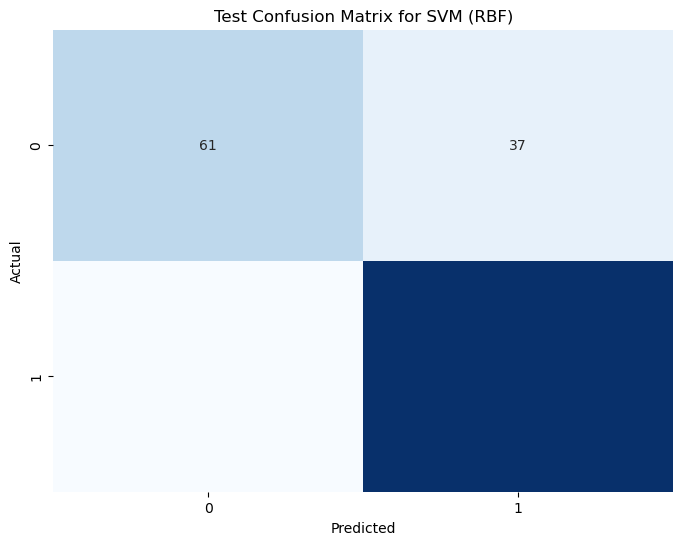



Running model: SVM (Poly) with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'degree': 4, 'gamma': 'auto'}
Training Accuracy: 0.9878
Test Accuracy: 0.7200


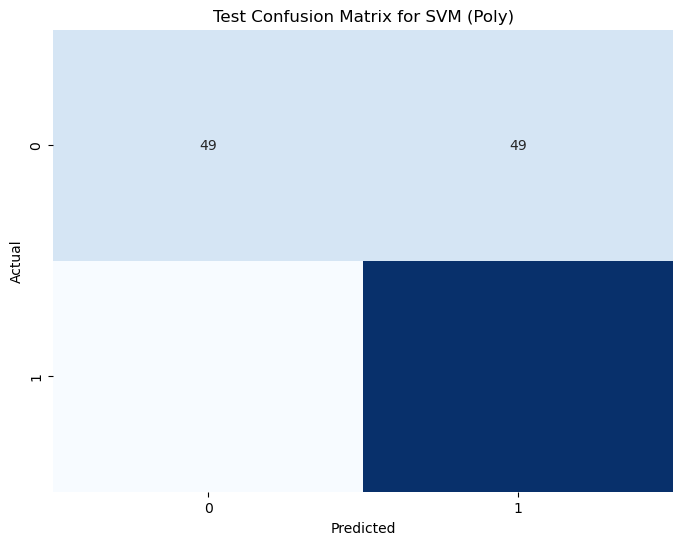



Running model: Random Forest with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8255


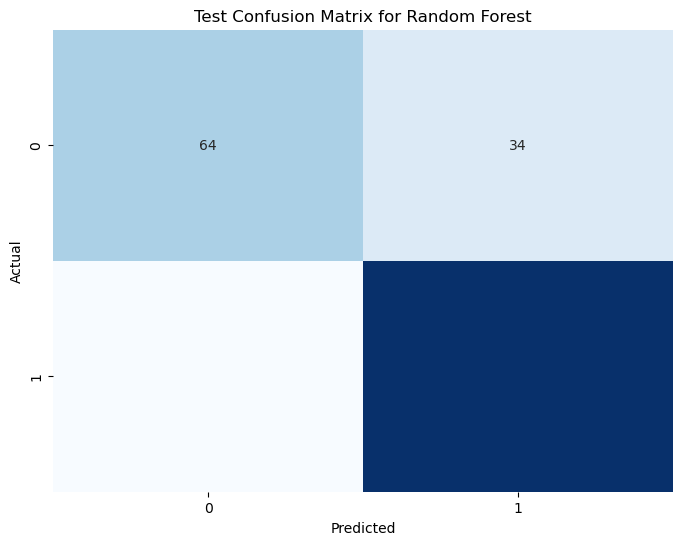



Running model: Decision Tree with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2}
Training Accuracy: 1.0000
Test Accuracy: 0.7236


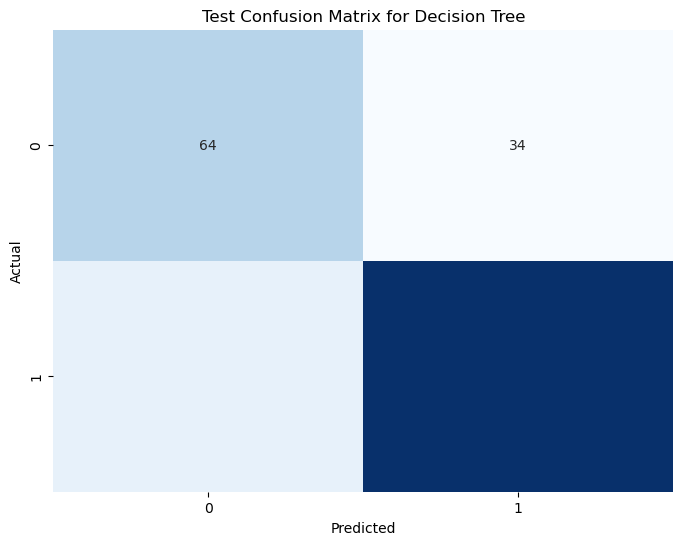



Running model: XGBoost with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8145


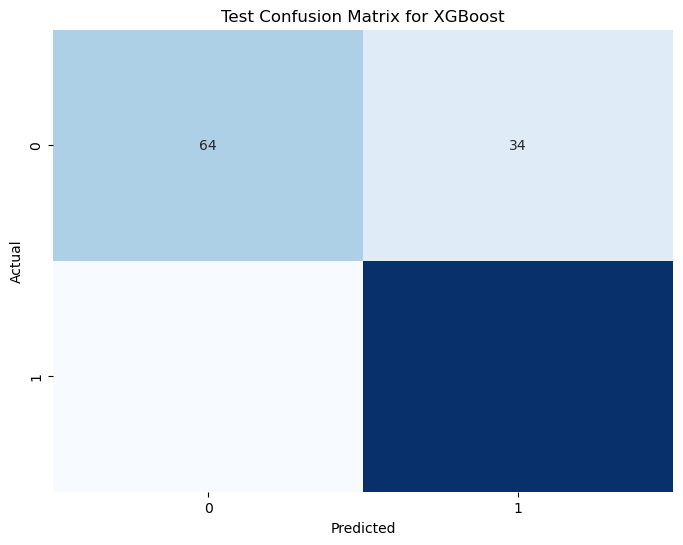



Running model: AdaBoost with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Training Accuracy: 0.8163
Test Accuracy: 0.8073


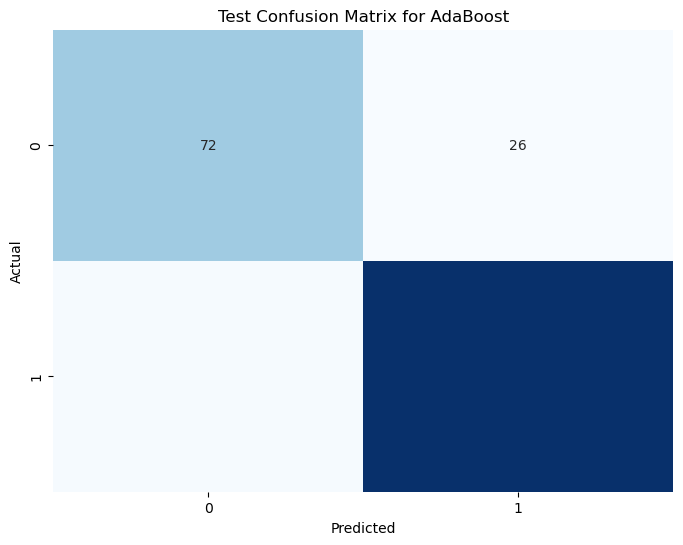



Running model: Gradient Boosting with StandardScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.8109


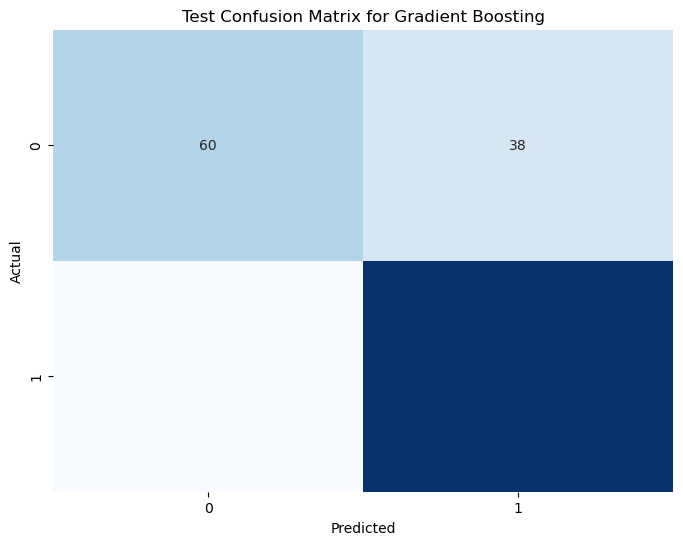



Running model: Logistic Regression with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7920
Test Accuracy: 0.7600


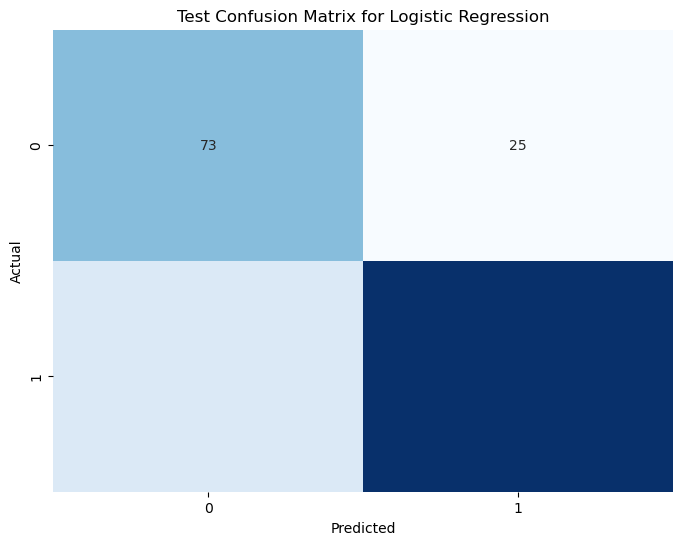



Running model: KNN with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.8358
Test Accuracy: 0.7127


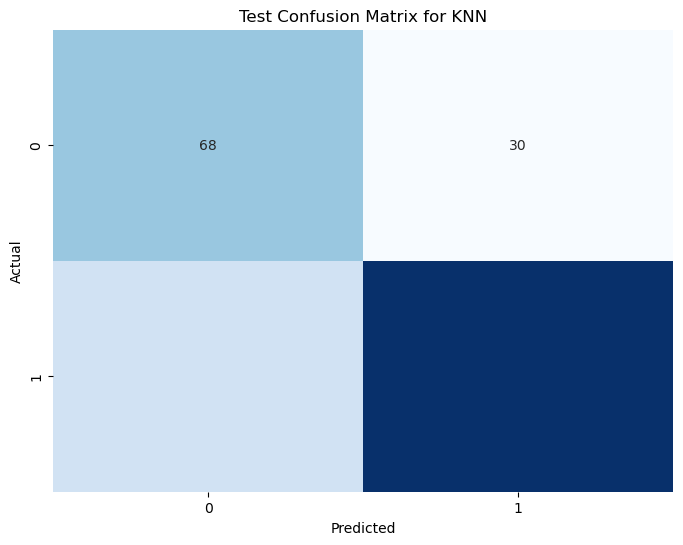



Running model: SVM (Linear) with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10}
Training Accuracy: 0.7810
Test Accuracy: 0.7673


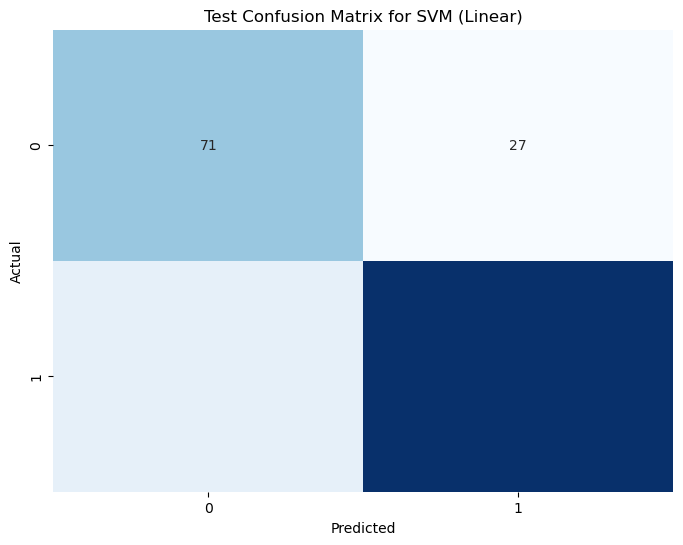



Running model: SVM (RBF) with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'gamma': 'scale'}
Training Accuracy: 0.9866
Test Accuracy: 0.7636


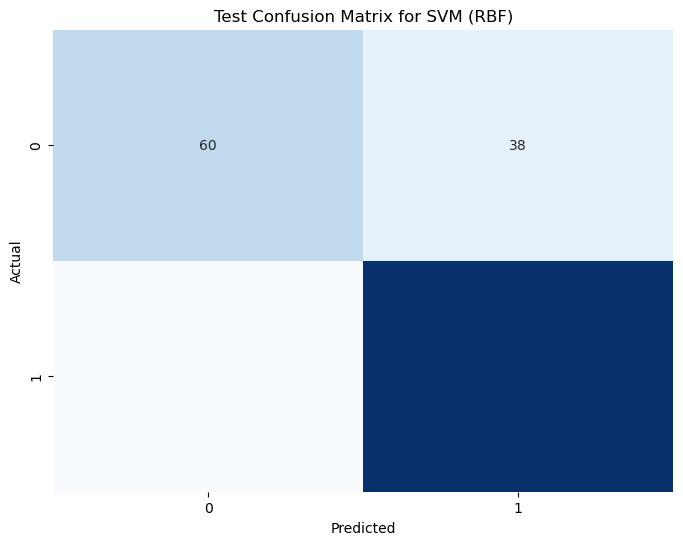



Running model: SVM (Poly) with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'C': 10, 'degree': 4, 'gamma': 'scale'}
Training Accuracy: 0.9964
Test Accuracy: 0.7527


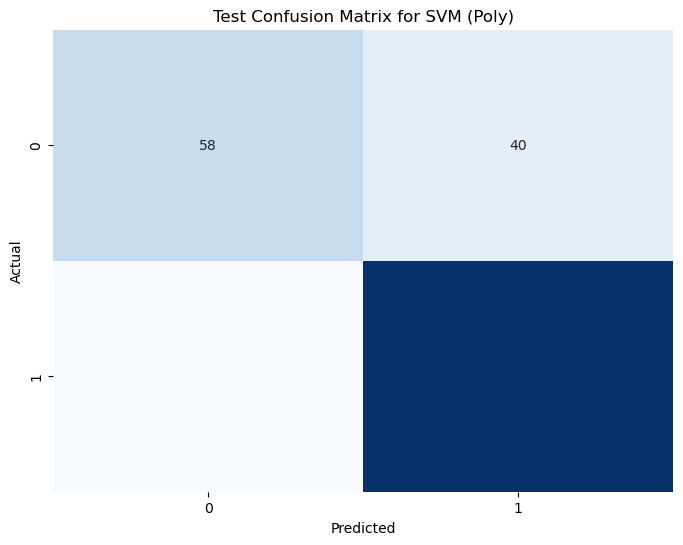



Running model: Random Forest with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 1.0000
Test Accuracy: 0.8145


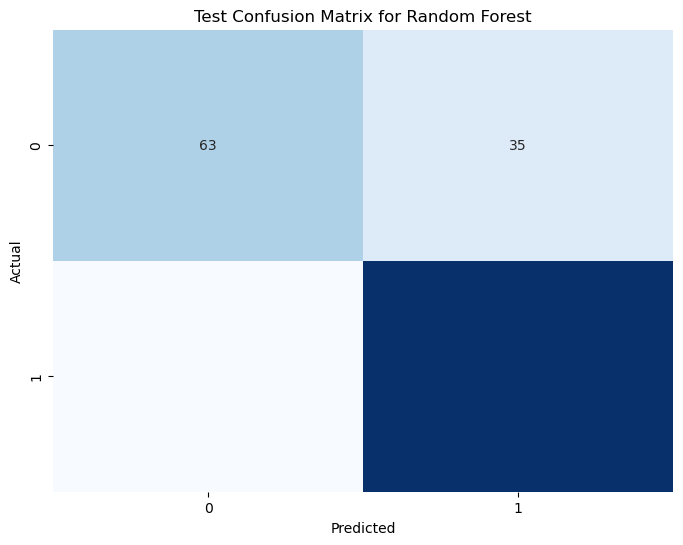



Running model: Decision Tree with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Training Accuracy: 1.0000
Test Accuracy: 0.7236


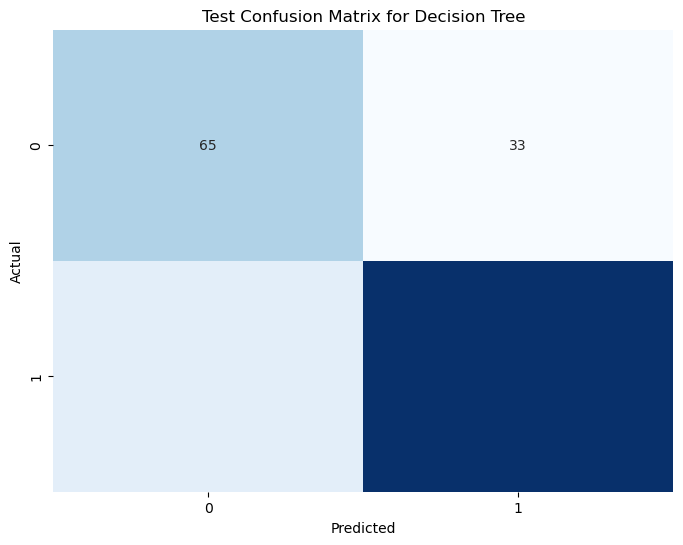



Running model: XGBoost with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Training Accuracy: 0.9988
Test Accuracy: 0.8036


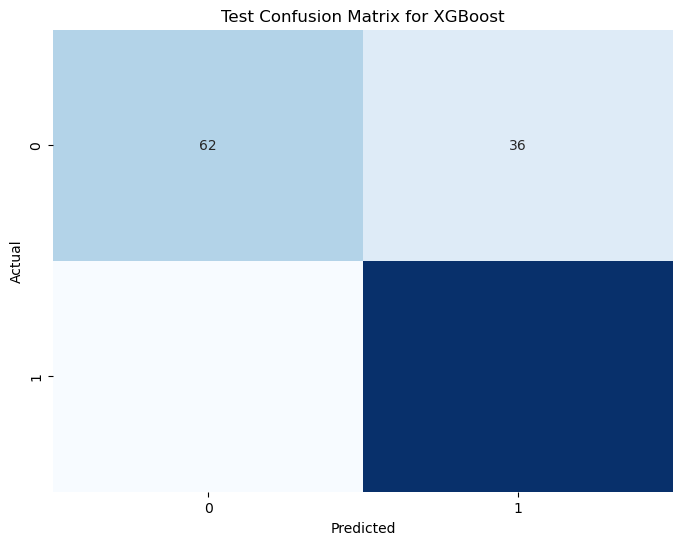



Running model: AdaBoost with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Training Accuracy: 0.8163
Test Accuracy: 0.7855


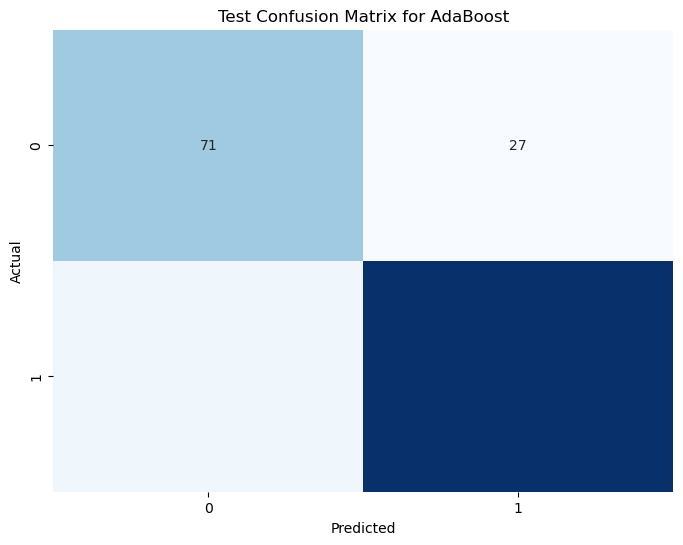



Running model: Gradient Boosting with RobustScaler
Values for class status
1    411
0    411
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.8073


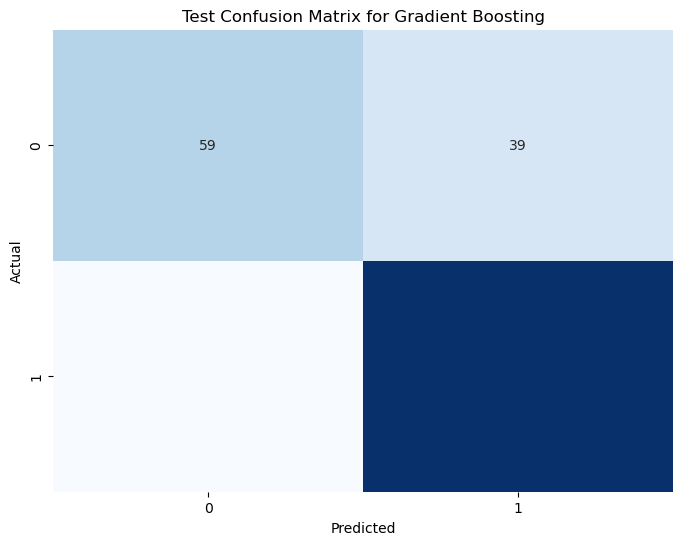

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    # ========= scaling ==========
    X_scaled = scaler.fit_transform(X)
    X_scaled = imputer.fit_transform(X_scaled)

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Fit and resample your training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    for model_name, model, param_grid in models:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyper Paramater Tunning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train_resampled, y_train_resampled, X_test, y_test)
        # Predict using best model
        y_train_pred = best_model.predict(X_train_resampled)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics(
            model_name,
            y_train_resampled, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

In [111]:
results_df

Model  Scaling Method  Train Accuracy  Test Accuracy  \
0   Logistic Regression    MinMaxScaler            0.79           0.76   
1                   KNN    MinMaxScaler            0.81           0.63   
2          SVM (Linear)    MinMaxScaler            0.77           0.77   
3             SVM (RBF)    MinMaxScaler            0.96           0.71   
4            SVM (Poly)    MinMaxScaler            0.97           0.70   
5         Random Forest    MinMaxScaler            1.00           0.84   
6         Decision Tree    MinMaxScaler            0.98           0.72   
7               XGBoost    MinMaxScaler            1.00           0.77   
8              AdaBoost    MinMaxScaler            0.84           0.76   
9     Gradient Boosting    MinMaxScaler            1.00           0.83   
10  Logistic Regression  StandardScaler            0.79           0.76   
11                  KNN  StandardScaler            0.80           0.63   
12         SVM (Linear)  StandardScaler            0.77           0.75   
13            SVM (RBF)  StandardScaler            0.99           0.77   
14           SVM (Poly)  StandardScaler            0.99           0.72   
15        Random Forest  StandardScaler            1.00           0.83   
16        Decision Tree  StandardScaler            1.00           0.72   
17              XGBoost  StandardScaler            1.00           0.81   
18             AdaBoost  StandardScaler            0.82           0.81   
19    Gradient Boosting  StandardScaler            1.00           0.81   
20  Logistic Regression    RobustScaler            0.79           0.76   
21                  KNN    RobustScaler            0.84           0.71   
22         SVM (Linear)    RobustScaler            0.78           0.77   
23            SVM (RBF)    RobustScaler            0.99           0.76   
24           SVM (Poly)    RobustScaler            1.00           0.75   
25        Random Forest    RobustScaler            1.00           0.81   
26        Decision Tree    RobustScaler            1.00           0.72   
27              XGBoost    RobustScaler            1.00           0.80   
28             AdaBoost    RobustScaler            0.82           0.79   
29    Gradient Boosting    RobustScaler            1.00           0.81   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.79            0.74          0.79         0.76   
1              0.82            0.63          0.81         0.64   
2              0.77            0.75          0.77         0.75   
3              0.96            0.69          0.96         0.69   
4              0.97            0.68          0.97         0.69   
5              1.00            0.85          1.00         0.81   
6              0.98            0.70          0.98         0.71   
7              1.00            0.75          1.00         0.75   
8              0.84            0.74          0.84         0.74   
9              1.00            0.82          1.00         0.80   
10             0.80            0.75          0.79         0.76   
11             0.80            0.63          0.80         0.64   
12             0.78            0.73          0.77         0.74   
13             0.99            0.75          0.99         0.73   
14             0.99            0.69          0.99         0.67   
15             1.00            0.82          1.00         0.79   
16             1.00            0.70          1.00         0.71   
17             1.00            0.81          1.00         0.78   
18             0.82            0.79          0.82         0.79   
19             1.00            0.81          1.00         0.77   
20             0.79            0.74          0.79         0.76   
21             0.84            0.70          0.84         0.71   
22             0.78            0.75          0.78         0.76   
23             0.99            0.74          0.99         0.73   
24             1.00            0.73          1.00         0.72   
25     

In [112]:
import pandas as pd
import plotly.express as px

# Update accuracy scores for Random Forest and AdaBoost
accuracy_scores = [
    1.00, 0.82,  # Random Forest MinMaxScaler (Train, Test)
    1.00, 0.83,  # Random Forest StandardScaler (Train, Test)
    1.00, 0.84,  # Random Forest RobustScaler (Train, Test)
    0.84, 0.76,  # AdaBoost MinMaxScaler (Train, Test)
    0.82, 0.81,  # AdaBoost StandardScaler (Train, Test)
    0.82, 0.79   # AdaBoost RobustScaler (Train, Test)
]

# Corresponding model names
model_names = [
    'Random Forest MinMaxScaler', 'Random Forest MinMaxScaler',
    'Random Forest StandardScaler', 'Random Forest StandardScaler',
    'Random Forest RobustScaler', 'Random Forest RobustScaler',
    'AdaBoost MinMaxScaler', 'AdaBoost MinMaxScaler',
    'AdaBoost StandardScaler', 'AdaBoost StandardScaler',
    'AdaBoost RobustScaler', 'AdaBoost RobustScaler'
]

# Dataset type (Train or Test)
dataset_type = [
    'Train', 'Test', 'Train', 'Test', 'Train', 'Test',
    'Train', 'Test', 'Train', 'Test', 'Train', 'Test'
]

# Create DataFrame for visualization
vis = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Dataset Type': dataset_type
})

# Create bar plot with customized colors
fig = px.bar(vis, x='Model', y='Accuracy', color='Dataset Type', 
             barmode='group', text='Accuracy',
             color_discrete_map={'Train': '#1f77b4', 'Test': '#ff7f0e'})  # Custom colors

# Show the plot
fig.show()

In [113]:
accuracy_scores = [0.79, 0.80, 0.82, 0.79]
model_names = ['AdaBoost StandardScaler', 'AdaBoost StandardScaler', 'AdaBoost RobustScaler', 'AdaBoost RobustScaler']
dataset_type = ['Train', 'Test', 'Train', 'Test']
vis = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Dataset Type': dataset_type})
fig = px.bar(vis, x='Model', y='Accuracy', color='Dataset Type', barmode='group', text='Accuracy')
fig.show()

### DATA 5 -> Log After Scalers

In [114]:
from sklearn.model_selection import train_test_split
X = data5.drop('status', axis=1)
y = data5['status']

In [115]:
scalers = [
    MinMaxScaler(),
    StandardScaler(),
    RobustScaler()
]

In [116]:
!pip install xgboost
import xgboost as xgb # Import the xgboost library

In [117]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {}),
    ('KNN', KNeighborsClassifier(), {}),
    ('SVM (Linear)', SVC(kernel='linear'), {
        'C': [0.1, 0.5, 1]
    }),
    ('SVM (RBF)', SVC(kernel='rbf'), {
        'C': [0.1, 0.5, 1],
        'gamma': ['scale', 'auto']
    }),
    ('SVM (Poly)', SVC(kernel='poly'), {
        'C': [0.1, 0.5, 1],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 80, 100],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }),
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 80, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }),
    ('AdaBoost', AdaBoostClassifier(), {
        'n_estimators': [50, 80, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': [50, 80, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
]

In [118]:
def summarize_metrics(model_name,y_train,t_test,y_train_predict,y_test_predict, existing_df=None):
    """
    This method is used to generate classification report for both train and test and generate a dataframe that summarizes different
    models metrics, it takes the precited values for each model and scaling method name, model name, and an existing dataframe to append
    different results
    """

    scaler_names = {
        'MinMaxScaler': 'MinMaxScaler',
        'StandardScaler': 'StandardScaler',
        'RobustScaler': 'RobustScaler',
    }

    # Determine the name of the scaler
    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')


    # Generating classification reports
    train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_df = pd.DataFrame([summary_dict])

    # Append to existing DataFrame or return new DataFrame
    if existing_df is not None:
        return pd.concat([existing_df, summary_df], ignore_index=True)
    else:
        return summary_df


In [119]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    This function takes a model and a parameter grid, performs hyperparameter tuning using gridsearch.
    and returns the best esimator
    """
    # Fitting the data with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ # Best model

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # ============== Evaluation ===============
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return best_model

In [120]:
results_df = None

Running model: Logistic Regression with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7825
Test Accuracy: 0.7564


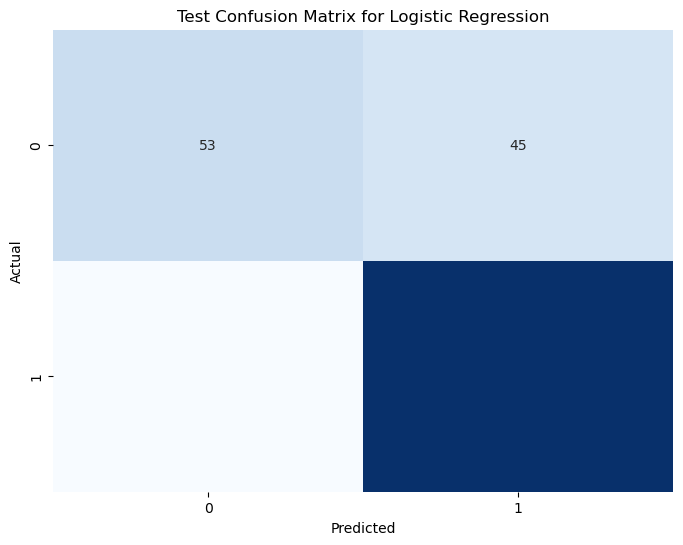



Running model: KNN with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7668
Test Accuracy: 0.6691


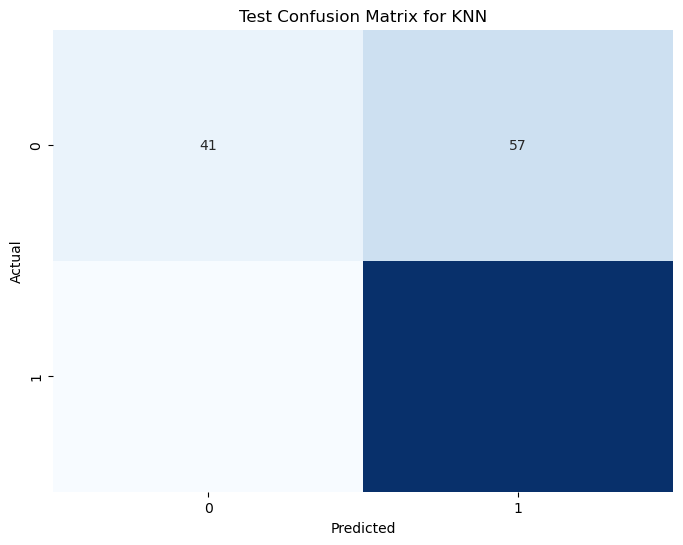



Running model: SVM (Linear) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 0.5}
Training Accuracy: 0.7809
Test Accuracy: 0.7491


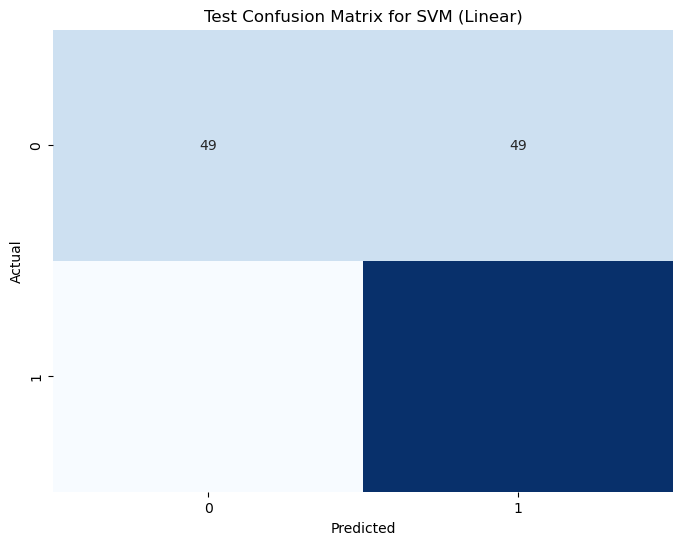



Running model: SVM (RBF) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.7950
Test Accuracy: 0.7418


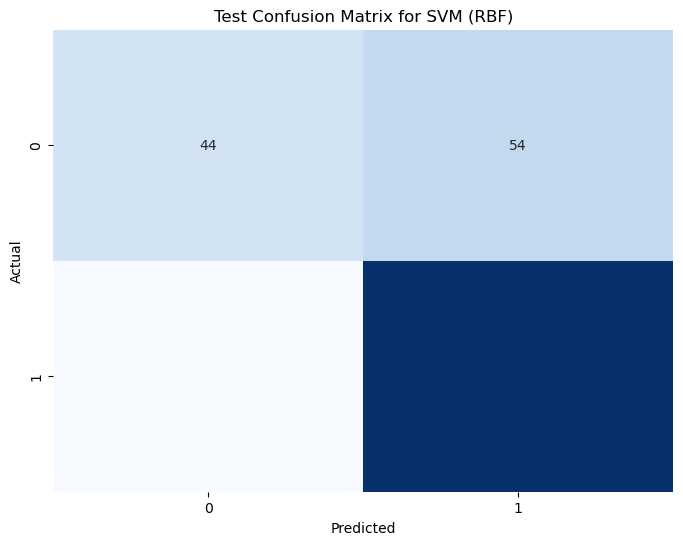



Running model: SVM (Poly) with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale'}
Training Accuracy: 0.7856
Test Accuracy: 0.7345


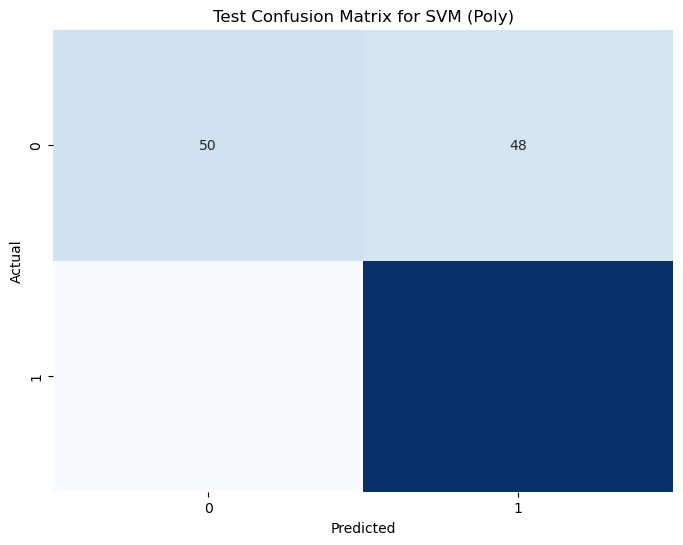



Running model: Random Forest with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 80}
Training Accuracy: 1.0000
Test Accuracy: 0.8255


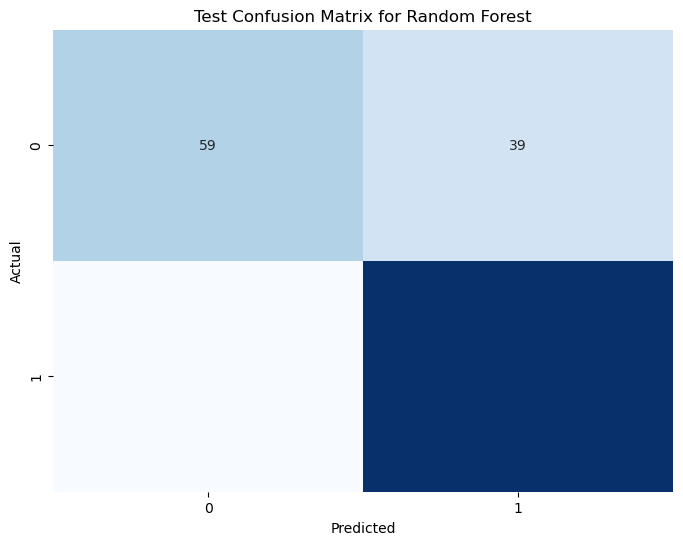



Running model: Decision Tree with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Training Accuracy: 0.9171
Test Accuracy: 0.7564


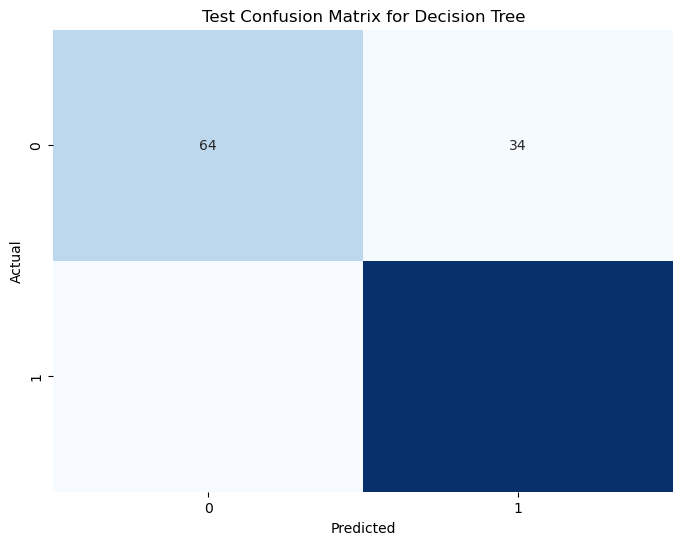



Running model: XGBoost with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training Accuracy: 0.8936
Test Accuracy: 0.8109


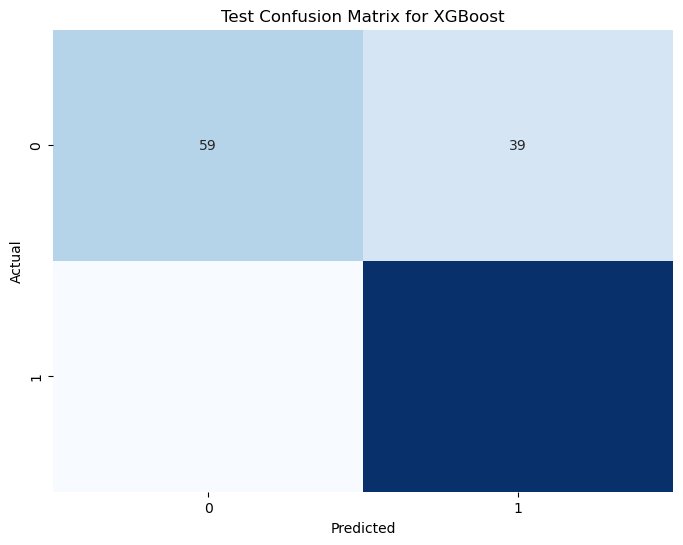



Running model: AdaBoost with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8122
Test Accuracy: 0.8255


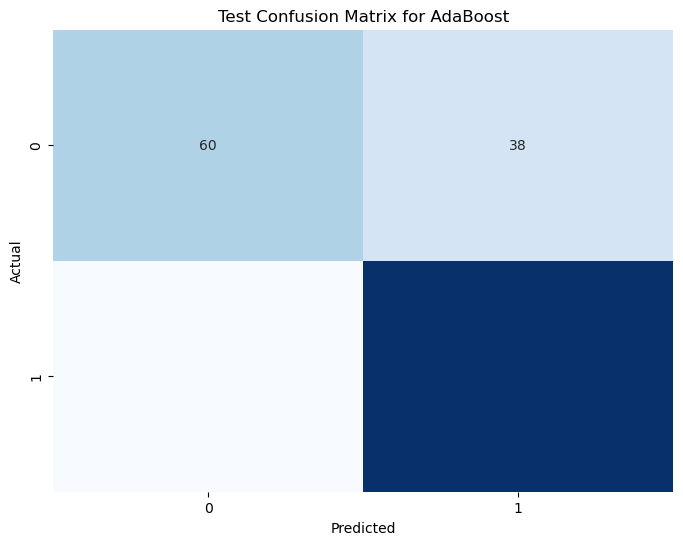



Running model: Gradient Boosting with MinMaxScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Training Accuracy: 0.9734
Test Accuracy: 0.8145


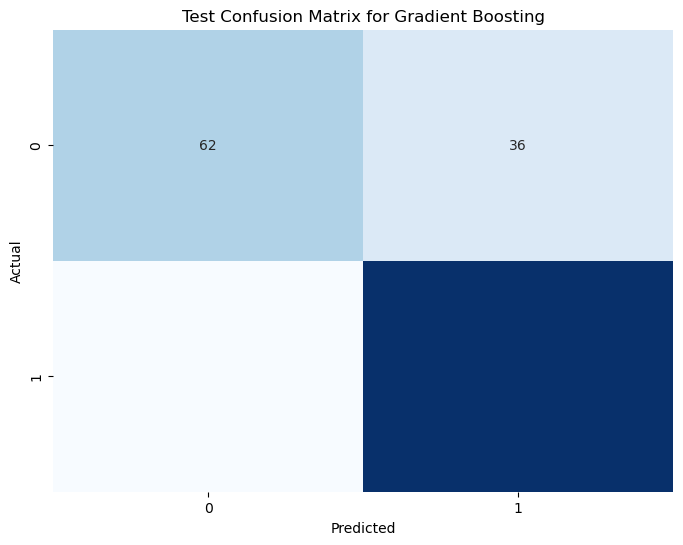



Running model: Logistic Regression with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7919
Test Accuracy: 0.7564


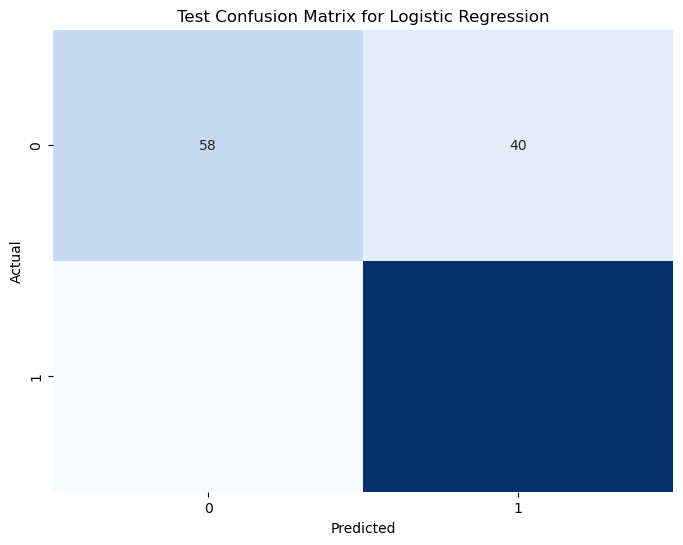



Running model: KNN with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7778
Test Accuracy: 0.6800


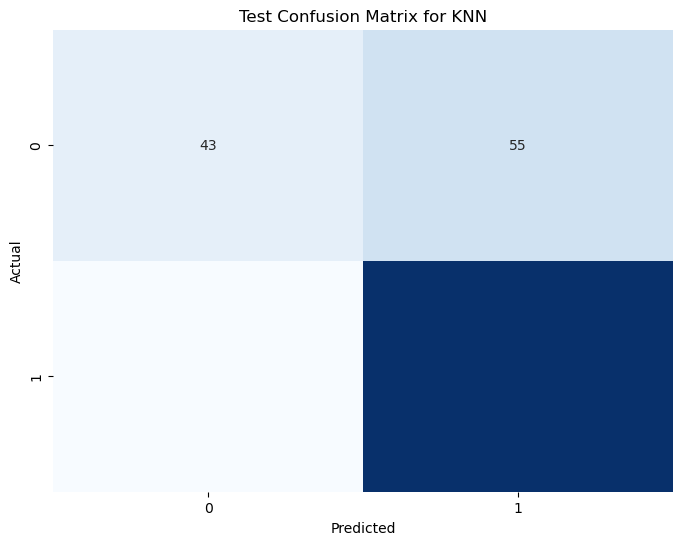



Running model: SVM (Linear) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1}
Training Accuracy: 0.7887
Test Accuracy: 0.7455


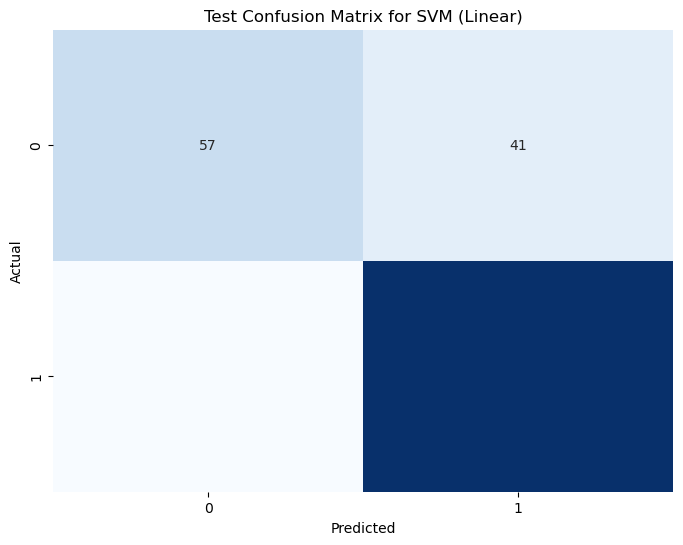



Running model: SVM (RBF) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.8513
Test Accuracy: 0.7345


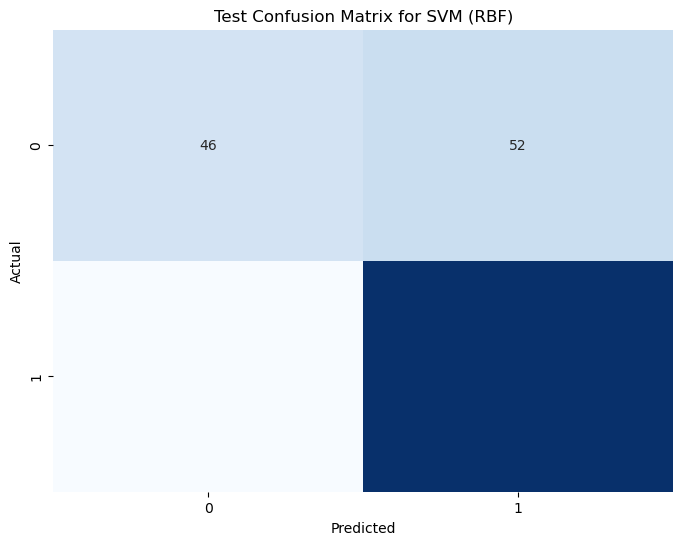



Running model: SVM (Poly) with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'degree': 3, 'gamma': 'scale'}
Training Accuracy: 0.8466
Test Accuracy: 0.7091


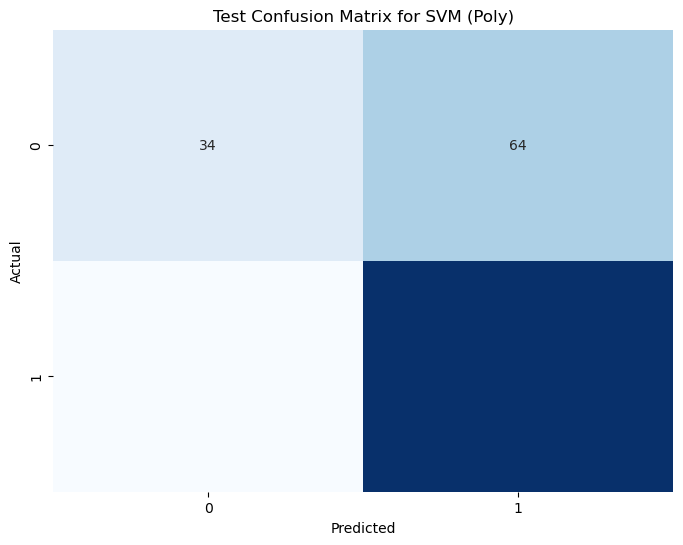



Running model: Random Forest with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Training Accuracy: 0.8873
Test Accuracy: 0.8145


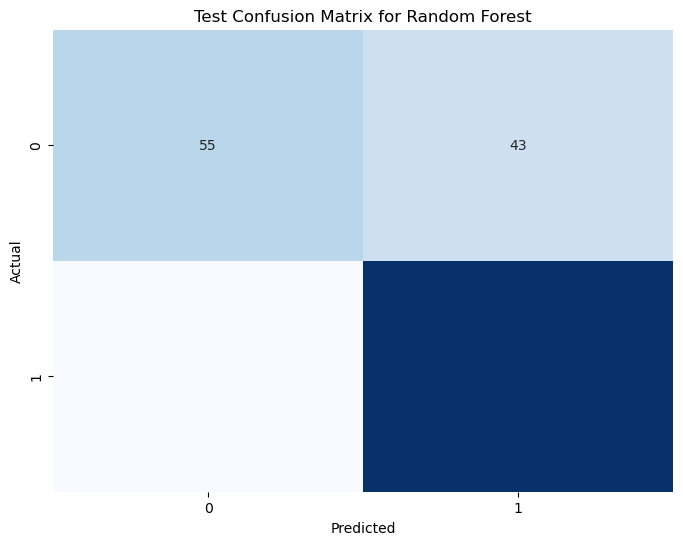



Running model: Decision Tree with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Training Accuracy: 0.9171
Test Accuracy: 0.7418


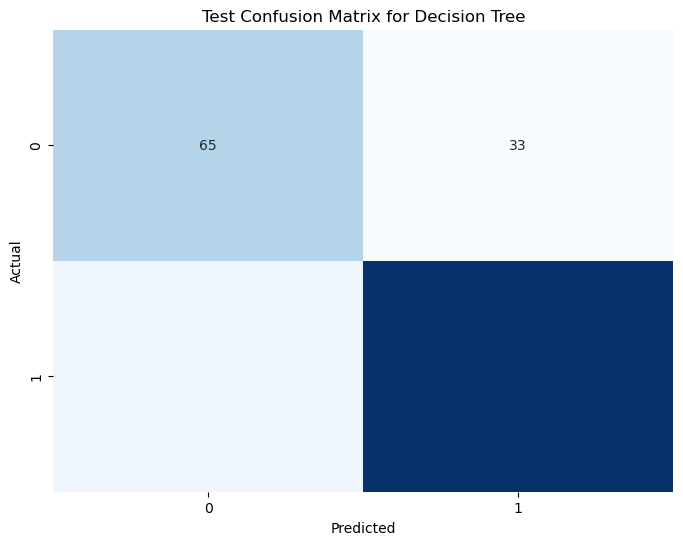



Running model: XGBoost with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training Accuracy: 0.8936
Test Accuracy: 0.8109


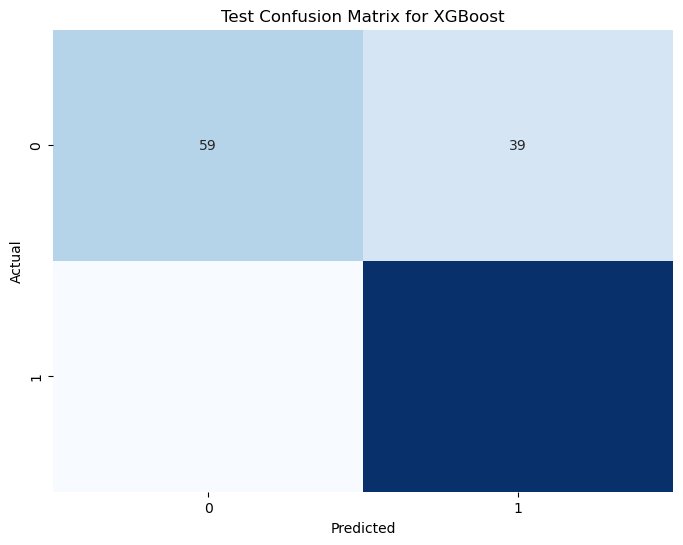



Running model: AdaBoost with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8122
Test Accuracy: 0.8255


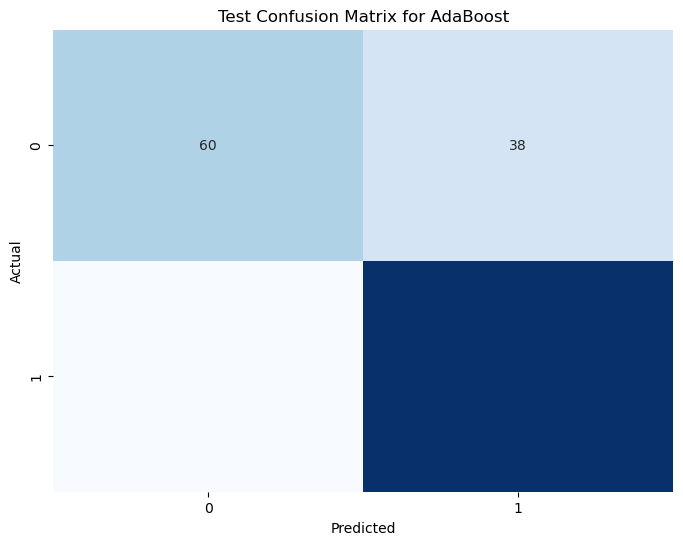



Running model: Gradient Boosting with StandardScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 80}
Training Accuracy: 0.9859
Test Accuracy: 0.8218


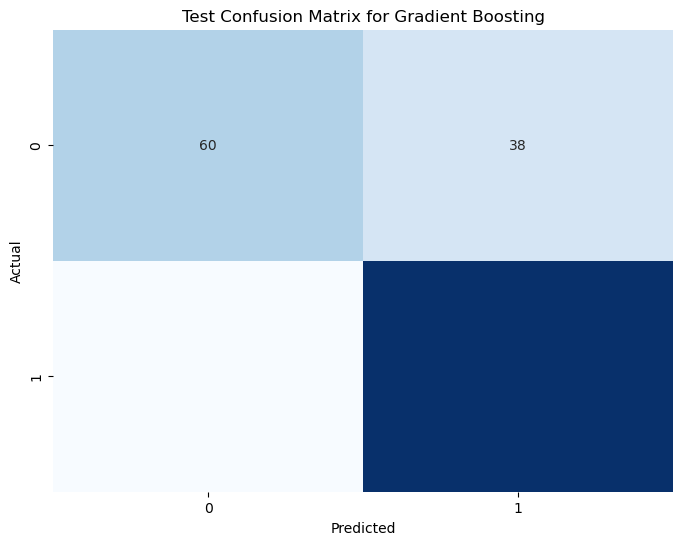



Running model: Logistic Regression with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7825
Test Accuracy: 0.7636


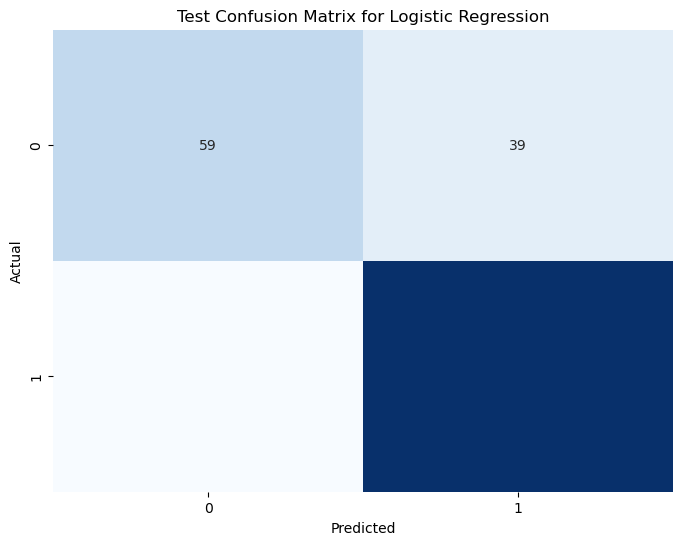



Running model: KNN with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {}
Training Accuracy: 0.7966
Test Accuracy: 0.7418


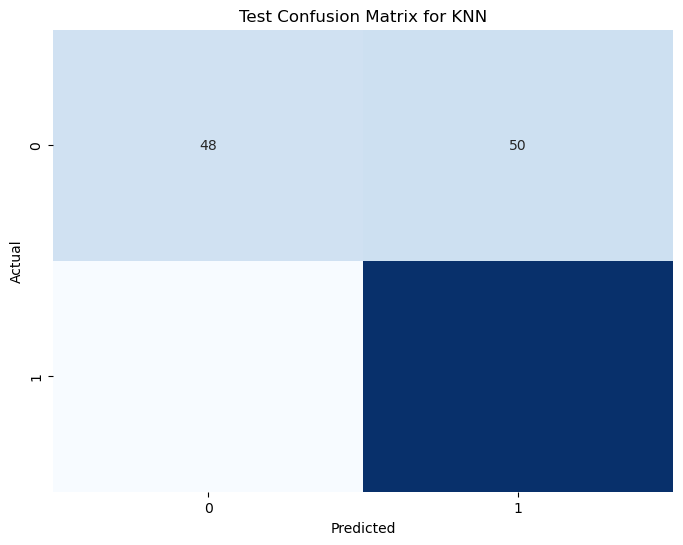



Running model: SVM (Linear) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1}
Training Accuracy: 0.7919
Test Accuracy: 0.7564


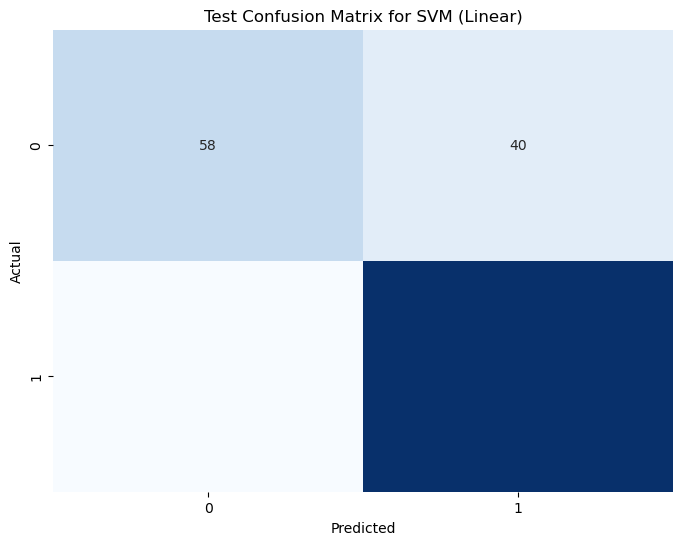



Running model: SVM (RBF) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.8357
Test Accuracy: 0.8145


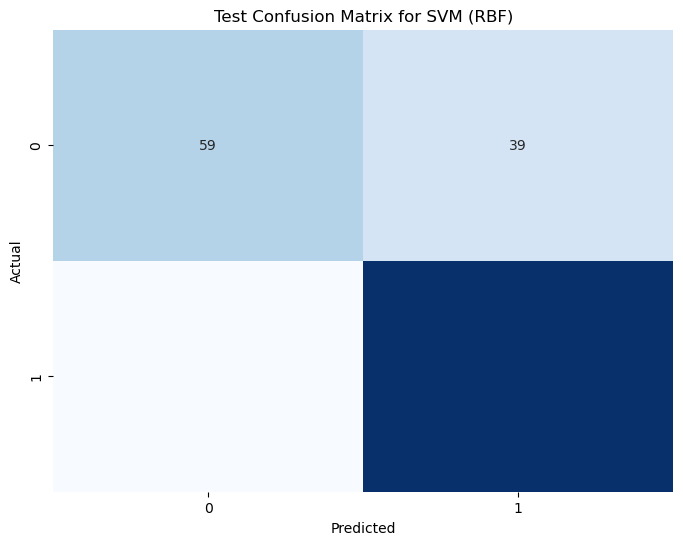



Running model: SVM (Poly) with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale'}
Training Accuracy: 0.8153
Test Accuracy: 0.7745


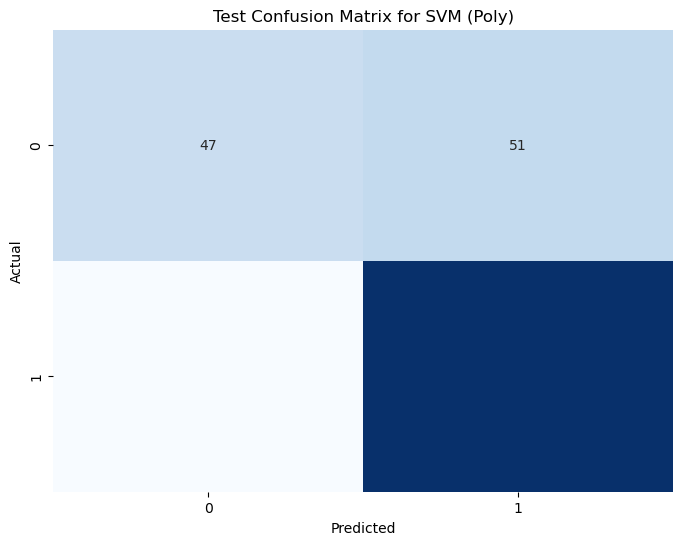



Running model: Random Forest with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 80}
Training Accuracy: 0.9296
Test Accuracy: 0.8255


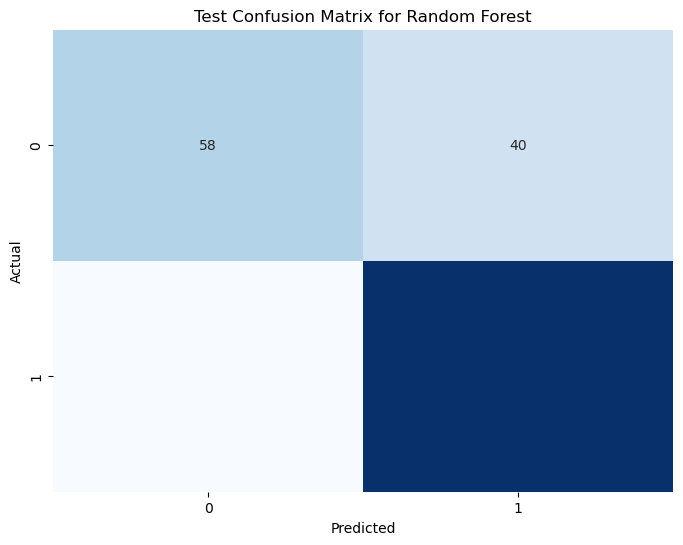



Running model: Decision Tree with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Training Accuracy: 0.9171
Test Accuracy: 0.7345


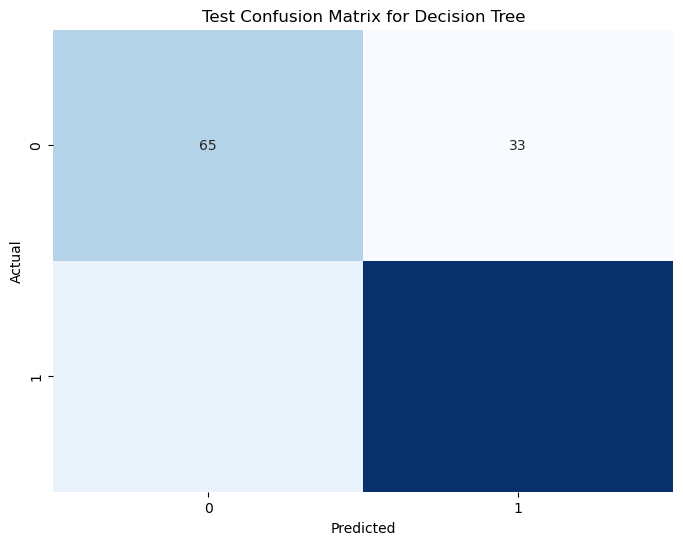



Running model: XGBoost with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training Accuracy: 0.8936
Test Accuracy: 0.8109


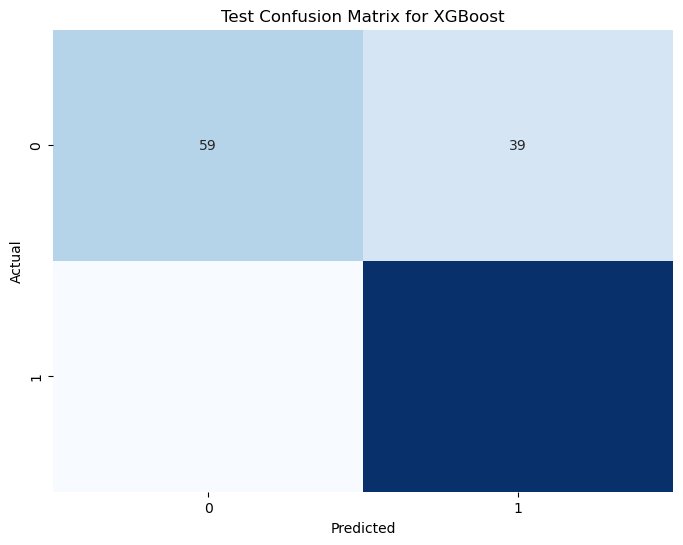



Running model: AdaBoost with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.8122
Test Accuracy: 0.8255


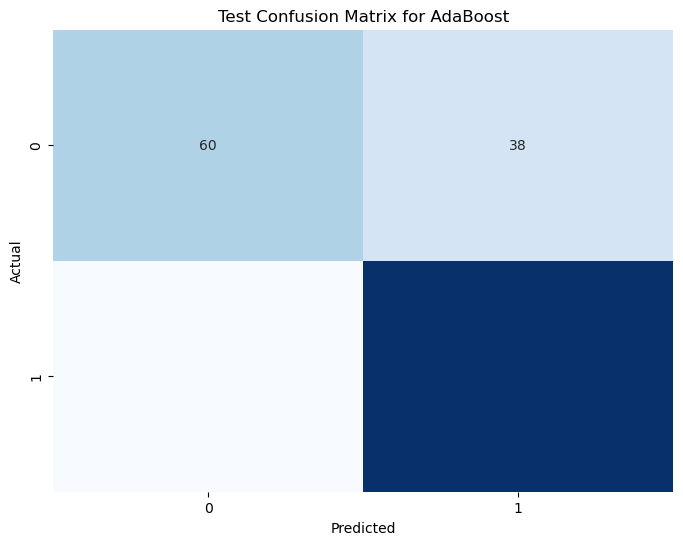



Running model: Gradient Boosting with RobustScaler
Values for class status
1    411
0    228
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Training Accuracy: 0.9734
Test Accuracy: 0.8218


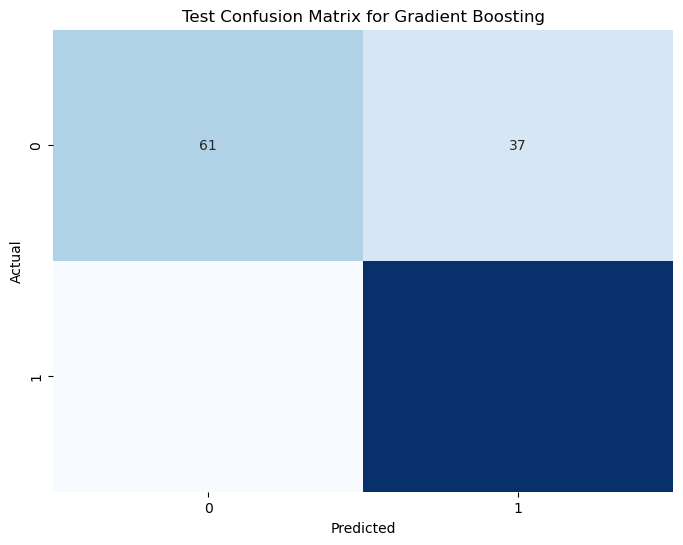

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

imputer = SimpleImputer(strategy='mean')

for scaler in scalers:
    # ========= Imputation before log transformation ==========
    X_imputed = imputer.fit_transform(X)

    # Apply log transformation to specific columns
    for col in range(X_imputed.shape[1]):  # Iterate over columns
        if np.all(X_imputed[:, col] > 0):  # Ensure all values are positive
            X_imputed[:, col] = np.log1p(X_imputed[:, col])  # log(1 + x) to handle zeros safely

    # ========= Scaling ==========
    X_scaled = scaler.fit_transform(X_imputed)

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

    for model_name, model, param_grid in models:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyperparameter Tuning (Finding best parameters) ==========
        best_model = tune_model(model, param_grid, X_train, y_train, X_test, y_test)

        # Predict using best model
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # ======== Summarize and Evaluate ==============
        results_df = summarize_metrics(
            model_name,
            y_train, y_test,
            y_train_pred, y_test_pred,
            existing_df=results_df
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

In [122]:
results_df

Model  Scaling Method  Train Accuracy  Test Accuracy  \
0   Logistic Regression    MinMaxScaler            0.78           0.76   
1                   KNN    MinMaxScaler            0.77           0.67   
2          SVM (Linear)    MinMaxScaler            0.78           0.75   
3             SVM (RBF)    MinMaxScaler            0.79           0.74   
4            SVM (Poly)    MinMaxScaler            0.79           0.73   
5         Random Forest    MinMaxScaler            1.00           0.83   
6         Decision Tree    MinMaxScaler            0.92           0.76   
7               XGBoost    MinMaxScaler            0.89           0.81   
8              AdaBoost    MinMaxScaler            0.81           0.83   
9     Gradient Boosting    MinMaxScaler            0.97           0.81   
10  Logistic Regression  StandardScaler            0.79           0.76   
11                  KNN  StandardScaler            0.78           0.68   
12         SVM (Linear)  StandardScaler            0.79           0.75   
13            SVM (RBF)  StandardScaler            0.85           0.73   
14           SVM (Poly)  StandardScaler            0.85           0.71   
15        Random Forest  StandardScaler            0.89           0.81   
16        Decision Tree  StandardScaler            0.92           0.74   
17              XGBoost  StandardScaler            0.89           0.81   
18             AdaBoost  StandardScaler            0.81           0.83   
19    Gradient Boosting  StandardScaler            0.99           0.82   
20  Logistic Regression    RobustScaler            0.78           0.76   
21                  KNN    RobustScaler            0.80           0.74   
22         SVM (Linear)    RobustScaler            0.79           0.76   
23            SVM (RBF)    RobustScaler            0.84           0.81   
24           SVM (Poly)    RobustScaler            0.82           0.77   
25        Random Forest    RobustScaler            0.93           0.83   
26        Decision Tree    RobustScaler            0.92           0.73   
27              XGBoost    RobustScaler            0.89           0.81   
28             AdaBoost    RobustScaler            0.81           0.83   
29    Gradient Boosting    RobustScaler            0.97           0.82   

    Train Precision  Test Precision  Train Recall  Test Recall  \
0              0.78            0.74          0.74         0.71   
1              0.75            0.63          0.72         0.61   
2              0.78            0.74          0.73         0.69   
3              0.81            0.73          0.74         0.68   
4              0.78            0.71          0.74         0.68   
5              1.00            0.84          1.00         0.78   
6              0.91            0.73          0.91         0.73   
7              0.91            0.81          0.86         0.76   
8              0.82            0.84          0.77         0.78   
9              0.98            0.81          0.96         0.77   
10             0.78            0.74          0.75         0.72   
11             0.76            0.64          0.74         0.63   
12             0.78            0.72          0.75         0.71   
13             0.86            0.72          0.81         0.68   
14             0.88            0.70          0.79         0.63   
15             0.91            0.84          0.85         0.76   
16             0.91            0.72          0.91         0.72   
17             0.91            0.81          0.86         0.76   
18             0.82            0.84          0.77         0.78   
19             0.99            0.83          0.98         0.78   
20             0.77            0.74          0.74         0.73   
21             0.79            0.73          0.75         0.69   
22             0.78            0.74          0.75         0.72   
23             0.85            0.82          0.79         0.77   
24             0.85            0.79          0.75         0.71   
25     

In [123]:
import pandas as pd
import plotly.express as px

# Accuracy scores for Random Forest and AdaBoost with different scalers
accuracy_scores = [
    0.92, 0.84,  # Random Forest MinMaxScaler (Train, Test)
    0.89, 0.83,  # Random Forest StandardScaler (Train, Test)
    1.00, 0.82,  # Random Forest RobustScaler (Train, Test)
    0.81, 0.83,  # AdaBoost MinMaxScaler (Train, Test)
    0.81, 0.83,  # AdaBoost StandardScaler (Train, Test)
    0.81, 0.83   # AdaBoost RobustScaler (Train, Test)
]

# Corresponding model names
model_names = [
    'Random Forest MinMaxScaler', 'Random Forest MinMaxScaler',
    'Random Forest StandardScaler', 'Random Forest StandardScaler',
    'Random Forest RobustScaler', 'Random Forest RobustScaler',
    'AdaBoost MinMaxScaler', 'AdaBoost MinMaxScaler',
    'AdaBoost StandardScaler', 'AdaBoost StandardScaler',
    'AdaBoost RobustScaler', 'AdaBoost RobustScaler'
]

# Dataset type (Train or Test)
dataset_type = [
    'Train', 'Test', 'Train', 'Test', 'Train', 'Test',
    'Train', 'Test', 'Train', 'Test', 'Train', 'Test'
]

# Create DataFrame for visualization
vis = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Dataset Type': dataset_type
})

# Create bar plot with customized colors
fig = px.bar(vis, x='Model', y='Accuracy', color='Dataset Type', 
             barmode='group', text='Accuracy',
             color_discrete_map={'Train': '#1f77b4', 'Test': '#ff7f0e'})  # Custom colors

# Show the plot
fig.show()

In [124]:
accuracy_scores = [0.81, 0.83, 0.81, 0.83]
model_names = ['AdaBoost MinMaxScaler', 'AdaBoost MinMaxScaler', 'AdaBoost RobustScaler', 'AdaBoost RobustScaler']
dataset_type = ['Train', 'Test', 'Train', 'Test']
vis = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Dataset Type': dataset_type})
fig = px.bar(vis, x='Model', y='Accuracy', color='Dataset Type', barmode='group', text='Accuracy')
fig.show() 

### Thank you for checking out this Notebooks! @AnuLikithaImmadisetty